<h1 style="font-style:italic; padding:10px; box-shadow: 0px 0px 8px black;">
Procesamiento digital de señales de audio y efectos digitales de audio
</h1>
 
<div style="background:#999; color:#FFF; font-style:italic; border-radius:10px; padding:20px; margin-top:10px">
Este proyecto fue llevado adelante para poder rendir el final de la materia electiva "Procesamiento Digital de Señales" brindada por el profesor Mariano Llamedo Soria en la Universidad Tecnológica Nacional, mis más grandes agradecimientos a él por todos los conocimientos brindados sin los cuales no hubiera sido posible abordar este proyecto.
</div>

<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Indice: 
</h2>

* [Python para procesamiento digital de audio](#0)
* [Obtenener señales digitales de audio con Python](#1)
* [Representacion de muestras](#2)
* [Efectos de lineas de retardo](#3)
    * [Delay (Retardo)](#4)
        * [Delay basico](#5)
        * [Delay con realimentacion](#6)
    * [Flanging](#7)
        * [Principio de operacion](#8)
        * [Oscilador de Baja Frecuencia (LFO)](#9)
        * [Flanger basico](#10)
        * [Flanger con realimentacion](#11)
    * [Chorus](#12)
        * [Flanging versus Chorus](#13)
        * [Chorus Basico](#14)
        * [Chorus con multiples voces](#15)
* [Diseño de filtros](#16)
    * [Filtros FIR versus Filtros IIR](#17)
    * [Filtro FIR](#18)
    * [Filtro IIR](#19)
    * [¿Y entonces que tipo de filtro nos conviene usar?](#20)
    * [Filtro Pasa Bajo (LP)](#21)
    * [Filtro Pasa Alto (HP)](#22)
    * [Filtro Pasa Banda (BP)](#23)
    * [Filtro Elimina Banda o Notch (FN)](#24)
* [Modulacion de amplitud](#25)
    * [Tremolo](#26)
    * [Modulacion de timbre](#27)
* [Saturacion](#28)
    * [Overdrive, Distorsion y Fuzz](#29)
        * [Curva caracteristica](#30)
        * [Recorte fuerte o suave](#31)
        * [Simetria y rectificacion](#32)
    * [Distorsion armonica](#33)
* [Vocoder de fase](#34)
    * [Robotizacion](#35)
    * [Efecto susurro o Whisperizacion](#36)
    * [Estiramiento temporal](#37)
    * [Cambio de tono o Pitch Shifting](#38)
* [Reverberacion](#39)
    * [Reverberador de Schroeder](#40)
    * [Reverb convolucional](#41)
* [Extra](#42)
    * [Transcripcion de tonos](#43)
        * [Deteccion de comienzos o onsets](#44)
        * [Metodo de deteccion de onsets](#45)
            * [Preprocesamiento](#46)
            * [Funcion de deteccion](#47)
                * [Diferencia espectral](#48)
                * [Desviacion de fase](#49)
            * [Deteccion de picos](#50)
        * [Reconstrucción de melodías](#52)
* [Referencias](#51)

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
 Python para procesamiento digital de audio  <a name="0"></a>
</h2>

Es una obviedad decir que este fue el lenguaje elegido para abordar este proyecto, pero eso no significa que eso sea la mejor opción, Python es conocido por ser un lenguaje de alto nivel el cual resulta relativamente fácil de aprender y más si contamos con conocimientos de lenguajes con menos capas de abstracción, pero esta ventaja repercute en la velocidad de procesamiento, Python resulta ser un lenguaje bastante lento comparado con lenguajes como C o C++ por esta razón, a la hora de trabajar con audio, Python no es la mejor opción. Pero tampoco significa que sea imposible de realizar procesamiento digital de audio con este lenguaje, ya que cuenta con paquetes como **[Numpy](https://numpy.org)** o **[Scipy](https://scipy.org)** los cuales están optimizados para trabajar con grandes volúmenes de datos de manera rápida, de hecho, existen desarrollos como **[librosa](https://librosa.org/doc/latest/index.html)** o **[pyo](http://ajaxsoundstudio.com/pyodoc/#examples)**, que hacen uso de estos paquetes y que realizan la gran mayoría de procesamientos que explicaremos más adelante.
Además, también existen paquetes como **[Numba](https://numba.pydata.org)** o **[Cupy](https://cupy.dev)** que son capaces de paralelizar y computar funciones de **Numpy** y **Scipy** por GPU, o distribuciones completas de Python que trabajan por cómputo de XPUs, como la distribución ofrecida por **[Intel](https://www.intel.com/content/www/us/en/developer/tools/oneapi/distribution-for-python.html)**.

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Obtenener señales digitales de audio con Python <a name="1"></a>
</h2>

Como cualquier proyecto de PDS necesitamos de señales, en nuestro caso obtendremos señales de audio de dos tipos de fuentes, una fuente puede ser un micrófono el cual captura ondas sonoras que viajan por el aire y las traduce en señales eléctricas en tiempo real, la segunda fuente serán archivos de audio, no necesariamente en tiempo real.

Procedamos a obtener señales de audio, para esto haremos uso del paquete **Scipy** y obtendremos los datos de un archivo .wav:

In [1]:
#######################################
# Requisitos:                         #
# pip install matplotlib==3.1.3       #
# pip install ipympl=0.8              #
# pip install numpy                   #
# pip install scipy                   #
#######################################

############Modulos que usaremos#############
from IPython.display import Audio, display
import scipy.io.wavfile as wavfile
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal as sg
import time

%matplotlib widget
plt.style.use("dark_background")

In [ ]:
fs , data = wavfile.read("furelise2.wav")
Audio(data, rate=fs)

Con este pequeño fragmento de codigo pudimos extraer del archivo .wav un array de datos **data** (*samples*) que forman la señal audible y a su vez obtuvimos la frecuencia de muestreo **fs** a la cual fue muestreada la señal (existe dos valores comunes 44100 Hz o 48000 Hz), como vemos un archivo .wav contiene una serie de parametros que ayudan a caracterizar la señal contenida, entre algunos de esos parametros existe uno que caracteriza la cantidad de canales de audio, esto nos indica si un audio fue grabado en *MONO* o *ESTEREO*, por simplicidad opte por trabajar con audios *MONO* pero todo lo que  explicare aqui es totalmente aplicable a grabaciones *ESTEREO*, otro de los parametros importantes es el *bit depth* que nos indica la cantidad de bits que son usados para representar cada muestra de audio.
Cabe aclarar que **Scipy** no es el unico paquete que nos permite descomponer un archivo .wav en un array de datos, paquetes como **[wave](https://docs.python.org/es/3/library/wave.html)** o **librosa** tambien nos proveen herramientas para esto y para poder reproducir o grabar audios contamos con paquetes como **[pyaudio](http://people.csail.mit.edu/hubert/pyaudio/)**, **[pydub](http://pydub.com)** o **[winsound](https://docs.python.org/3/library/winsound.html)**.

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Representacion de muestras <a name="2"></a>
</h2>

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Dominio temporal y dominio frecuencial
</h3>

Para lograr efectos audibles, a partir de las muestras obtenidas podemos realizar tres tipos de procesamientos, aquellos que trabajan completamente sobre el dominio temporal, los que trabajan completamente sobre el dominio frecuencial o aquellos que trabajan en ambos dominios. La representación de nuestra señal en el dominio temporal está dada por el array de datos obtenidos anteriormente.

Text(0, 0.5, 'Amplitud')

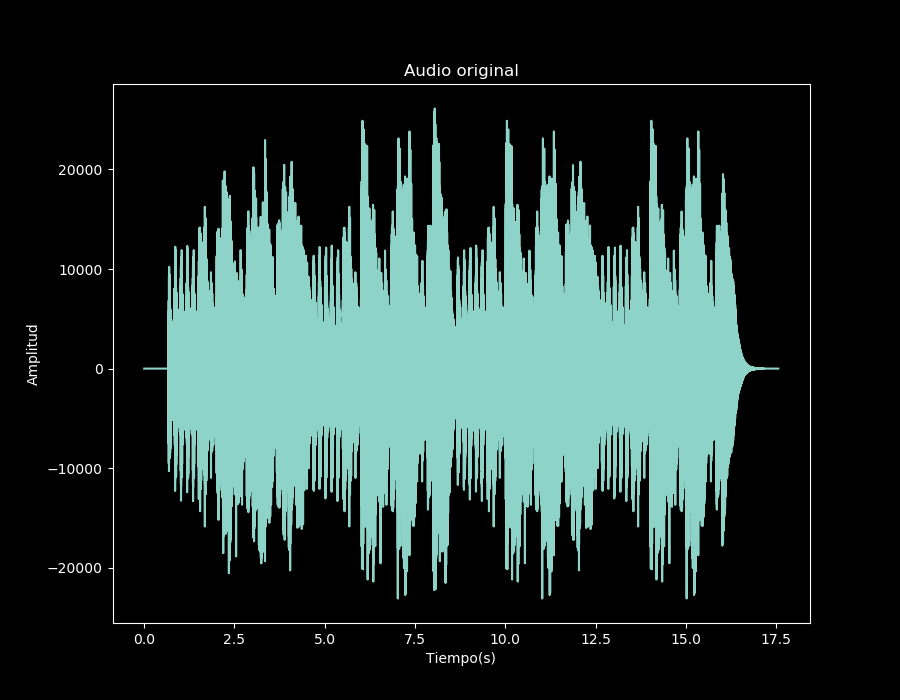

In [3]:
duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data)
plt.title("Audio original")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

La representación en el dominio frecuencial podemos obtenerla por calcular la *[Transformada Discreta de Fourier (DFT)](https://es.wikipedia.org/wiki/Transformada_de_Fourier_discreta)* que pretende representar una señal discreta finita en términos de sus componentes de frecuencia, es una herramienta muy poderosa pero computacionalmente costosa. Comúnmente se usa una implementación conocida como *[Transformada Rápida de Fourier (FFT)](https://es.wikipedia.org/wiki/Transformada_rápida_de_Fourier)* que computacionalmente es menos costosa que la DFT, pero para una cantidad grande de muestras aún sigue siendo un cálculo lento. Además, la señal entrante puede ser muy larga o infinita, pero a uno le gustaría saber el contenido de frecuencia en un momento dado. Para esto se hace uso de la *[Transformada de Fourier de Tiempo Reducido (STFT)](https://es.wikipedia.org/wiki/Transformada_de_Fourier_de_Tiempo_Reducido)* que básicamente consiste en calcular la FFT por cada bloque o frame de muestras que compone a la señal, previamente cada frame debe ser multiplicado por una *[función ventana](https://es.wikipedia.org/wiki/Ventana_(función))*, lo que nos arroja el espectro frecuencial de cada frame a través del tiempo.

<div align="center"><img src="img_note/stft.png"/></div>

Text(0, 0.5, 'Frecuencia(Hz)')

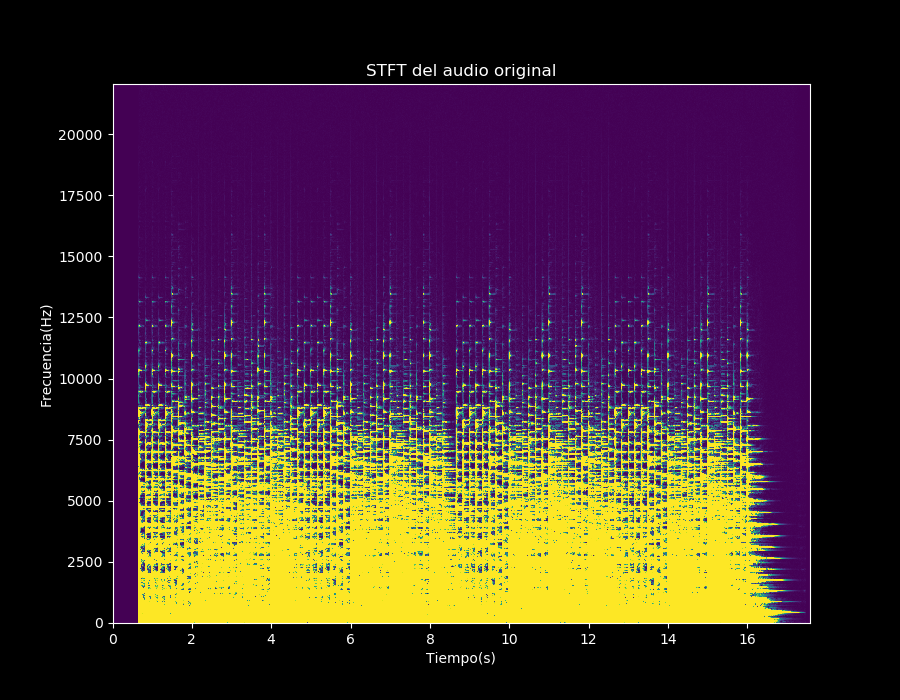

In [4]:
frames = 1024
window_size = frames*2
hop = window_size//4
w_ = np.hanning(window_size)

nframes = len(data)/frames
if nframes > np.floor(nframes):
    len_add_zeros = np.ceil(nframes)*1024 - len(data)
    data_ = np.concatenate((data, np.zeros(int(len_add_zeros))))
    
f, t, stft = sg.stft(x=data_, fs=fs, window=w_, nperseg=window_size, noverlap=window_size - hop)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.pcolormesh(t, f, np.abs(stft), vmin=0, vmax=1)
plt.title("STFT del audio original")
plt.xlabel("Tiempo(s)")
plt.ylabel("Frecuencia(Hz)")

Como vemos hemos descompuesto la señal de audio en muestras del largo de una ventana y a cada frame se le ha calculado la FFT dando como resultado un espectro frecuencial por cada frame, de esta forma podemos conocer que frecuencias dominan a lo largo de la señal.

Text(0, 0.5, 'Amplitud')

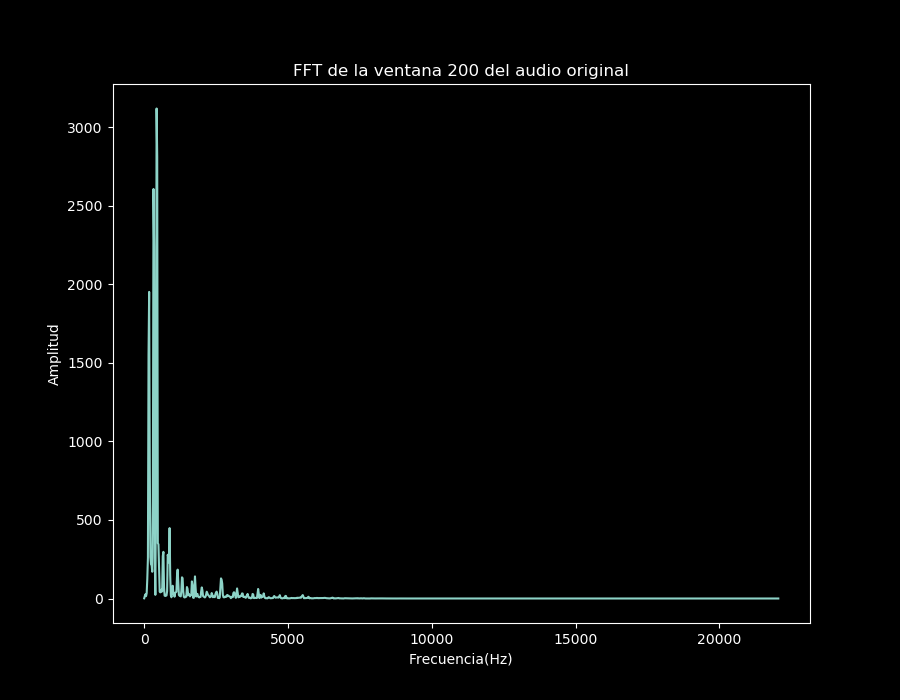

In [5]:
w_200 = np.abs(stft[:, 200])
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(f, w_200)
plt.title("FFT de la ventana 200 del audio original")
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Amplitud")

Pero hay un par de cuestiones que aclarar, uno de los problemas de la STFT es que tiene una resolución fija, el ancho de la ventana determina como será representada en frecuencia la señal, una ventana amplia nos dará una resolución en frecuencia mejor, pero a su vez empeorara la resolución en tiempo, al contrario, una ventana angosta nos dará una mejor resolución en tiempo pero una pobre resolución en frecuencia.

<div align="center"><img src="img_note/stft_resolution.png"/></div>

Otro de los problemas que presenta la STFT es la utilización de *funciones ventana* para minimizar los efectos de fuga en los bordes de cada muestra, cualquier función de reducción utilizada casi siempre disminuye a cero en el límite:

<div align="center"><img src="img_note/stft_w.png"/></div>

Esto produce una perdida de datos entra cada ventana, por esto es que comúnmente se realiza una superposición de ventanas.

<div align="center"><img src="img_note/stft_w_overlap.png"/></div>

La diferencia de muestras entre el inicio de cada ventana se conoce como *hop size*, si variamos esta diferencia podemos lograr una mejora en la resolución frecuencial, más adelante veremos que algunos efectos consisten en variar esta diferencia.

<div align="center"><img src="img_note/stft_hop.png"/></div>

(0, 15000)

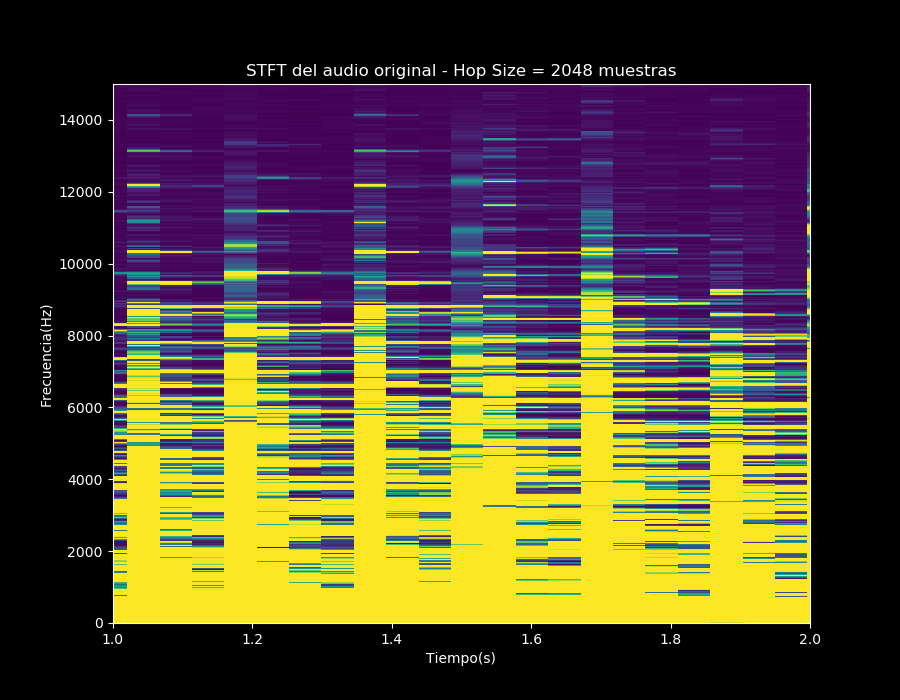

In [6]:
hop = window_size
    
f, t, stft = sg.stft(x=data_, fs=fs, window=w_, nperseg=window_size, noverlap=window_size - hop)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.pcolormesh(t, f, np.abs(stft), vmin=0, vmax=1)
plt.title(f"STFT del audio original - Hop Size = {hop} muestras")
plt.xlabel("Tiempo(s)")
plt.ylabel("Frecuencia(Hz)")
plt.xlim(1, 2)
plt.ylim(0, 15000)

(0, 15000)

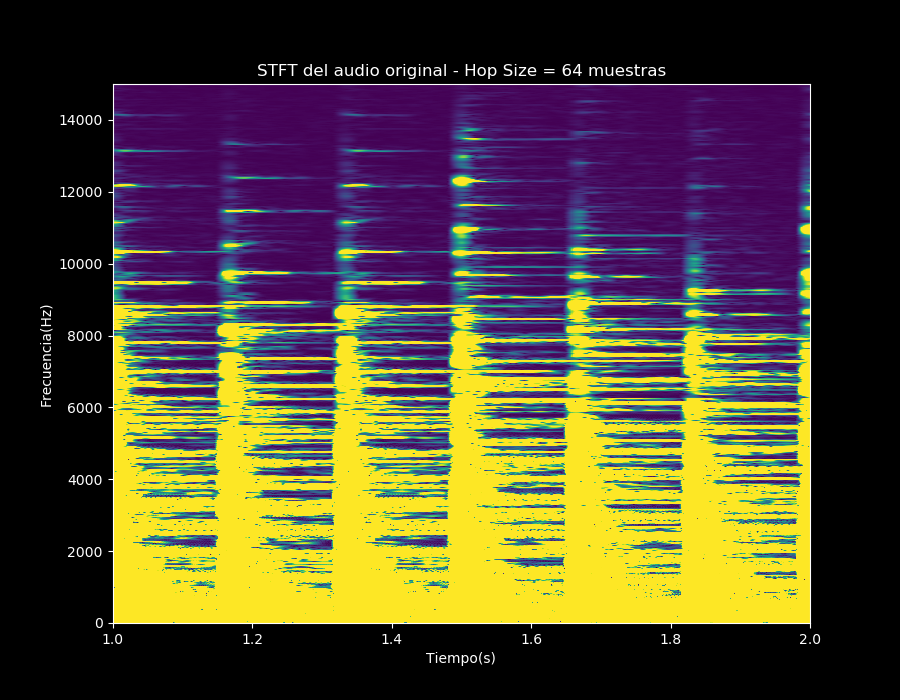

In [7]:
hop = window_size//32
    
f, t, stft = sg.stft(x=data_, fs=fs, window=w_, nperseg=window_size, noverlap=window_size - hop)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.pcolormesh(t, f, np.abs(stft), vmin=0, vmax=1)
plt.title(f"STFT del audio original - Hop Size = {hop} muestras")
plt.xlabel("Tiempo(s)")
plt.ylabel("Frecuencia(Hz)")
plt.xlim(1, 2)
plt.ylim(0, 15000)

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Efectos de líneas de retardo <a name="3"></a>
</h2>
    
<h4 style="font-style:italic; padding:10px; box-shadow: 0px 0px 1px black;">
Importante:
</h4>

Muchos de los efectos que desarrollaremos aquí tienen dos implementaciones, para tiempo real y para tiempo no-real, esto debido a lo que hablamos en *Python para procesamiento digital de audio*, ya que sabemos que Python no es ideal para trabajar en procesamiento de audio en tiempo real, muchos de los efectos debieron ser optimizados.

****
<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Delay (Retardo) <a name="4"></a>
</h3>


Las *[líneas de retardo](https://es.wikipedia.org/wiki/Delay)* son la pieza fundamental de algunos de los más importantes efectos que veremos, estos resultan bastante fácil de implementar y con sutiles cambios pueden ser utilizados para desarrollar diversos efectos.

#### Delay básico <a name="5"></a>
Un *Delay básico* consiste en reproducir una señal de audio luego de un determinado tiempo conocido como *tiempo de retardo (delay time)*. De acuerdo a la aplicación, el tiempo de retardo puede variar de un rango de algunos milisegundos a algunos segundos o más. Algo muy común es mezclar la entrada original con la salida retardada produciéndose dos copias del sonido, dando un efecto también conocido como *eco*, cabe aclarar que la percepción de este efecto como eco depende del tiempo de retardo:

\begin{equation}
y[n] = x[n] + g x[n-N]
\end{equation}

donde $y$ es la salida, $x$ es la entrada, $g$ la ganancia de la salida retardada y $N$ representa el tiempo de retardo.

Esta ecuación representa el siguiente diagrama:

<div align="center"><img src="img_note/delay/diagram.png"/></div>

El efecto de Delay es lineal e invariante en el tiempo.
Si usamos la *[transformada Z](https://es.wikipedia.org/wiki/Transformada_Z)* podemos encontrar la respuesta en frecuencia de un delay básico:

\begin{equation}
Y(Z) = X(Z) + g Z^{-N} X(Z)
\end{equation}

\begin{equation}
H(Z) = 1 + gZ^{-N}
\end{equation}

Para implementar el delay básico haremos uso de *Scipy* y usaremos otra señal:

In [ ]:
fs , data = wavfile.read("veritasium.wav")

Audio(data, rate=fs)

In [ ]:
inicio = time.time()
#####################Delay Basic################
delay_time = 0.2
g=0.5
N = int(delay_time * fs)

b = np.zeros(N+1)
b[0] = 1
b[-1] = g

a = np.zeros(N+1)
a[0] = 1

data_delay = sg.lfilter(b, a, data, axis=0)
################################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_delay, rate=fs))

Tiempo de computo del efecto: 5.390547513961792 segundos


Text(0, 0.5, 'Amplitud')

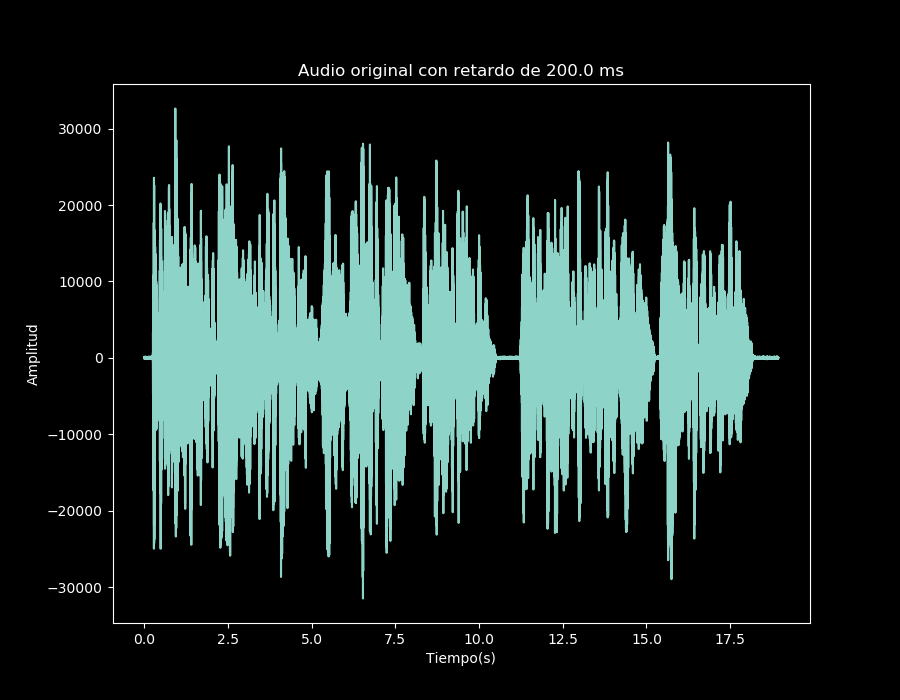

In [11]:
delay_TZ = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")

duracion = len(data_delay)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_delay)
plt.title(f"Audio original con retardo de {delay_time*1000} ms")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

Como vemos esta implementación para el delay básico computacionalmente es muy costosa y el tiempo de cómputo aumenta a medida que aumentamos el tiempo de retardo y no nos servirá para aplicaciones en tiempo real, veamos otra opción siguiendo la ecuación temporal:

In [ ]:
inicio = time.time()
#####################Delay Basic################
delay_time = 0.2
g=0.5
N = int(delay_time * fs)

_data = np.concatenate((np.zeros(N), data))
data_ = np.concatenate((data, np.zeros(N)))
data_delay = data_ + g*_data
################################################
fin = time.time()
                       
display(Audio(data, rate=fs))
display(Audio(data_delay, rate=fs))

In [13]:
delay_t = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")
print(f"Factor de optimizacion: {delay_TZ/delay_t}")

Tiempo de computo del efecto: 0.008977413177490234 segundos
Factor de optimizacion: 600.4566579911829


Como vemos conseguimos exactamente el mismo efecto, pero el tiempo de cómputo fue reducido 596 veces, este sería una mejor implementación para aplicaciones en tiempo real. Básicamente, conseguimos un retardo del sonido con el método conocido como padding zero el cual consiste en agregar muestras de valor 0 a la señal original.

#### Delay con realimentación <a name="6"></a>
Hasta ahora hemos conseguido reproducir una señal con un solo eco, pero en la naturaleza el eco consiste de varias réplicas del mismo sonido, para asemejarnos aún más a un eco real debemos aumentar las réplicas, podríamos concatenar varias líneas de retardo y conseguir el efecto deseado, pero se consigue el mismo efecto si realimentamos la salida retardada a la entrada como muestra el siguiente diagrama:

<div align="center"><img src="img_note/delay/diagram_feed.png"/></div>

Y la expresión matemática relacionada con este diagrama es la siguiente:

\begin{equation}
y[n] = x[n] + g_{FF} d[n]
\end{equation}

donde:

\begin{equation}
d[n] = x[n-N] + g_{FB} d[n-N]
\end{equation}

donde $g_{FB}$ es la ganancia de realimentación y $g_{FF}$ es la ganancia final del retardo.

Si volvemos a usar la transformada Z obtendremos la respuesta en frecuencia, que será la siguiente:

\begin{equation}
H(Z) = \frac{1+Z^{-N}(g_{FF} - g_{FB})}{1-Z^{-N}g_{FB}}
\end{equation}

Veamos la primera implementación:

In [ ]:
inicio = time.time()
#####################Delay Feedback################
delay_time = 0.2
gff=0.5
gfb=0.8
N = int(delay_time * fs)

b = np.zeros(N+1)
b[0] = 1
b[-1] = gff - gfb

a = np.zeros(N+1)
a[0] = 1
a[-1] = -gfb

data_delay = sg.lfilter(b, a, data, axis=0)
################################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_delay, rate=fs))

Tiempo de computo del efecto: 5.302843332290649 segundos


Text(0, 0.5, 'Amplitud')

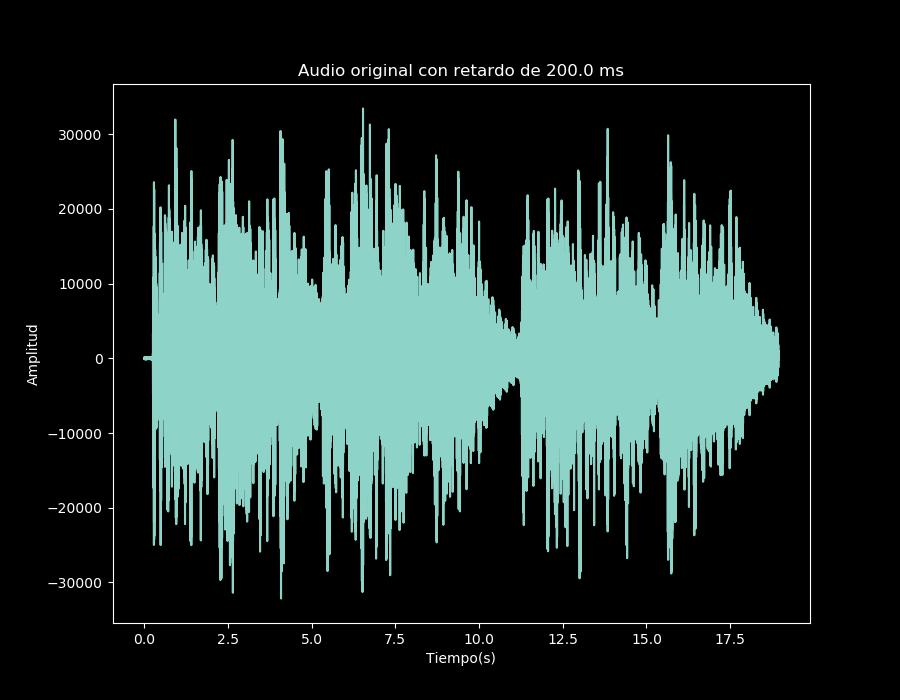

In [15]:
delay_TZ = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")

duracion = len(data_delay)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_delay)
plt.title(f"Audio original con retardo de {delay_time*1000} ms")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

Veamos la segunda implementación:

In [ ]:
inicio = time.time()
#####################Delay Feedback################
delay_time = 0.2
gff=0.5
gfb=0.8
bounces = 10

out = data.copy()
delay_len_samples = round(delay_time*fs)
padding_zero = np.zeros(delay_len_samples)
delay_data = np.concatenate((padding_zero, data.copy()))
for i in range(1, bounces+1):
    data_trans = np.concatenate((out, padding_zero))
    out = data_trans + delay_data * gff
    delay_data = np.concatenate((padding_zero, delay_data))*gfb
################################################
fin = time.time()
    
display(Audio(data, rate=fs))
display(Audio(out, rate=fs))

In [17]:
delay_t = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")
print(f"Factor de optimizacion: {delay_TZ/delay_t}")

Tiempo de computo del efecto: 0.10572195053100586 segundos
Factor de optimizacion: 50.15839478609927


Tenemos dos cosas que destacar, primero el tiempo de cómputo se ve reducido por un factor de 54, pero este factor es inversamente proporcional a la cantidad de réplicas que queramos introducir, pero aun así hay una reducción considerable en el tiempo de cómputo y es mucho mejor para aplicaciones en tiempo real, segundo la primera implementación no permite que las réplicas de las últimas muestras se puedan reproducir y podemos observarlo en la duración de cada audio, esto sería un problema en aplicaciones en tiempo real.

****
<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Flanging <a name="7"></a>
</h3>


El *[Flanging](https://es.wikipedia.org/wiki/Flanger)* es un efecto basado en el efecto *Delay*, originalmente fue desarrollado usando cintas de máquinas analógicas hace 50 años. La palabra Flanging viene de *Flange* que no es más que el borde exterior de las grabadoras de cintas de carrete abierto que solían usarse en estudios de la época:

<div align="center"><img src="img_note/flanger/tapes.png"/></div>

Para generar el efecto se tomaban dos máquinas de cintas y se las configuraban para que reproduzcan la misma cinta al mismo tiempo y sus salidas eran mezcladas por igual, si ambas cintas eran reproducidas perfectamente al unísono el resultado era simplemente la misma señal pero en una versión más fuerte. Sin embargo, si el operador tocaba ligeramente el flange de unas las máquinas de cinta, esto provocaba que una de las cintas se reproduzca más lento, por ende el tono de la señal de esa cinta era reducido. Esto a su vez provocaba que entre las cintas exista un retardo. Luego el operador procede a realizar el mismo proceso en la otra cinta, lo que hace que el retraso desaparezca gradualmente y luego crezca en la dirección opuesta. Este proceso debía repetirse periódicamente, alternando entre cada una de las cintas. Si el retraso entre cada máquina es muy grande, el efecto de *Flanging* se pierde y el sonido deja de percibirse como uno solo.

### Principio de operación <a name="8"></a>
El *flanger* es un efecto basado sobre el principio de interferencia constructiva y destructiva. Para producir este efecto se toma una señal a la cual se la retarda un lapso de tiempo y se la suma con la señal original. Si tenemos en cuenta la fase de la señal original con respecto a la señal retardada pueden darse dos casos extremos, en un caso puede darse que las dos señales estén totalmente en fase dando paso a una interferencia constructiva donde la suma de las amplitudes darán como resultado una señal con el doble de amplitud, en el otro caso puede darse que las señales estén totalmente desfasadas, cancelándose mutuamente las amplitudes de dichas señales, dando paso a una interferencia destructiva. En términos energéticos de frecuencia, independientemente de cuan desfasadas estén las señales, cuando se produce una interferencia constructiva algunas frecuencias se agregan constructivamente y cuando se produce una interferencia destructiva algunas frecuencias se agregan destructivamente. Este comportamiento genera picos y muescas en la respuesta de frecuencia, pero esto por si solo no produce el efecto flanger, lo que lo produce es el movimiento de dichos picos y muescas en el espectro de frecuencia, este movimiento se logra variando el retardo de la señal, por el cual acudimos al uso de un Oscilador de Baja Frecuencia (LFO):

<div align="center"><img src="img_note/flanger/peaks_notches.png"/></div>

El sonido característico del *flanger* proviene por el movimiento de notches regularmente espaciados en la respuesta de frecuencia. Es por esto que es importante que el largo del retardo varíe con el tiempo.

#### Oscilador de Baja Frecuencia (LFO) <a name="9"></a>
Los LFOs no tienen una definición formal, pero pueden considerarse como señales periódicas con frecuencia por debajo de los 20 Hz. Se los utiliza para variar las líneas de retardo o para modular señales en algunos sintetizadores y también serán utilizados en algunos efectos que veremos en este notebook. La forma de onda de la señal puede variar acorde al tipo de efecto que se quiera generar, pero los más usuales son formas de ondas sinusoidales, cuadradas, triangulares o dientes de sierra. El propósito del LFO en el efecto *flanger* consiste en controlar el largo del retardo, tal que:

\begin{equation}
M[n] = M_{avg} + W sin(2\pi n\frac{f}{f_{s}})
\end{equation}

donde $M_{avg} = M_0 + \frac{W}{2}$ es el retardo promedio (en efectos de tiempo real se elige de forma tal que $M[n]$ no sea negativo), $W$ es el ancho de la modulación del retardo, $f$ es la frecuencia del LFO en Hz y $fs$ es la frecuencia de muestreo .

In [18]:
def LFO(n, fs, delay_sec, depth, fLFO):
    M0 = delay_sec*fs
    W = depth*fs
    M = M0 + (W/2)*(1+np.sin(2*np.pi*(fLFO/fs)*n))
    return M

#### Flanger básico <a name="10"></a>

<div align="center"><img src="img_note/flanger/diagram_basic.png"/></div>

Como podemos ver, la implementación de un *flanger básico* es muy similar al del *delay básico*, con la diferencia de que el retardo es variable con el tiempo, tal que la expresión matemático que lo rige es:

\begin{equation}
y[n] = x[n] + gx[n-M[n]]
\end{equation}

donde $M[n]$ es el largo del retardo controlado por un LFO, esta estructura es conocida como un *[Filtro comb retroalimentado](https://es.wikipedia.org/wiki/Filtro_comb)*.
Usando la transformada Z podemos obtener la respuesta en frecuencia:

\begin{equation}
H(Z) = 1 + gZ^{-M[n]}
\end{equation}

In [ ]:
inicio = time.time()
###############Delay variable##############
delay_prom = 0.005
depth = 0.000009
n = np.arange(len(data))
M = LFO(n=n, fs=fs, delay_sec=delay_prom, depth=depth, fLFO=5).astype(int)
#############Flanger Basic#################
g = 1
N = np.max(M)
b = np.zeros(N+1)
b[0] = 1
b[M] = g

a = np.zeros(N+1)
a[0] = 1

data_flanger = sg.lfilter(b, a, data, axis=0)
##########################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_flanger, rate=fs))

Tiempo de computo del efecto: 0.15358710289001465 segundos


Text(0, 0.5, 'Amplitud')

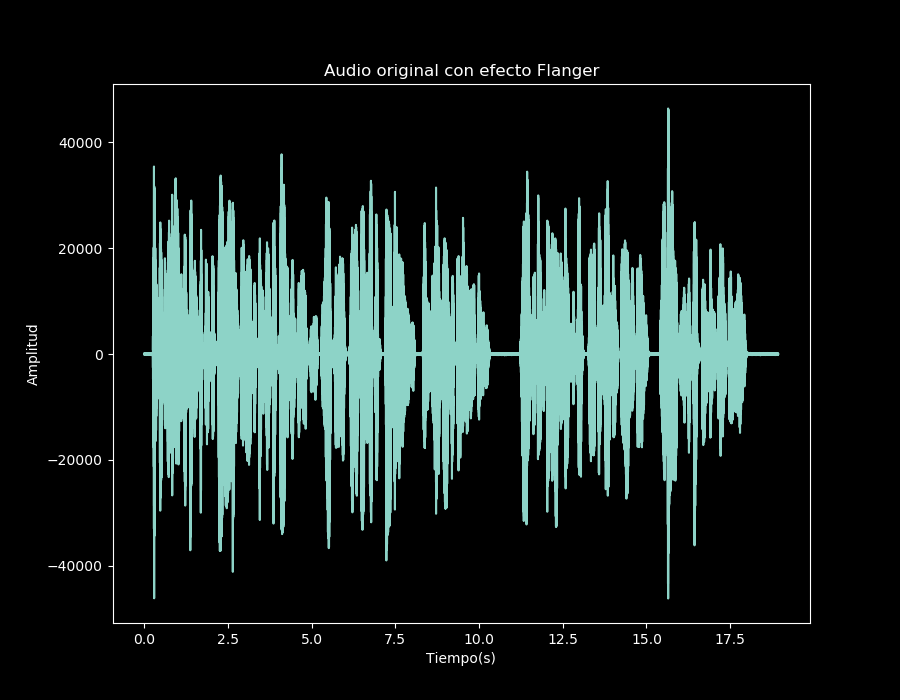

In [20]:
delay_TZ = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")

duracion = len(data_flanger)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_flanger)
plt.title("Audio original con efecto Flanger")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

Ahora veamos una implementación alternativa del efecto *flanger*:

In [21]:
def delay_LFO(data, fs, delay_sec, depth, fLFO):
    data_LFO = np.zeros(len(data)).astype(int)
    i = np.arange(len(data))
    Nd = LFO(i, fs, delay_sec, depth, fLFO).astype(int)
    x = np.abs(i - Nd)
    data_LFO[i] = data[x]
    return data_LFO

In [ ]:
inicio = time.time()
#############Flanger Basic#################
delay_prom = 0.005
depth = 0.000009
g=1
data_LFO = delay_LFO(data=data, fs=fs, delay_sec=delay_prom, depth=depth, fLFO=5) #Delay variable
data_flanger = data + g*data_LFO
##########################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_flanger, rate=fs))

In [23]:
delay_t = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")
print(f"Factor de optimizacion: {delay_TZ/delay_t}")

Tiempo de computo del efecto: 0.036933183670043945 segundos
Factor de optimizacion: 4.158512416967381


Como vemos, esta implementación alternativa es 164 veces más rápida que la primera, por lo que es mucho mejor para aplicaciones en tiempo real.

#### Flanger con realimentación <a name="11"></a>
Al igual que el *Delay con realimentación*, algunos flangers también incorporan una realimentación de la salida retardada a la entrada:

<div align="center"><img src="img_note/flanger/diagram_feed.png"/></div>

Y la expresión matemática que lo rige es:

\begin{equation}
y[n] = g_{FB}y[n-M[n]] + x[n] + (g_{FF} - g_{FB})x[n-M[n]]
\end{equation}

Y su respuesta en frecuencia es:

\begin{equation}
H(Z) = \frac{1+Z^{-M[n]}(g_{FF}-g_{FB})}{1-Z^{-M[n]}g_{FB}}
\end{equation}

In [ ]:
inicio = time.time()
###############Delay variable##############
delay_prom = 0.005
depth = 0.00001
n = np.arange(len(data))
M = LFO(n=n, fs=fs, delay_sec=delay_prom, depth=depth, fLFO=5).astype(int)
#############Flanger Feedback#################
gff=0.5
gfb=0.8
N = np.max(M)
b = np.zeros(N+1)
b[0] = 1
b[M] = (gff - gfb)

a = np.zeros(N+1)
a[0] = 1
a[M] = -gfb

data_flanger = sg.lfilter(b, a, data, axis=0)
##########################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_flanger, rate=fs))

Tiempo de computo del efecto: 0.16159486770629883 segundos


Text(0, 0.5, 'Amplitud')

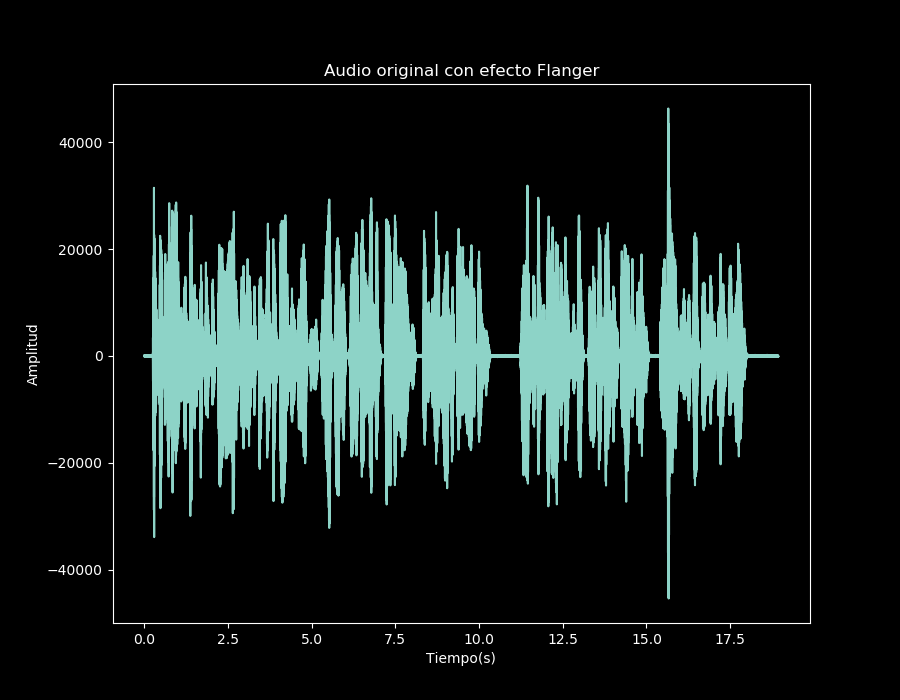

In [29]:
delay_TZ = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")

duracion = len(data_flanger)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_flanger)
plt.title("Audio original con efecto Flanger")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

Veamos ahora una implementación alternativa:

In [ ]:
inicio = time.time()
#############Flanger Feedback#################
delay_prom = 0.005
depth = 0.00001
gff=0.5
gfb=0.8
bounces = 4

out = data.copy()
out_feed = data.copy()
for i in range(1, bounces+1):
    delay_data = delay_LFO(out_feed, fs=fs, delay_sec=delay_prom, depth=depth, fLFO=5)*gfb #Delay variable
    padding_zero = np.zeros(len(out_feed) - len(delay_data))
    out_feed = np.concatenate((out_feed, padding_zero)) + np.concatenate((padding_zero, delay_data))
out = np.concatenate((out, np.zeros(len(out_feed) - len(out)))) + out_feed*gff
##########################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(out, rate=fs))

In [31]:
delay_t = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")
print(f"Factor de optimizacion: {delay_TZ/delay_t}")

Tiempo de computo del efecto: 0.15262174606323242 segundos
Factor de optimizacion: 1.0587932052575835


Nuevamente, esta implementación es 48 veces más rápida que la anterior, lo que la hace mejor para aplicaciones en tiempo real.
***
<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Chorus <a name="12"></a>
</h3>

El efecto *[Chorus](https://es.wikipedia.org/wiki/Chorus_effect)* ocurre cuando varios sonidos individuales con tonos y timbres similares suenan al unísono. Naturalmente, este efecto ocurre con un grupo de cantantes o violinistas, quienes presentan ligeras variaciones de tono y sincronización cuando suenan al unísono. Este efecto intenta simular este fenómeno, pero a partir de un solo sonido, como si fueran varios instrumentos sonando.

#### Flanging versus Chorus <a name="13"></a>
Estos efectos tienen implementaciones muy similares, ambos efectos están basados en líneas de retardo moduladas. La principal diferencia yace en que el efecto chorus utiliza tiempos de retardo grandes (alrededor de 30 ms) para acentuar la percepción de varios instrumentos sonando.

#### Chorus Basico <a name="14"></a>
Como ya anticipamos, el efecto *Chorus* es muy similar al efecto *Flanger* por lo que su diagrama en bloque no será muy distinto:

<div align="center"><img src="img_note/chorus/diagram_basic.png"/></div>

Y la expresión matemática que lo representa tampoco cambiara mucho:

\begin{equation}
y[n] = x[n] + gx[n-M[n]]
\end{equation}

Usando la transformada Z podemos obtener la respuesta en frecuencia:

\begin{equation}
H(Z) = 1 + gZ^{-M[n]}
\end{equation}

Como vemos, la estructura es muy similar a la del efecto *Flanger*, pero la principal diferencia es que el tiempo de retardo del efecto *Chorus* ronda alrededor de 20 a 30 ms.

In [ ]:
inicio = time.time()
###############Delay variable##############
delay_prom = 0.03
depth = 0.000009
n = np.arange(len(data))
M = LFO(n=n, fs=fs, delay_sec=delay_prom, depth=depth, fLFO=5).astype(int)
#############Chorus Basic#################
g = 1
N = np.max(M)

b = np.zeros(N+1)
b[0] = 1
b[M.astype(int)] = g

a = np.zeros(N+1)
a[0] = 1

data_chorus = sg.lfilter(b, a, data, axis=0)
##########################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_chorus, rate=fs))

Tiempo de computo del efecto: 0.7988836765289307 segundos


Text(0, 0.5, 'Amplitud')

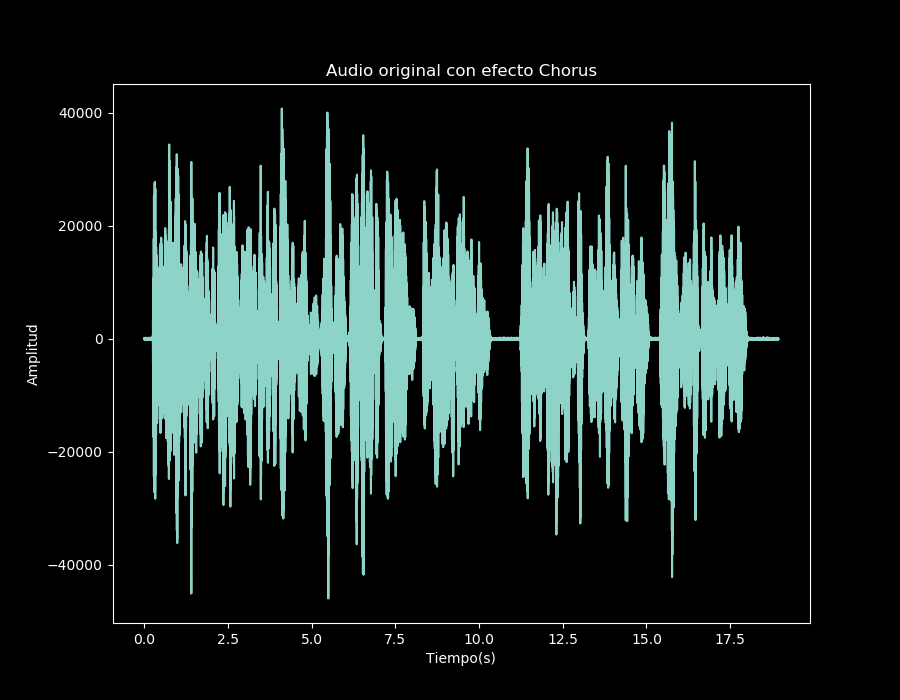

In [33]:
delay_TZ = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")

duracion = len(data_chorus)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_chorus)
plt.title("Audio original con efecto Chorus")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")

Veamos la implementación alternativa:

In [ ]:
inicio = time.time()
#############Chorus Basic#################
delay_prom = 0.03
depth = 0.000009
g=1
data_LFO = delay_LFO(data=data, fs=fs, delay_sec=delay_prom, depth=depth, fLFO=5) #Delay variable
data_chorus = data + g*data_LFO
##########################################
fin = time.time()

display(Audio(data, rate=fs))
display(Audio(data_chorus, rate=fs))

In [35]:
delay_t = fin-inicio
print(f"Tiempo de computo del efecto: {fin-inicio} segundos")
print(f"Factor de optimizacion: {delay_TZ/delay_t}")

Tiempo de computo del efecto: 0.03388690948486328 segundos
Factor de optimizacion: 23.57499366785805


Nuevamente, tenemos una implementación que es 26 veces mejor que la anterior y es mucho mejor para procesamiento en tiempo real.

#### Chorus con múltiples voces <a name="15"></a>
En el *Chorus basic* solo consideramos la posibilidad de una única voz a la cual agregamos una sola copia de la señal original con un retardo modulado. En este caso consideramos agregar más de una copia a la señal original, donde cada copia será retardada con un delay modulado:

<div align="center"><img src="img_note/chorus/diagram_multi.png"/></div>

In [ ]:
#############Chorus Multivoice#################
delay_prom1 = 0.03
delay_prom2 = 0.05
depth = 0.000009
g=1
data_LFO1 = delay_LFO(data, fs, delay_sec = delay_prom1, depth = depth, fLFO=5)
data_LFO2 = delay_LFO(data, fs, delay_sec = delay_prom2, depth = depth, fLFO=20)
out = data + g*data_LFO1 + g*data_LFO2
##########################################

display(Audio(data, rate=fs))
display(Audio(out, rate=fs))

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Diseño de filtros <a name="16"></a>
</h2>

Los filtros forman parte de los efectos básicos de audio. En esta sección implementaremos algunos de los filtros más conocidos e intentaremos acondicionarlos para procesamiento digital en tiempo real. La mayoría de filtros son comúnmente usados para modificar el contenido frecuencial de una señal.

#### Filtros FIR versus Filtros IIR <a name="17"></a>
Los *[filtros IIR](https://es.wikipedia.org/wiki/IIR)* (Infinite Impulse Response) como su nombre lo indica, tienen respuestas infinitas al impulso. Por el contrario, los *[filtros FIR](https://es.wikipedia.org/wiki/FIR_(Finite_Impulse_Response))* (Finite Impulse Response) tienen respuestas finitas al impulso. Básicamente, la diferencia entre generar una salida de longitud finita a una salida de longitud infinita reside principalmente en una estructura de retroalimentación. La única manera de que una respuesta impulso se extienda por un tiempo infinito es que de alguna manera la salida del sistema sea conectada al mismo sistema para generar una recursión en donde, en cada nuevo instante, la salida esté determinada por las salidas previas. Cualquier filtro digital puede ser construido a base de dos bloques elementales: retrasos y ganancias.

##### Filtro FIR <a name="18"></a>
La base de los *filtros FIR* consiste en conectar la entrada del filtro a una serie de retardos. En seguida se amplifica o atenúa cada retraso con un factor de ganancia específico y finalmente se suman las salidas. Ya que la estructura es análoga a una línea de retrasos con múltiples salidas, solemos hablar de *Taps* que en realidad solo son los factores de ganancias, coeficientes del filtro o valores de la respuesta al impulso. Podemos expresar matemáticamente la salida de un filtro FIR como la *[convolución](https://es.wikipedia.org/wiki/Convolución)* entra la señal de entrada $x(n)$ con la respuesta al impulso $h(n)$:

\begin{equation}
y[n] = \sum_{k=0}^{N-1}h[k]x[n-k]
\end{equation}

Donde $N-1$ es el orden del filtro, si aplicamos la transformada Z a la expresión anterior obtendremos la respuesta en frecuencia del filtro:

\begin{equation}
H(Z)=\sum_{k=0}^{N-1}h(k)Z^{-k}
\end{equation}

Y la estructura básica es:

<div align="center"><img src="img_note/filtros/FIR.png"/></div>

Donde los términos *h(n)* son los coeficientes del filtro y T son los retardos.

##### Filtro IIR <a name="19"></a>
Un *filtro IIR*, además de utilizar retrasos para los valores a la entrada del filtro, toma también los valores de la salida, les aplica una nueva cadena de retrasos y retroalimenta esta señal a la entrada del filtro:

\begin{equation}
y[n] = \sum_{i=0}^{N-1}b_{i}x[n-i] - \sum_{k=1}^{M}a_{k}y[n-k]
\end{equation}

Si aplicamos la transformada Z a la expresión anterior obtendremos la respuesta en frecuencia del filtro:

\begin{equation}
H(Z) = \frac{\sum_{k=0}^{M}b_{k}Z^{-k}}{1 + \sum_{k=1}^{N}a_{k}Z^{-k}}
\end{equation}

Si ahora separamos esta expresión en dos:

\begin{equation}
H(Z) = H_1(Z)H_2(Z)
\end{equation}

\begin{equation}
H_1(Z) = \sum_{k=0}^{M}b_{k}Z^{-k}
\end{equation}

\begin{equation}
H_2(Z) = \frac{1}{1 + \sum_{k=1}^{N}a_{k}Z^{-k}}
\end{equation}

De acuerdo a como se ubiquen las funciones de transferencia podremos llegar a 2 tipos de estructuras en forma directa:

<div align="center"><img src="img_note/filtros/IIR_I.png"/></div>

<div align="center"><img src="img_note/filtros/IIR_II.png"/></div>

En síntesis, la *forma directa II* necesita la mitad de bloques de retardo que la *forma directa I*, pero esta ventaja acarrea otro tipo de problemas. [Ver mas](https://en.wikipedia.org/wiki/Digital_filter#Filter_realization)

##### ¿Y entonces que tipo de filtro nos conviene usar? <a name="20"></a>
Desde el punto de vista de la velocidad de cómputo, los filtros IIR tienen una ventaja considerable, generalmente requieren menos coeficientes para ejecutar operaciones de filtrado similares, funcionan más rápido y requieren menos espacio de memoria. Pero en términos de fase, los filtros FIR ofrecen una respuesta más lineal que los filtros IIR, y este factor a mi parecer es más importante que la velocidad de cómputo, ya que esto implicaría que todas las frecuencias reciben el mismo *[retardo de grupo](https://es.wikipedia.org/wiki/Retardo_de_propagación)*, en algunos efectos que veremos más adelante la fase juega un papel esencial.

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Filtro Pasa Bajo (LP) <a name="21"></a>
</h3>

Los *[filtro pasa bajo](https://es.wikipedia.org/wiki/Filtro_paso_bajo)* permiten el paso de frecuencias por debajo de una *[frecuencia de corte](https://es.wikipedia.org/wiki/Frecuencia_de_corte)* ($\omega_{c}$) mientras eliminan todas aquellas frecuencias que se encuentren por encima de la $\omega_{c}$:

<div align="center"><img src="img_note/filtros/LP.png"/></div>

Para implementarlos con Python existen muchas herramientas, pero seguiremos usando *Scipy*. Antes hay que resolver un pequeño problema con su implementación en tiempo real, cuando computemos los coeficientes que describen al filtro no debemos computar los coeficientes cada vez que un frame ingrese al sistema, porque calcular los coeficientes del filtro consume mucho tiempo de cómputo, así que se inicializaran los filtros una vez y se reutilizaran los mismos coeficientes almacenados en un buffer.

Tiempo de computo del filtro: 0.0987081527709961 segundos


Text(0, 0.5, 'Atenuacion (dB)')

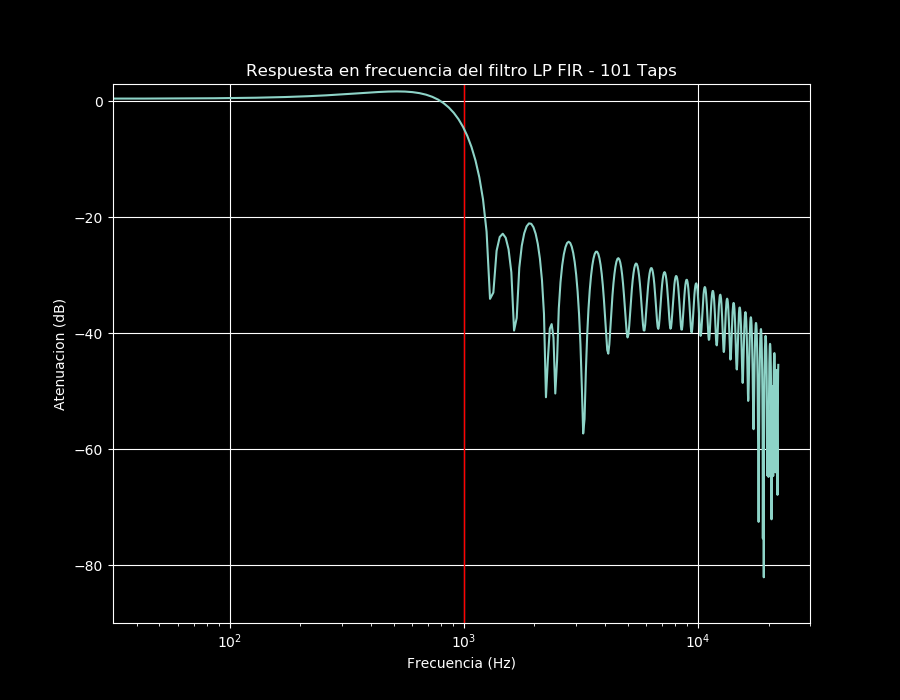

In [43]:
inicio = time.time()
fc = 1000
#################Filtro FIR LP 73 Taps###################
coef = 101
att = 30
nyq = fs/2
frec = np.array([0.0, fc, fc, nyq])
gain = np.array([g, g, -att, -200])
gain = 10**(gain/20)
buffer = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
data_LP = sg.filtfilt(buffer, 1, data, axis=0)
################################################
fin = time.time() 
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")

freq, response = sg.freqz(buffer, fs=fs)
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines(fc, -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro LP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

Text(0, 0.5, 'Fase (rad)')

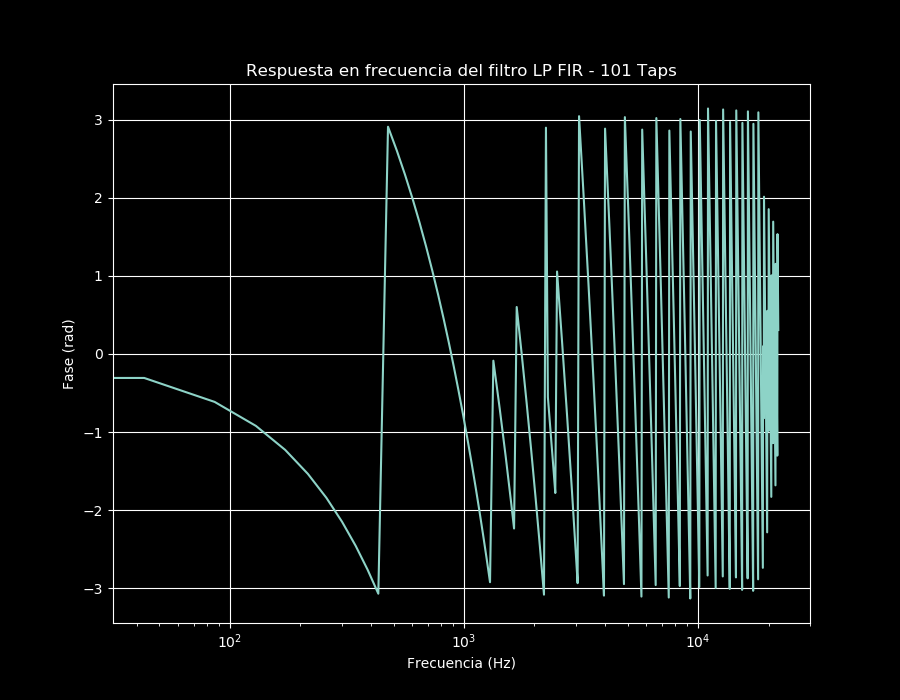

In [44]:
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, np.angle(response))
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro LP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")

0.007123792865282998 muestras


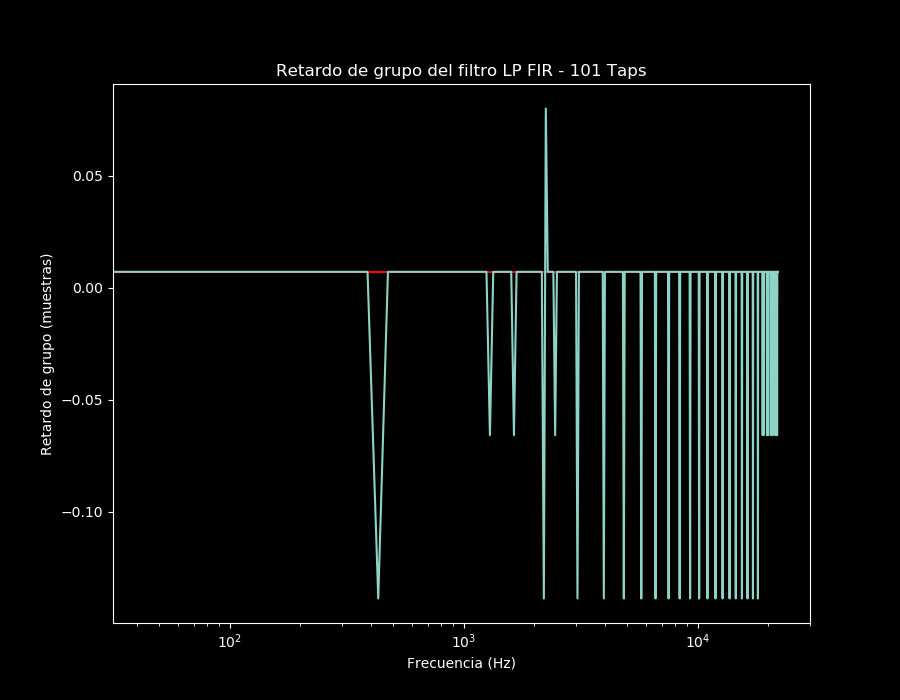

In [45]:
gd = -np.diff(np.angle(response))/np.diff(freq)
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq[0:-1], gd)
plt.hlines(np.max(gd[(freq[0:-1]<= fc)]), 0, fs/2, color="red")
plt.title(f"Retardo de grupo del filtro LP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de grupo (muestras)")
print(f"{np.max(gd[(freq[0:-1]<= fc)])} muestras")

Vemos que la respuesta de fase es lineal, ya que el retardo se mantiene cuasi constante para todas las frecuencias; sin embargo, si incrementamos el número de *taps* o *coeficientes*, el tiempo de cómputo se verá incrementado enormemente:

Tiempo de computo del filtro: 0.5774567127227783 segundos


Text(0, 0.5, 'Atenuacion (dB)')

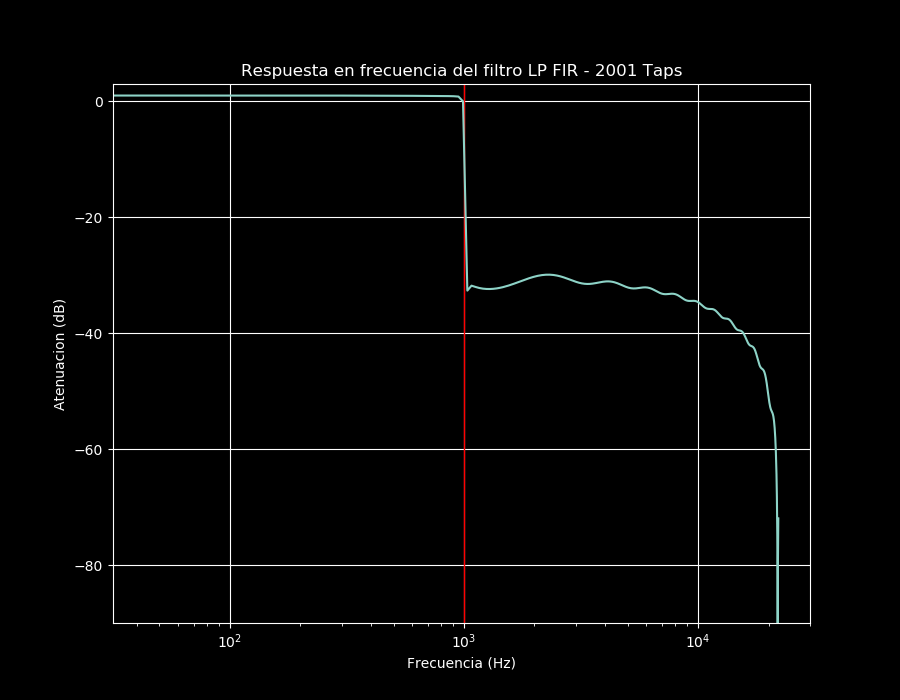

In [46]:
inicio = time.time()
fc=1000
#################Filtro FIR LP 2001 Taps###################
coef = 2001
att = 30
nyq = fs/2
frec = np.array([0.0, fc, fc, nyq])
gain = np.array([g, g, -att, -200])
gain = 10**(gain/20)
buffer = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
data_LP_FIR = sg.filtfilt(buffer, 1, data, axis=0)
fin = time.time() 
################################################
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(buffer, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines(fc, -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro LP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

Text(0, 0.5, 'Fase (rad)')

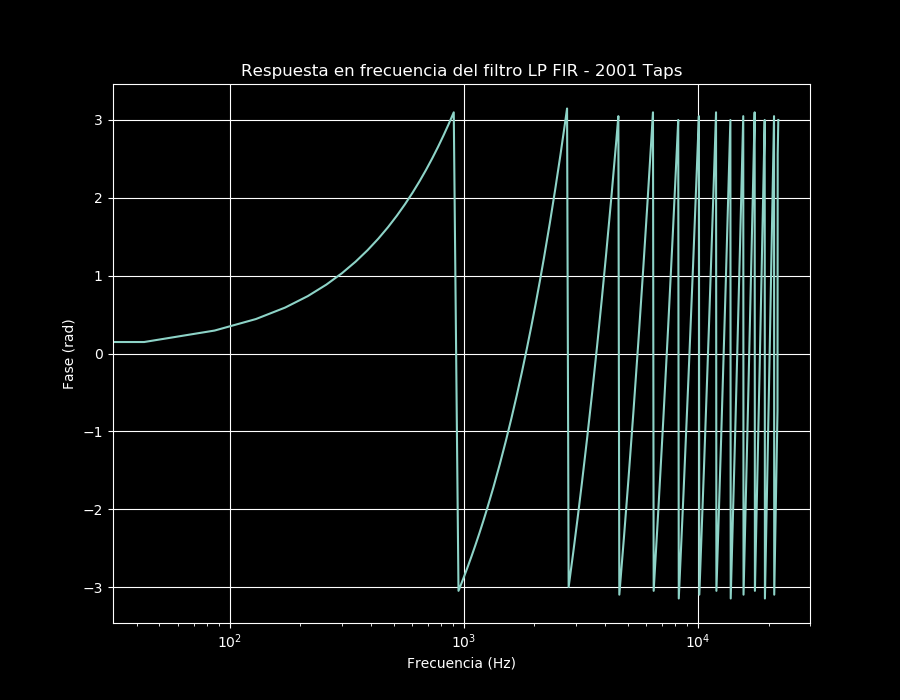

In [49]:
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, np.angle(response))
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro LP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")

-0.003419420575338438 muestras


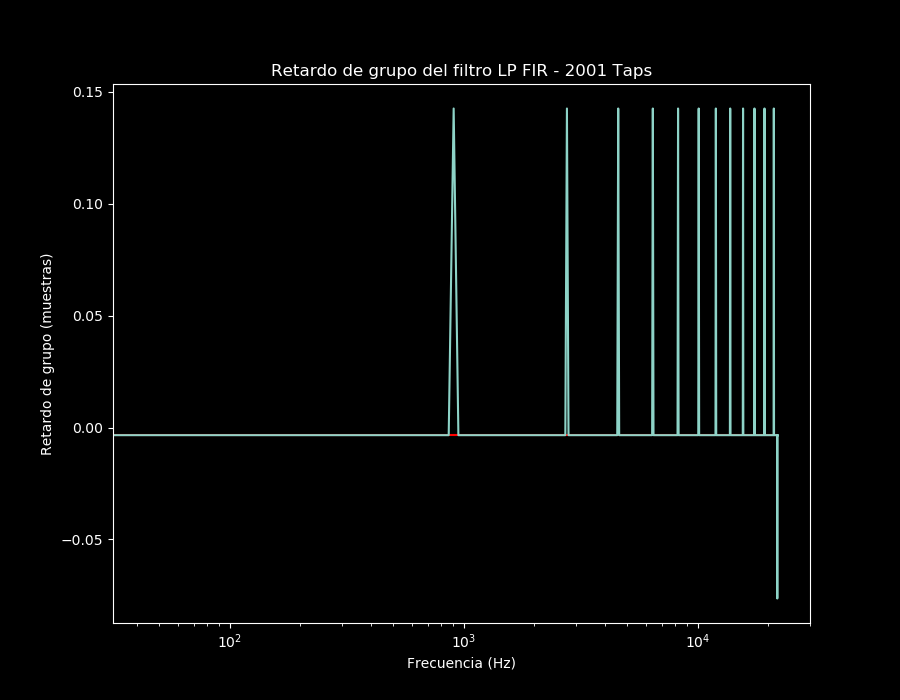

In [50]:
gd = -np.diff(np.angle(response))/np.diff(freq)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq[0:-1], gd)
plt.hlines(np.min(gd[(freq[0:-1]<= fc)]), 0, fs/2, color="red")
plt.title(f"Retardo de grupo del filtro LP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de grupo (muestras)")
print(f"{np.min(gd[(freq[0:-1]<= fc)])} muestras")

Apliquemos el filtro LP:

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_LP_FIR, rate=fs))

Como podemos ver, la fase se mantiene lineal, pero el tiempo de cómputo crece un 600%/700%. Ahora veamos que pasa con los filtros IIR:

Tiempo de computo del filtro: 1.7533469200134277 segundos


Text(0, 0.5, 'Atenuacion (dB)')

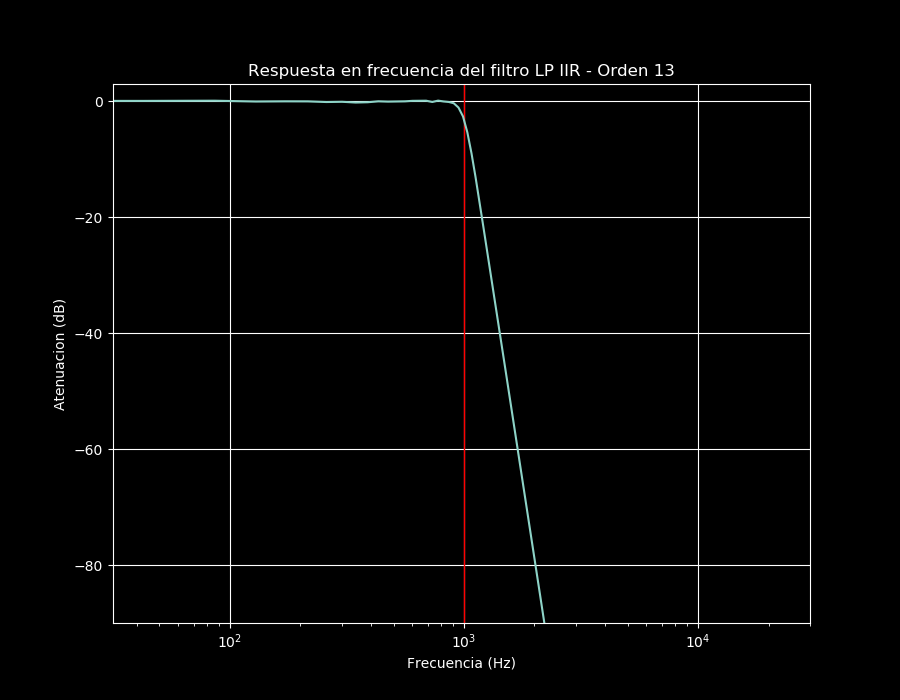

In [52]:
inicio = time.time()
#################Filtro IIR LP Orden 10###################
fc = 1000
frec = np.array([0.0, fc, fc, nyq])
gain = np.array([g, g, -att, -200])
gain = 10**(gain/20)
b1, a1 = sg.iirfilter(13, Wn=fc, fs=fs, btype="lowpass")
data_LP_IIR = sg.filtfilt(b, a, data, axis=0)
fin = time.time()
#########################################################
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(b1, a1, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines(fc, -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title("Respuesta en frecuencia del filtro LP IIR - Orden 13")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

Text(0, 0.5, 'Fase (rad)')

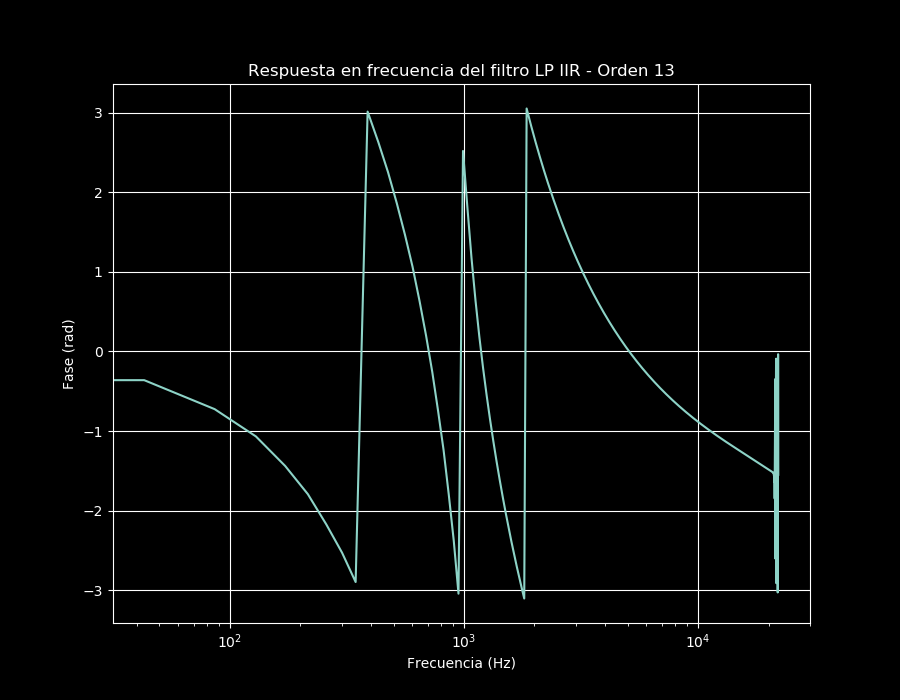

In [53]:
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, np.angle(response))
plt.grid()
plt.title("Respuesta en frecuencia del filtro LP IIR - Orden 13")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")

0.016294009366333396 muestras


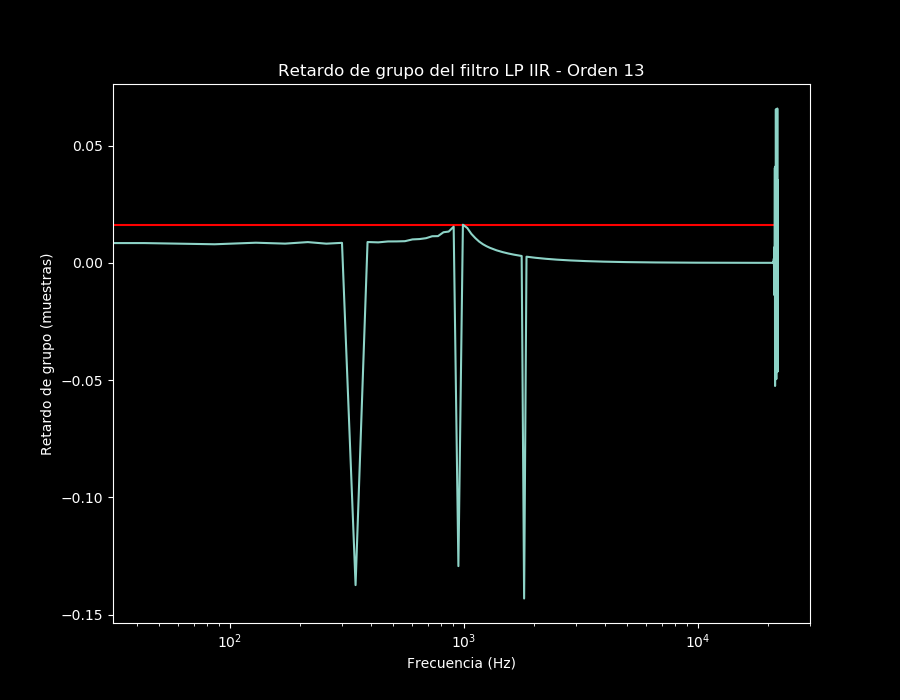

In [54]:
gd = -np.diff(np.angle(response))/np.diff(freq)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq[0:-1], gd)
plt.hlines(np.max(gd[(freq[0:-1]<= fc)]), 0, fs/2, color="red")
plt.title("Retardo de grupo del filtro LP IIR - Orden 13")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de grupo (muestras)")
print(f"{np.max(gd[(freq[0:-1]<= fc)])} muestras")

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_LP_IIR, rate=fs))

Como podemos ver, el tiempo de cómputo es bajo, pero la fase no es lineal, habrá un rango de frecuencias para los cuales el retardo no es constante, esto introduciría un desfase entre cada frecuencia, provocando muchas veces que el sonido presente una especie de sonido de 'burbujeo', además, cuando se utilizan este tipo de filtros suelen concatenarse varios, lo que acentuaría aún más el retardo de grupo. Por esto usaremos filtros FIR.

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Filtro Pasa Alto (HP) <a name="22"></a>
</h3>

Los *[filtros pasa alto](https://es.wikipedia.org/wiki/Filtro_paso_alto)* permiten el paso de frecuencias por encima de una *frecuencia de corte* ($\omega_{c}$) mientras eliminan todas aquellas frecuencias que se encuentren por debajo de la $\omega_{c}$:

<div align="center"><img src="img_note/filtros/HP.png"/></div>

Veamos como implementarlos con filtros FIR:

Tiempo de computo del filtro: 0.0877377986907959 segundos


Text(0, 0.5, 'Atenuacion (dB)')

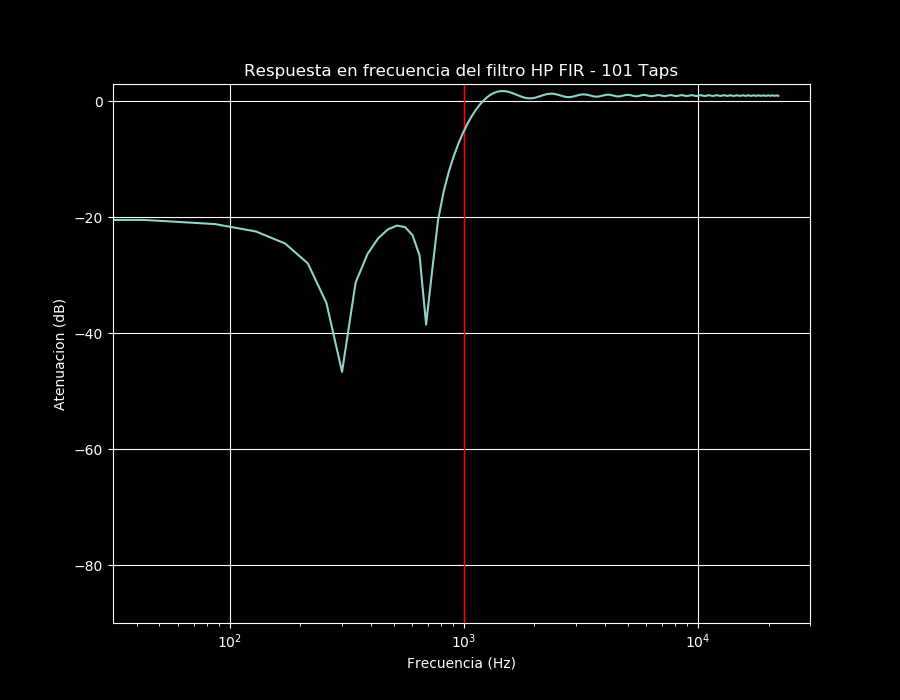

In [56]:
inicio = time.time()
fc = 1000
#################Filtro FIR HP 101 Taps###################
coef = 101
att = 30
nyq = fs/2
frec = np.array([0.0, fc, fc, nyq])
gain = np.array([-att, -200, g, g])
gain = 10**(gain/20)
buffer = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
data_HP = sg.filtfilt(buffer, 1, data, axis=0)
fin = time.time() 
################################################
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(buffer, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines(fc, -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro HP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

Text(0, 0.5, 'Fase (rad)')

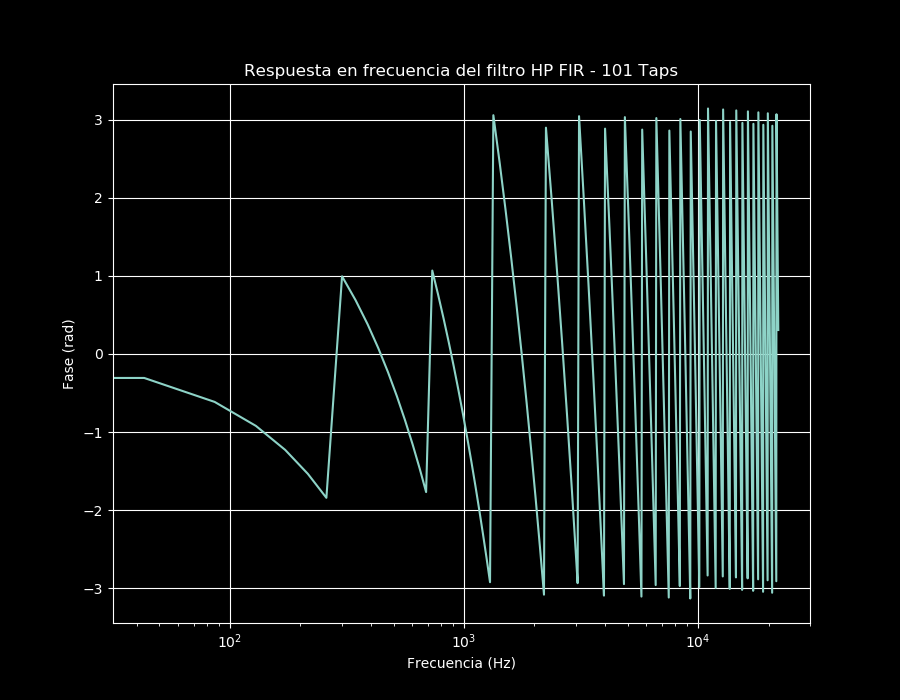

In [57]:
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, np.angle(response))
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro HP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")

0.00712379286528342 muestras


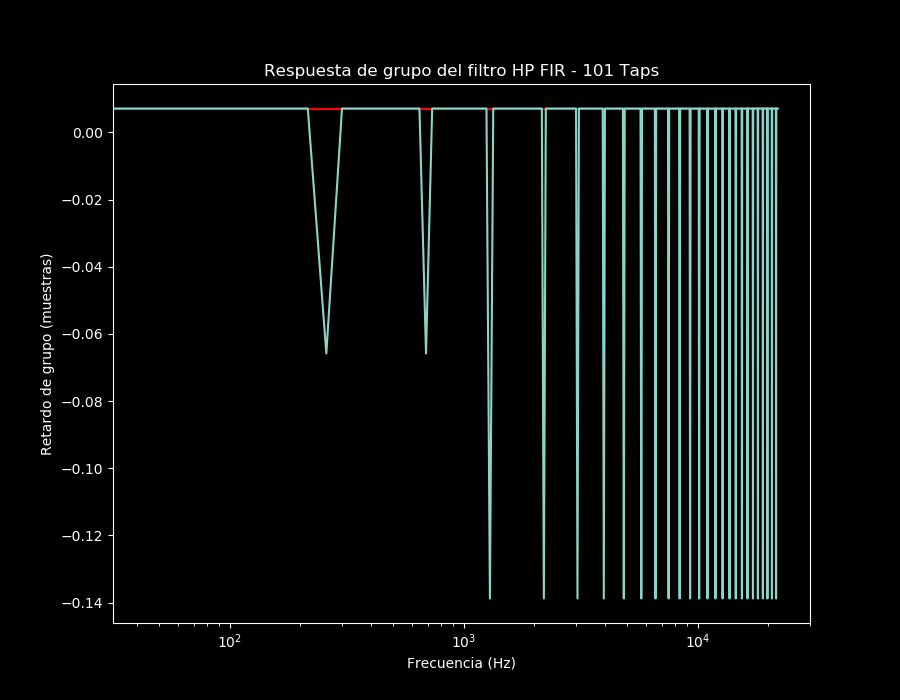

In [58]:
gd = -np.diff(np.angle(response))/np.diff(freq)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq[0:-1], gd)
plt.hlines(np.max(gd[(freq[0:-1]<= fc)]), 0, fs/2, color="red")
plt.title(f"Respuesta de grupo del filtro HP FIR - {coef} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de grupo (muestras)")
print(f"{np.max(gd[(freq[0:-1]<= fc)])} muestras")

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_HP, rate=fs))

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Filtro Pasa Banda (BP) <a name="23"></a>
</h3>

Los *[filtros pasa banda](https://es.wikipedia.org/wiki/Filtro_paso_banda)* permiten el paso de un rango de frecuencias, rango que queda definido por una *frecuencia central* $\omega_{c}$ (calculada como la *[media geométrica](https://es.wikipedia.org/wiki/Media_geométrica)* de las frecuencias de corte superior e inferior) y el *[ancho de banda](https://es.wikipedia.org/wiki/Ancho_de_banda)* $B$, que especifican la locación y ancho de la banda de paso. Todas las frecuencias por encima y por debajo de la banda de paso son bloqueadas.

<div align="center"><img src="img_note/filtros/BP.png"/></div>

Podemos implementar filtros pasa banda basándonos en filtros pasa bajo y filtros pasa alto, veamos como hacerlo con filtros FIR:

Tiempo de computo del filtro: 0.13465023040771484 segundos


Text(0, 0.5, 'Atenuacion (dB)')

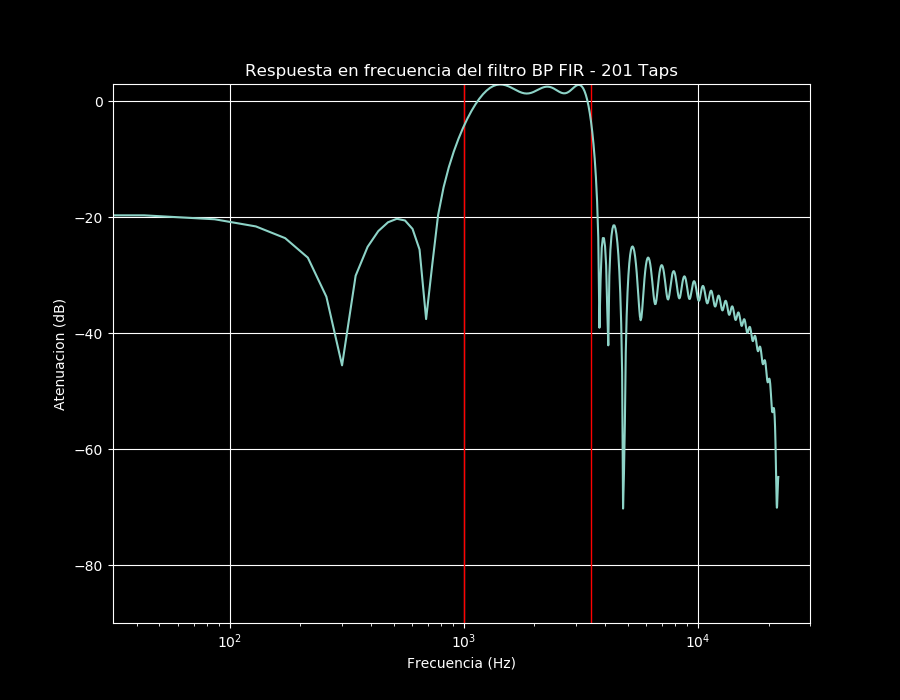

In [60]:
inicio = time.time()
fcs = 3500
fci = 1000
coef = 101
att = 30
nyq = fs/2
#################Filtro FIR LP 101 Taps###################
frec = np.array([0.0, fcs, fcs, nyq])
gain = np.array([g, g, -att, -200])
gain = 10**(gain/20)
buffer_LP = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
#################Filtro FIR HP 101 Taps###################
frec = np.array([0.0, fci, fci, nyq])
gain = np.array([-att, -200, g, g])
gain = 10**(gain/20)
buffer_HP = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
#################Filtro FIR BP 201 Taps###################
buffer = np.polymul(buffer_LP, buffer_HP)
data_BP = sg.filtfilt(buffer, 1, data, axis=0)
################################################
fin = time.time() 
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(buffer, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines([fci, fcs], -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro BP FIR - {len(buffer)} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_BP, rate=fs))

Text(0, 0.5, 'Fase (rad)')

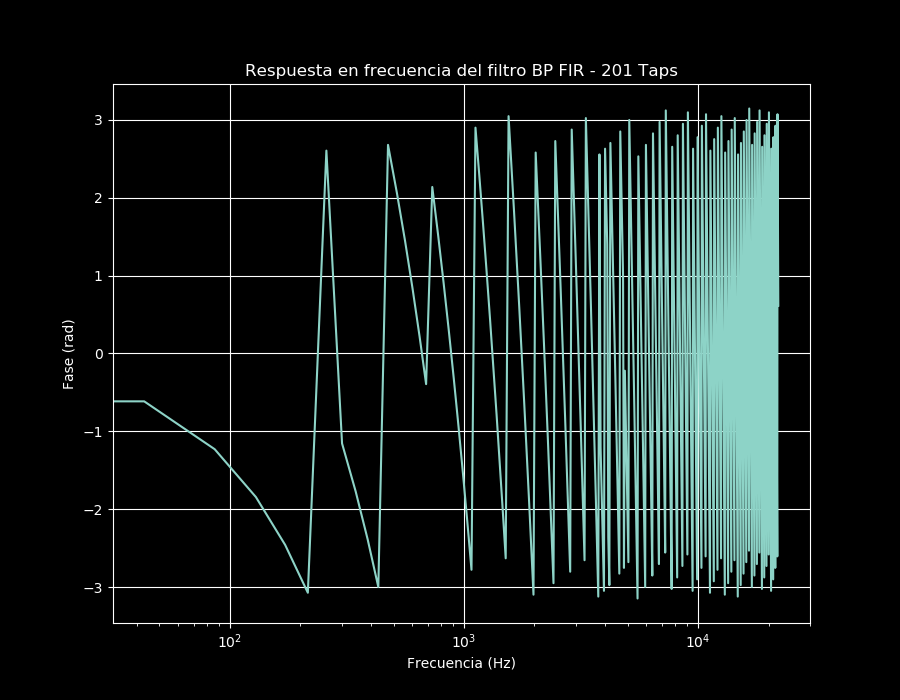

In [62]:
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, np.angle(response))
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro BP FIR - {len(buffer)} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")

0.08719522467106326 muestras


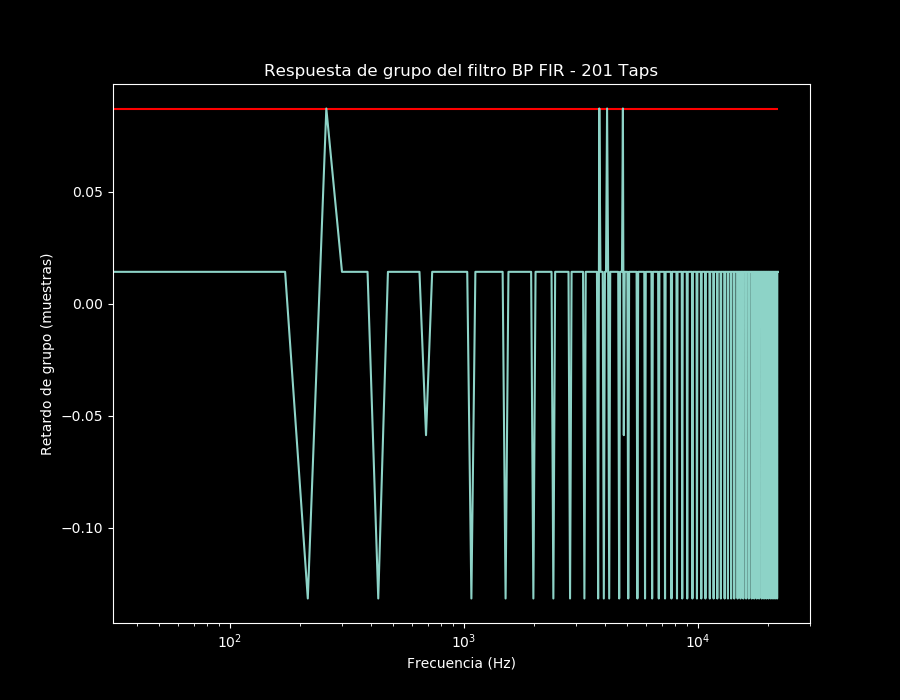

In [63]:
gd = -np.diff(np.angle(response))/np.diff(freq)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq[0:-1], gd)
plt.hlines(np.max(gd[(freq[0:-1]<= fc)]), 0, fs/2, color="red")
plt.title(f"Respuesta de grupo del filtro BP FIR - {len(buffer)} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de grupo (muestras)")
print(f"{np.max(gd[(freq[0:-1]<= fc)])} muestras")

Existe una variante de este filtro que consiste en su inversa, el *filtro de detenimiento de banda* (BS):

<div align="center"><img src="img_note/filtros/BS.png"/></div>

Tiempo de computo del filtro: 0.135636568069458 segundos


Text(0, 0.5, 'Atenuacion (dB)')

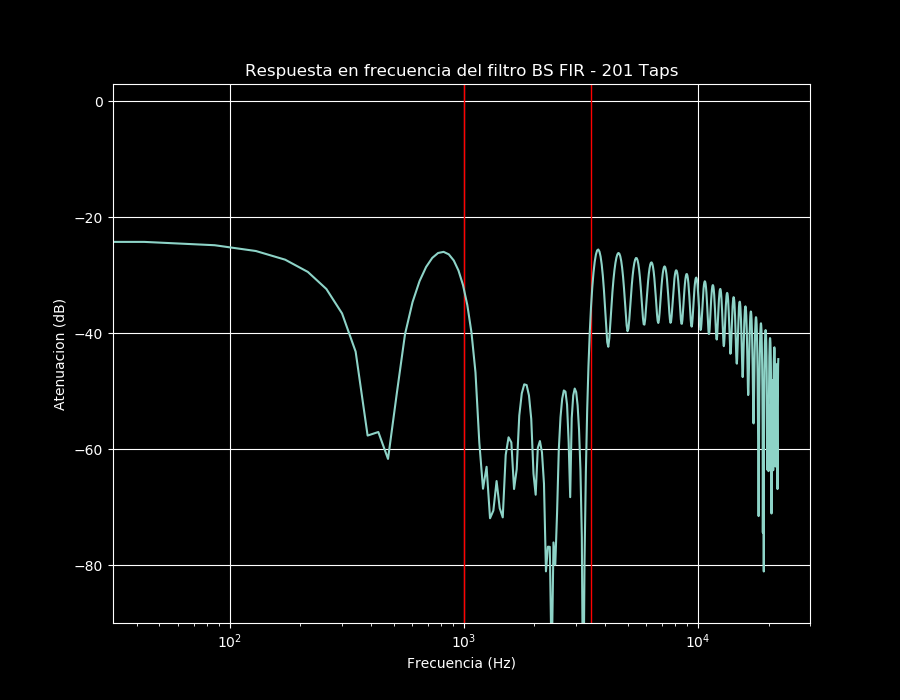

In [64]:
inicio = time.time()
fcs = 3500
fci = 1000
coef = 101
att = 30
nyq = fs/2
#################Filtro FIR LP 101 Taps###################
frec = np.array([0.0, fci, fci, nyq])
gain = np.array([g, g, -att, -200])
gain = 10**(gain/20)
buffer_LP = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
#################Filtro FIR HP 101 Taps###################
frec = np.array([0.0, fcs, fcs, nyq])
gain = np.array([-att, -200, g, g])
gain = 10**(gain/20)
buffer_HP = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
#################Filtro FIR BS 201 Taps###################
buffer = np.polymul(buffer_LP, buffer_HP)
data_BS = sg.filtfilt(buffer, 1, data, axis=0)
################################################
fin = time.time() 
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(buffer, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines([fci, fcs], -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro BS FIR - {len(buffer)} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_BS, rate=fs))

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Filtro Elimina Banda o Notch (FN) <a name="24"></a>
</h3>

Los *[filtros notch](https://es.wikipedia.org/wiki/Filtro_elimina_banda)* pueden parecer similares a los filtros de detenimiento de banda, con la única diferencia que aplican un refuerzo o corte a una banda de frecuencia específica mientras dejan el área alrededor sin cambios. Tal como los filtros pasa banda se especifica una frecuencia central y un ancho de banda.

<div align="center"><img src="img_note/filtros/BP.png"/></div>

Si bien podemos implementarlos con filtros FIR para lograr un verdadero filtro Notch se requiere una cantidad de *taps* considerablemente grande:

Tiempo de computo del filtro: 3.391448736190796 segundos


Text(0, 0.5, 'Atenuacion (dB)')

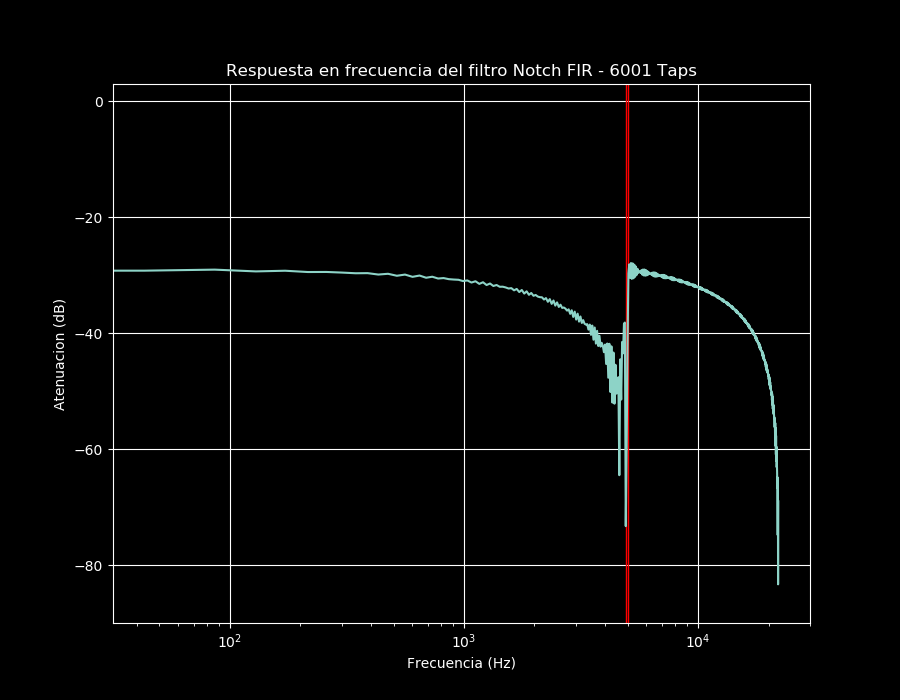

In [66]:
inicio = time.time()
fcs = 5000
fci = 4900
coef = 3001
att = 30
nyq = fs/2
#################Filtro FIR LP 101 Taps###################
frec = np.array([0.0, fci, fci, nyq])
gain = np.array([g, g, -att, -200])
gain = 10**(gain/20)
buffer_LP = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
#################Filtro FIR HP 101 Taps###################
frec = np.array([0.0, fcs, fcs, nyq])
gain = np.array([-att, -200, g, g])
gain = 10**(gain/20)
buffer_HP = sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)
#################Filtro FIR BS 201 Taps###################
buffer = np.polymul(buffer_LP, buffer_HP)
data_BS = sg.filtfilt(buffer, 1, data, axis=0)
################################################
fin = time.time() 
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(buffer, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines([fci, fcs], -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro Notch FIR - {len(buffer)} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

Y aun así no conseguimos acercarnos a lo que conocemos como filtro Notch, para este caso particular haremos uso de filtros IIR:

Tiempo de computo del filtro: 0.014989137649536133 segundos


Text(0, 0.5, 'Atenuacion (dB)')

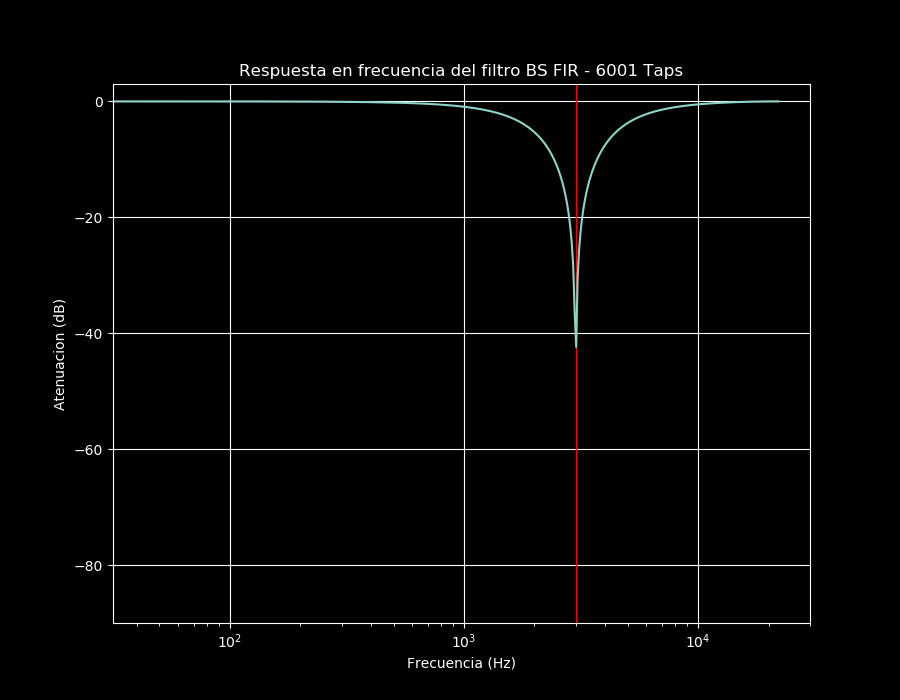

In [67]:
inicio = time.time()
fc = 3000
nyq = fs/2
Q=0.8 #FACTOR DE CALIDAD
#################Filtro FIR NOTCH###################
b, a = sg.iirnotch(w0=fc, Q=Q, fs=fs)
data_FN = sg.filtfilt(b, a, data)
################################################
fin = time.time() 
print(f"Tiempo de computo del filtro: {fin-inicio} segundos")
freq, response = sg.freqz(b, a, fs=fs)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.semilogx(freq, 20*np.log10(np.abs(response)))
plt.vlines(fc, -100, 10, lw=1, color="red")
plt.ylim(-90, 3)
plt.grid()
plt.title(f"Respuesta en frecuencia del filtro BS FIR - {len(buffer)} Taps")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_FN, rate=fs))

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Modulación de amplitud <a name="25"></a>
</h2>
 
El término *modulación de amplitud* hace referencia a la variación de amplitud de una señal provocada por otra, Aunque matemáticamente similares, los efectos *[Trémolo](https://es.wikipedia.org/wiki/Trémolo)* y *[Modulación del timbre](https://en.wikipedia.org/wiki/Ring_modulation)* son bastante diferentes.

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Trémolo <a name="26"></a>
</h3>

*Trémolo* es un término musical que significa *temblor*. Típicamente, se refiere a una forma de tocar notas rápidas y repetidas, como los redobles sobre un instrumento de percusión. El efecto *trémolo* busca imitar esta manera de tocar basándose en la modulación periódica de la amplitud de una señal, tal que una nota larga y sostenida sonara como una serie de notas rápidas y cortas. Este efecto es increíblemente fácil de implementar y el tiempo de cómputo que requiere es mínimo. La expresión matemática que rige al efecto trémolo es la siguiente:

\begin{equation}
y[n] = m[n]x[n]
\end{equation}

Donde $x$ es la señal de entrada y $m$ una señal periódica que varía lentamente.

<div align="center"><img src="img_note/tremolo/basic.png"/></div>

El sonido característico de un trémolo es generado por variación periódica de la ganancia de la señal de entrada a través del tiempo, por lo que la señal moduladora $m$ puede ser generada por un LFO tal que:

\begin{equation}
m[n] = 1 + \alpha cos(\omega_{LFO})
\end{equation}

Donde $\alpha$ es la intensidad del trémolo y $\omega_{LFO} = \frac{2\pi f_{LFO}}{f_s}$ es la frecuencia normalizada de oscilación (alrededor de 0.5 a 20 Hz)

Tiempo de computo del tremolo: 0.01595926284790039 segundos


(1, 1.8)

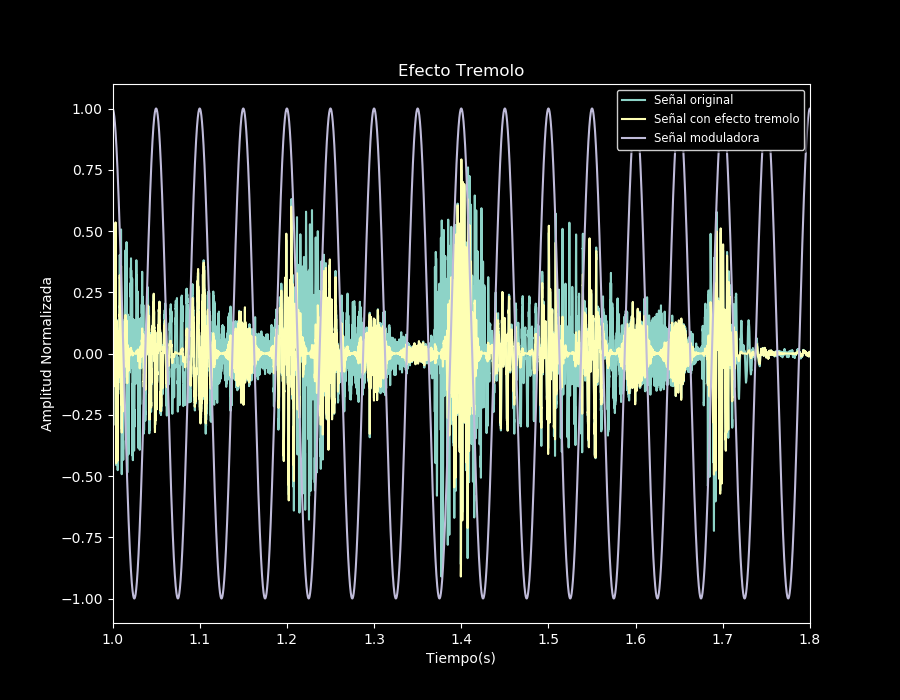

In [68]:
inicio = time.time()
################Tremolo#####################
alpha = 1
fLFO = 20
n = np.arange(len(data))
m = 1 + alpha*np.cos(2*np.pi*(fLFO/fs)*n)
data_trem = m*data
############################################
fin = time.time() 
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data_trem)/fs
t = np.linspace(0, duracion, len(data_trem))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_trem/np.max(np.abs(data_trem)), label="Señal con efecto tremolo")
plt.plot(t, m - 1, label="Señal moduladora")
plt.title("Efecto Tremolo")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(1, 1.8)

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_trem, rate=fs))

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Modulación de timbre <a name="27"></a>
</h3>

El trémolo es percibido como un efecto rítmico, esto se debe a que el oído humano es capaz de distinguir eventos rítmicos discretos entre 10 a 20 eventos rítmicos por segundo. A medida que incrementamos la frecuencia del LFO por encima de este umbral, la modulación de amplitud pasara a percibirse como un cambio de timbre. La modulación de timbre es un efecto que multiplica una señal de entrada por una señal portadora periódica, que produce, algunas veces, sonidos discordantes. Esto se debe a que la señal de salida, por lo general, no contiene *[frecuencias harmónicas](https://es.wikipedia.org/wiki/Armónico)* de la *[frecuencia fundamental](https://es.wikipedia.org/wiki/Frecuencia_fundamentalo)*. Es por esto que este efecto no es muy utilizado en producción musical.

La relación matemática del modulador de timbre es el mismo que el del trémolo:

\begin{equation}
y[n] = m[n]x[n]
\end{equation}

La diferencia básica yace en la señal portadora, la cual es una sinusoidal pura que al multiplicarla con la señal de entrada la salida resultante consiste de una suma y diferencia de frecuencias, considerando a la señal de entrada como una sinusoidal, entonces:

\begin{equation}
y[n] = m[n]x[n] = cos(\omega_c n)cos(\omega n) = cos((\omega_c - \omega)n) + \frac{cos((\omega_c + \omega)n)}{2}
\end{equation}

Donde $m[n] = cos(n \omega_c)$ es un tono puro.

Tiempo de computo del tremolo: 0.013961553573608398 segundos


(1, 1.02)

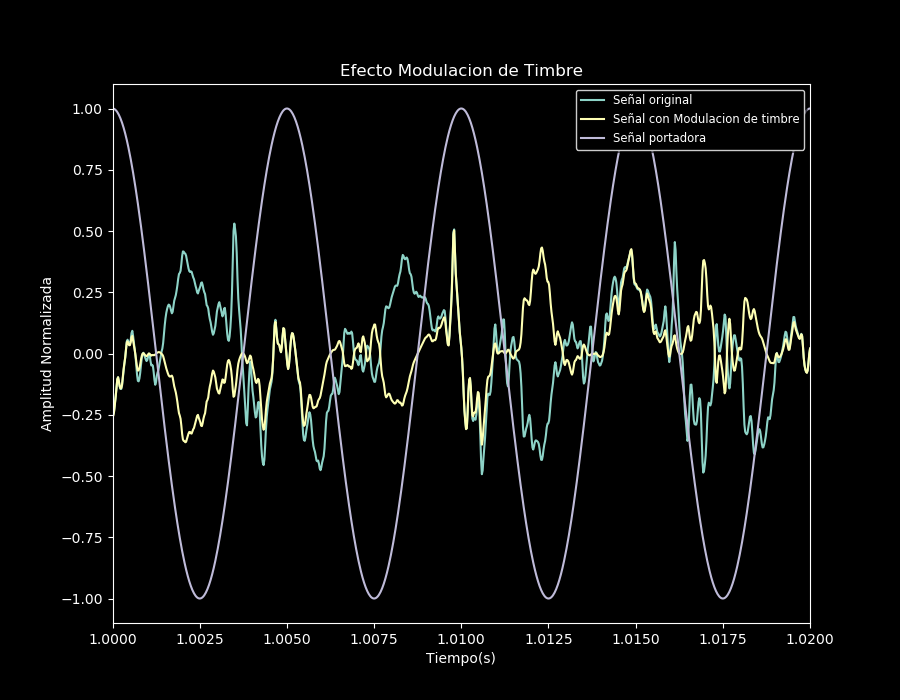

In [69]:
inicio = time.time()
################Ring Modulation#####################
alpha = 1
fLFO = 200
n = np.arange(len(data))
m = alpha*np.cos(2*np.pi*(fLFO/fs)*n)
data_rm = m*data
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data_trem)/fs
t = np.linspace(0, duracion, len(data_trem))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_rm/np.max(np.abs(data_rm)), label="Señal con Modulacion de timbre")
plt.plot(t, m, label="Señal portadora")
plt.title("Efecto Modulacion de Timbre")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(1, 1.02)

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_rm, rate=fs))

Un dato de color, este efecto es también conocido popularmente como efecto *Voz de Alien*. 

Simulemos la entrada de un tono puro y veamos que sucede con el espectro en frecuencia de la señal:

(1, 1.02)

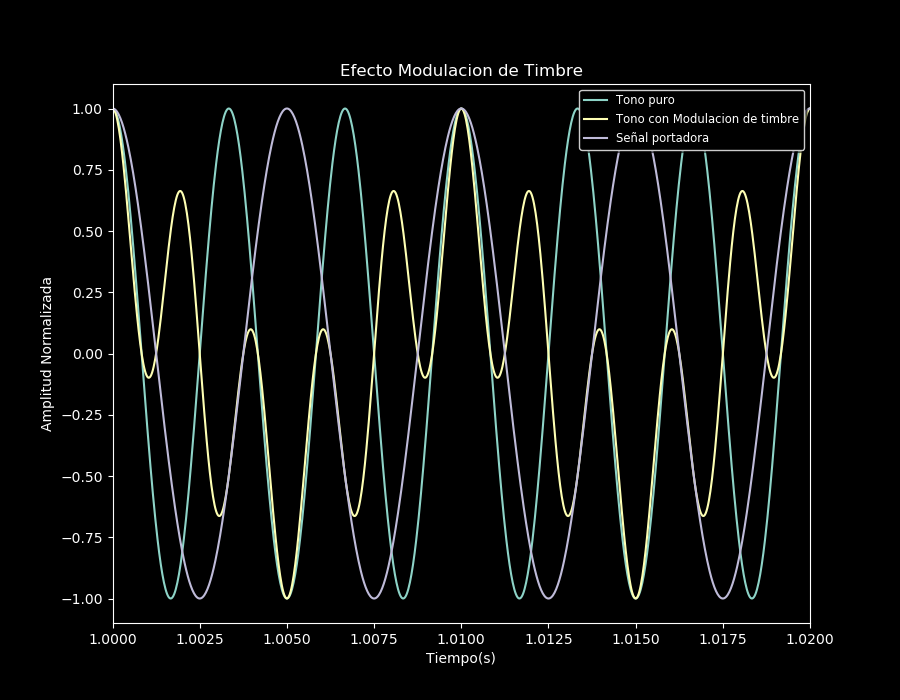

In [70]:
################Ring Modulation#####################
alpha = 1
fLFO = 200
n = np.arange(len(data))
m = alpha*np.cos(2*np.pi*(fLFO/fs)*n)
data_sine = np.cos(2*np.pi*(300/fs)*n) #tono puro
data_rm = m*data_sine
####################################################

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_sine, label="Tono puro")
plt.plot(t, data_rm/np.max(np.abs(data_rm)), label="Tono con Modulacion de timbre")
plt.plot(t, m/np.max(np.abs(m)), label="Señal portadora")
plt.title("Efecto Modulacion de Timbre")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(1, 1.02)

In [ ]:
display(Audio(data_sine, rate=fs))
display(Audio(data_rm, rate=fs))

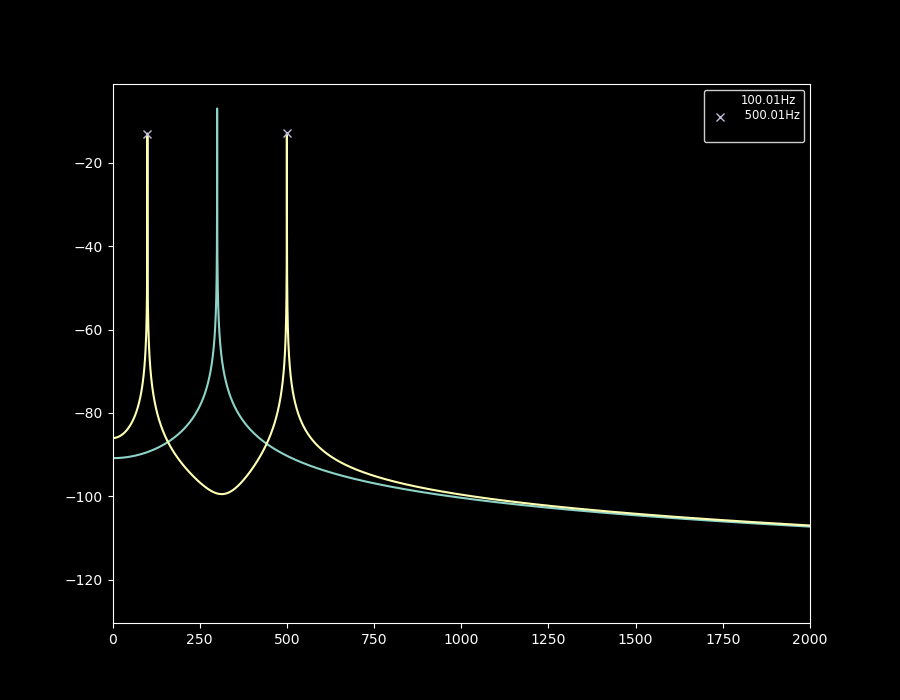

In [71]:
esp_sin = np.fft.fft(data_sine)*(1/data.shape[0])
esp_rm = np.fft.fft(data_rm)*(1/data_rm.shape[0])
freqz = np.fft.fftfreq(data.shape[0], d=1/fs)

esp_sin = esp_sin[:esp_sin.shape[0]//2]
esp_rm = esp_rm[:esp_rm.shape[0]//2]
freqz  = freqz [:freqz .shape[0]//2]

frame , _ = sg.find_peaks(10*np.log10(np.abs(esp_rm)**2), height=np.max(10*np.log10(np.abs(esp_rm)**2))-5)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(freqz, 10*np.log10(np.abs(esp_sin)**2))
plt.plot(freqz, 10*np.log10(np.abs(esp_rm)**2))
plt.plot(freqz[frame], 10*np.log10(np.abs(esp_rm)**2)[frame], ls="none", marker="x", label=f"{np.round(freqz[frame][0], 2)}Hz\n {np.round(freqz[frame][1], 2)}Hz\n")
plt.xlim(0, 2000)
plt.legend(loc='upper right', shadow=True, fontsize='small')

Básicamente, el tono puro fue descompuso en la suma de dos tonos, como habíamos anticipado, pero ninguno de estos dos tonos es harmónico de la frecuencia fundamental, a su vez vemos que la frecuencia fundamental se perdió por completo.

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Saturación <a name="28"></a>
</h2>

Los efectos de *Saturación* forman parte del ABC de los *[efectos de guitarra](https://es.wikipedia.org/wiki/Efectos_de_guitarra)*, desde los primeros días de la guitarra eléctrica, los guitarristas han añadido *[distorsión](https://es.wikipedia.org/wiki/Distorsión)* al sonido de sus instrumentos con fines expresivos.

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Overdrive, Distorsión y Fuzz <a name="29"></a>
</h3>

En esta sección cubriremos estos 3 efectos, los cuales están basados en el principio de *no linealidad*. Estos 3 términos generalmente se los usa como sinónimos, pero son levemente distintos. El efecto de *[overdrive](https://es.wikipedia.org/wiki/Overdrive_(música))* es un efecto que para niveles bajos de señal es cuasi-lineal, pero se vuelve más alineal a medida que el nivel de la señal aumenta; el efecto de *[distorsión](https://es.wikipedia.org/wiki/Distorsión)* opera principalmente en la región no lineal para todas las señales de entrada, y el efecto **fuzz** es un efecto completamente alineal que crea cambios más drásticos a la forma de onda de la señal, dando como resultado un sonido más fuerte y estridente.
Estos términos de aquí en más serán referidos como *distorsión*.

#### Curva característica <a name="30"></a>
Los efectos de audio más comunes forman parte de los *[sistemas lineales](https://es.wikipedia.org/wiki/Sistema_lineal)*. En un sistema lineal, si dos entradas son sumadas y procesadas, el resultado es la misma salida como si cada entrada hubiera sido procesada por separado y hubiéramos sumado los resultados, tal que:

\begin{equation}
f(x_1[n] + x_2[n]) = f(x_1[n]) + f(x_2[2])
\end{equation}

\begin{equation}
f(ax[n]) = af(x[n])
\end{equation}

Los efectos de distorsión pertenecen a los *[sistemas no lineales](https://es.wikipedia.org/wiki/Sistema_no_lineal)* para algunas señales de entrada, lo que significa que la relación anterior no se cumple.
Pero para describir a los efectos de distorsión hacemos uso de curvas características, que no son más que funciones matemáticas que relacionan la muestra de salida $y[n]$ con la muestra de entrada $x[n]$. Una posible curva característica para producir un efecto de distorsión está dado por:


\begin{equation}
f(x)= \left\{ \begin{array}{lcc}
             2x &   si  & 0 \leq x < \frac{1}{3} \\
             \\1-\frac{(2-3x)^2}{3} &  si & \frac{1}{3} \leq x < \frac{2}{3} \\
             \\ 1 &  si  & \frac{2}{3} \leq x < 1
             \end{array}
   \right.
\end{equation}

Para valores menores a $\frac{1}{3}$, el efecto opera sobre una región linear, a medida que nos acercamos a $x=\frac{2}{3}$ la señal de salida comienza a presentar un recorte donde la magnitud ya no crece más. La curva característica obtenida por esta función a trozos es la siguiente:

<div align="center"><img src="img_note/distortion/curve1.png"/></div>

Esta ecuación puede ser clasificada como un efecto de *overdrive*, ya que contiene regiones lineales y no lineales con una transición gradual entre ellos, y también forma parte de los tipos de distorsión de *recorte suave* que veremos en breve. La distorsión es un efecto invariable en el tiempo, en el que las muestras de salida dependen solo de las muestras de entrada y no del momento en que se procesan.

Usemos otra señal de ejemplo:

In [ ]:
fs , data = wavfile.read("guitar_ex.wav")
Audio(data, rate=fs)

Tiempo de computo del tremolo: 0.07380080223083496 segundos


(25, 25.05)

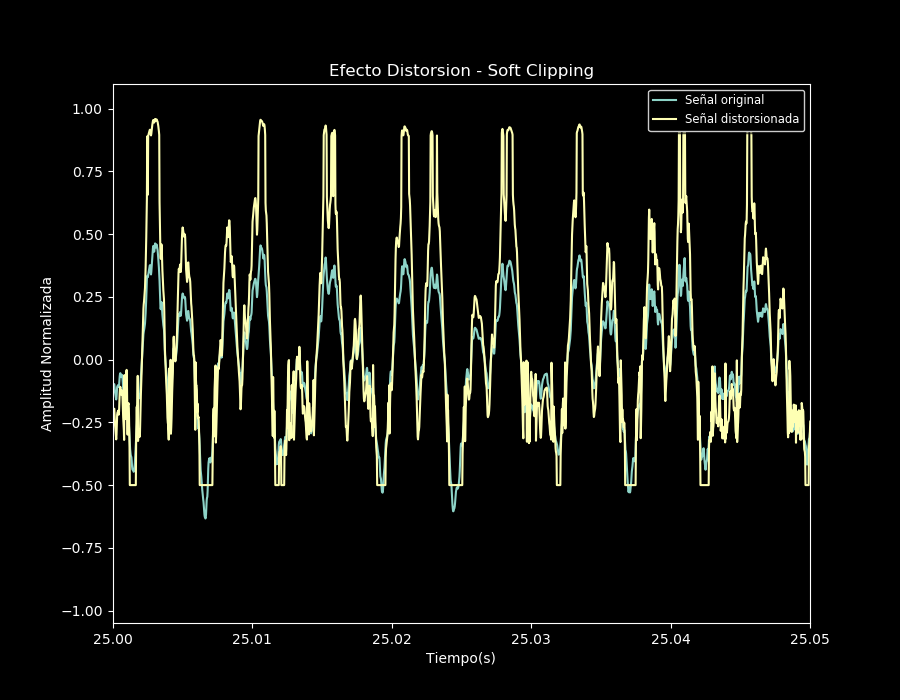

In [73]:
inicio = time.time()
################Soft Clipping#####################
g_db = 0
g = np.power(10, g_db / 20)
level_max = np.max(np.abs(data))
out = (data.copy()/level_max)*g

threshold = 1
threshold1 = threshold * 1/3
threshold2 = threshold * 2/3

if (out > threshold2).any():
    out[(out > threshold2)] = 1
if (out >= threshold1).any() & (out < threshold2).any():
    out[(out >= threshold1) & (out < threshold2)] = 1 - ((2-3*out[(out >= threshold1) & (out < threshold2)])/3)**2
if (out < threshold1).any():
    out[(out < threshold1)] = 2*out[(out < threshold1)]

if (out < -threshold2).any():
    out[(out < -threshold2)] = -1
if (out <= -threshold1).any() & (out > -threshold2).any():
    out[(out <= -threshold1) & (out > -threshold2)] = 1 - ((2-3*out[(out <= -threshold1) & (out > -threshold2)])/3)**2
if (out > -threshold1).any():
    out[(out > -threshold1)] = 2*out[(out > -threshold1)]
    
data_sat = out*level_max
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(out)/fs
t = np.linspace(0, duracion, len(out))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_sat/np.max(np.abs(data_sat)), label="Señal distorsionada")
plt.title("Efecto Distorsion - Soft Clipping")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(25, 25.05)

In [ ]:
display(Audio(data, rate=fs))
display(Audio((data_sat/np.max(np.abs(data_sat)))*0.2, rate=fs, normalize=False)) #Proteccion de oidos ON!!!!

#### Recorte fuerte o suave <a name="31"></a>
Tanto sistemas digitales como analógicos tienen límites de magnitud de la señal que pueden procesar. Más precisamente, en los sistemas digitales el límite viene impuesto por el número de bits del ADC y del DAC, cuando la señal excede estos límites, ocurren *recortes* o *clípeo*, lo que significa que aunque la señal de entrada incremente, no se producirá un incremento de la señal de salida. El *recorte* es una característica fundamental de los efectos de distorsión. Por esto, los efectos de distorsión pueden ser clasificados por *recortes fuertes* o *recortes suaves*:

<div align="center"><img src="img_note/distortion/curve2.png"/></div>

La diferencia entre estos dos tipos yace en cuan abrupta es la transición entre la región de corte y de no corte. La forma más simple de un *recorte fuerte* simplemente limita la señal por encima de un determinado umbral de magnitud:

\begin{equation}
f(x)= \left\{ \begin{array}{lcc}
             -1 &   si  & Gx \leq -1 \\
             \\Gx &  si & -1 < x < 1 \\
             \\ 1 &  si  & Gx \geq 1
             \end{array}
   \right.
\end{equation}

Donde $G$ es la *ganancia de entrada* aplicada a $x$ antes de la comparación con el umbral.

Tiempo de computo del tremolo: 0.02293848991394043 segundos


(25, 25.02)

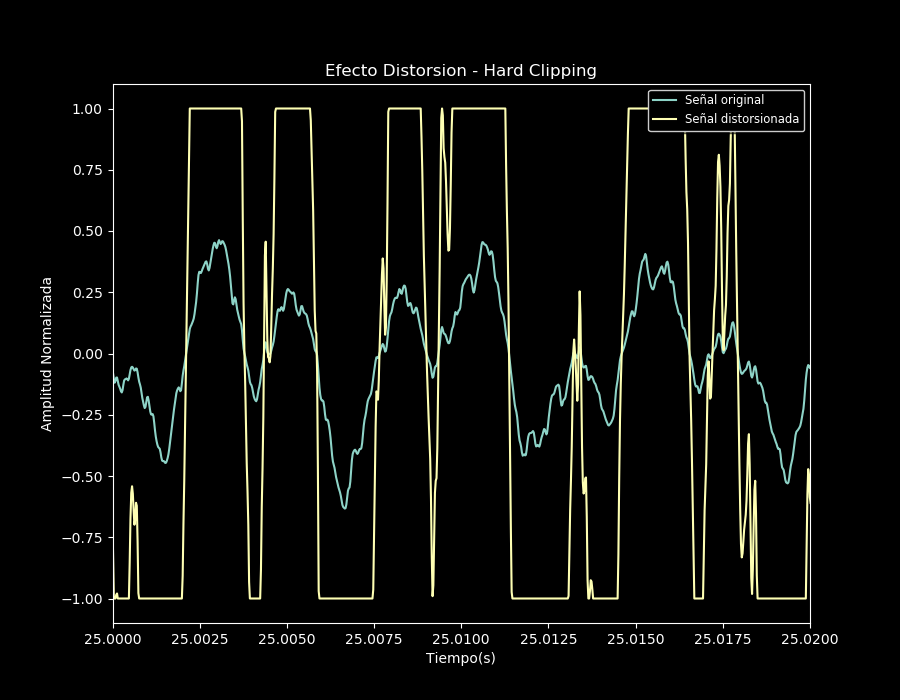

In [74]:
inicio = time.time()
################Hard Clipping#####################
g_db = 20
g = np.power(10, g_db / 20)
level_max = np.max(np.abs(data))
out = (data.copy()/level_max)*g

threshold = 1
if (out >= threshold).any():
    out[(out > threshold)] = 1
if (out < -threshold).any():
    out[(out <= -threshold)] = -1
        
data_sat = out*level_max
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data_sat)/fs
t = np.linspace(0, duracion, len(data_sat))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_sat/np.max(np.abs(data_sat)), label="Señal distorsionada")
plt.title("Efecto Distorsion - Hard Clipping")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(25, 25.02)

In [ ]:
display(Audio(data, rate=fs))
display(Audio((data_sat/np.max(np.abs(data_sat)))*0.3, rate=fs, normalize=False))

Otra forma de producir un *recorte suave* es a partir de la siguiente ecuación:

\begin{equation}
f(x) = sgn(x)(1-e^{|Gx|})
\end{equation}

Tiempo de computo del tremolo: 0.05286264419555664 segundos


(25, 25.2)

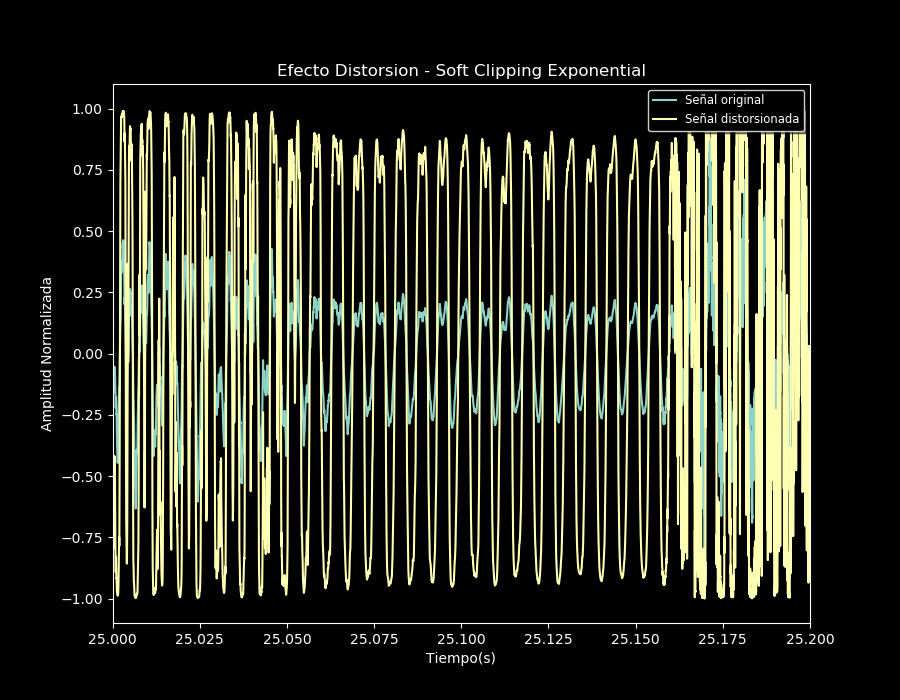

In [75]:
inicio = time.time()
################Soft Clipping Exponential#####################
g_db = 20
g = np.power(10, g_db / 20)
level_max = np.max(np.abs(data))
out = (data.copy()/level_max)*g

if (out > 0).any():
    out[(out > 0)] = 1 - np.exp(-np.abs(out[(out > 0)]))
if (out <= 0).any():
    out[(out <= 0)] = -1 + np.exp(-np.abs(out[(out <= 0)]))
    
data_sat = out*level_max
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data_sat)/fs
t = np.linspace(0, duracion, len(data_sat))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_sat/np.max(np.abs(data_sat)), label="Señal distorsionada")
plt.title("Efecto Distorsion - Soft Clipping Exponential")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(25, 25.2)

In [ ]:
display(Audio(data, rate=fs))
display(Audio((data_sat/np.max(np.abs(data_sat)))*0.2, rate=fs, normalize=False))

#### Simetría y rectificación<a name="32"></a>
Las ecuaciones presentadas anteriormente son todas *simétricas*, en las cuales se aplica la misma función no lineal tanto para valores positivos como para valores negativos de la señal. Haciendo alusión a amplificadores analógicos de guitarra reales, especialmente aquellos construidos a base de tubos de vacío, no siempre se comportaban de esta manera. Ya que el punto de corte difiere para la mitad de onda positiva y negativa.

##### Rectificación
Es un caso especial de funciones asimétricas usadas para efectos de distorsión, donde la función consiste en recortar o invertir la media onda negativa y dejar intacta la media onda positiva. Esto nos permite tener dos versiones de *rectificación*, *Rectificación de media onda* y *Rectificación de onda completa*:

Rectificación de media onda:

\begin{equation}
f_{half}(x) = max(x,0)
\end{equation}

Tiempo de computo del tremolo: 0.01891946792602539 segundos


(25, 25.2)

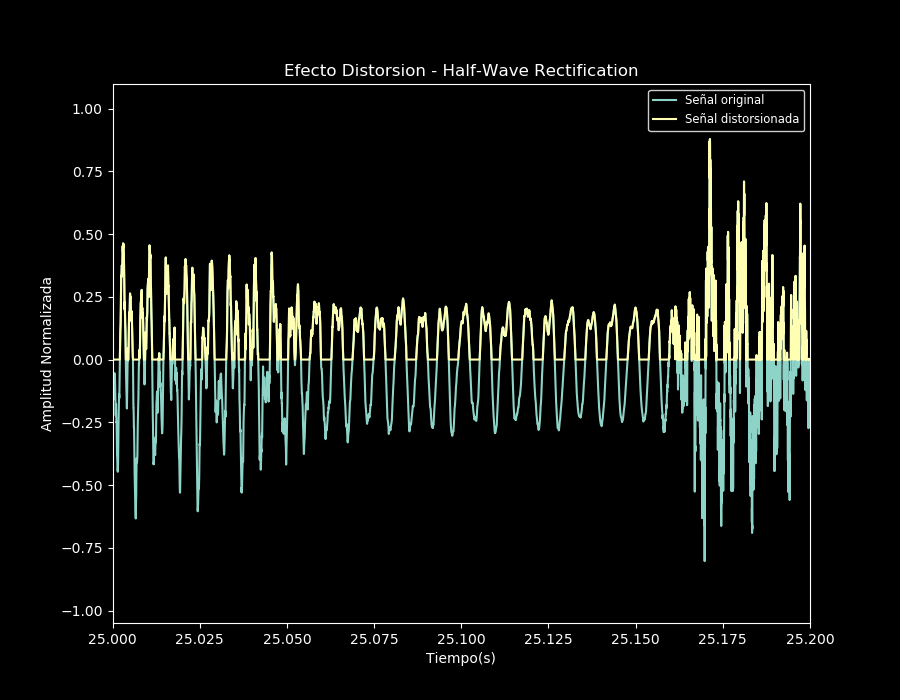

In [76]:
inicio = time.time()
################Half-Wave Rectification#####################
g_db = 20
g = np.power(10, g_db / 20)
level_max = np.max(np.abs(data))
out = (data.copy()/level_max)*g

out[(out <= 0)] = 0
    
data_sat = out*level_max
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data_sat)/fs
t = np.linspace(0, duracion, len(data_sat))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_sat/np.max(np.abs(data_sat)), label="Señal distorsionada")
plt.title("Efecto Distorsion - Half-Wave Rectification")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlim(25, 25.2)

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_sat, rate=fs))

Rectificación de onda completa:

\begin{equation}
f_{full} = |x|
\end{equation}

Tiempo de computo del tremolo: 0.01795196533203125 segundos


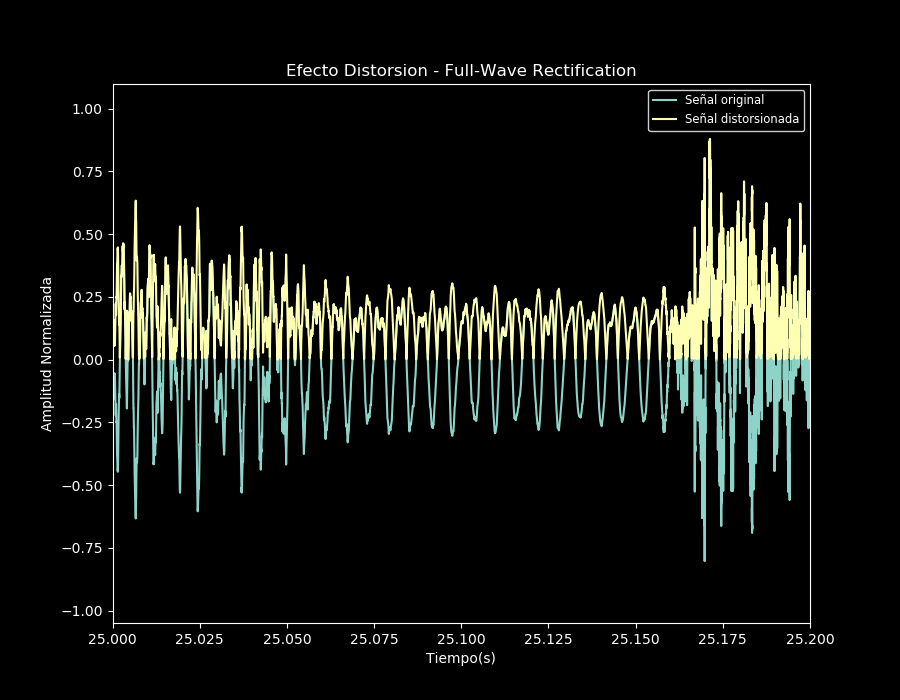

In [77]:
inicio = time.time()
################Full-Wave Rectification############
g_db = 20
g = np.power(10, g_db / 20)
level_max = np.max(np.abs(data))
out = (data.copy()/level_max)*g

out = np.abs(out)
    
data_sat = out*level_max
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data_sat)/fs
t = np.linspace(0, duracion, len(data_sat))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_sat/np.max(np.abs(data_sat)), label="Señal distorsionada")
plt.title("Efecto Distorsion - Full-Wave Rectification")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.xlim(25, 25.2)
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_sat, rate=fs))

### Distorsión armónica <a name="33"></a>
Veamos que sucede con el espectro frecuencial de un tono puro:

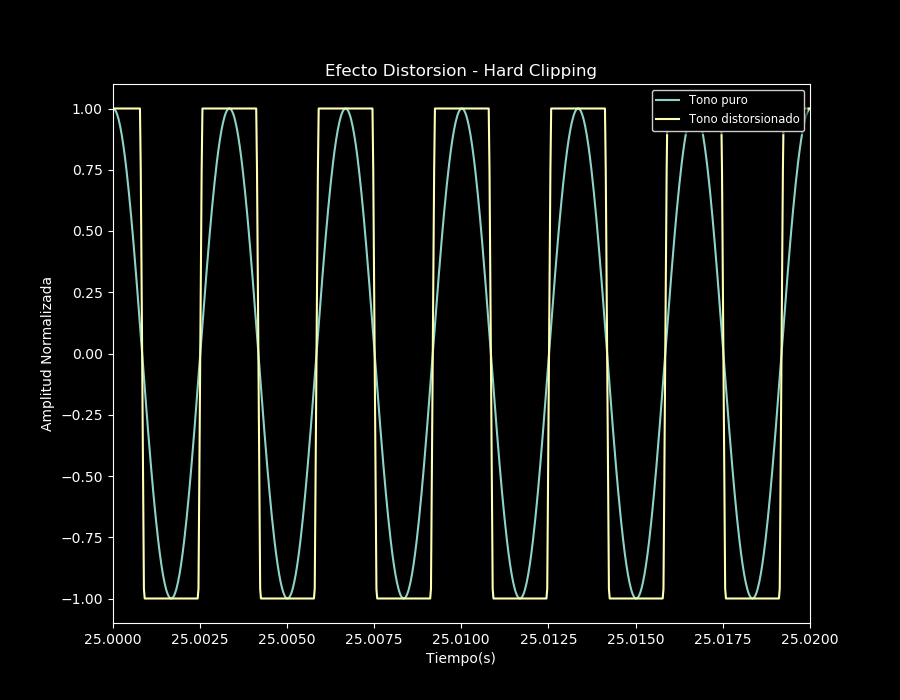

In [78]:
n = np.arange(len(data))
data_sine = np.cos(2*np.pi*(300/fs)*n) #tono puro
################Hard Clipping#####################
g_db = 20
g = np.power(10, g_db / 20)
level_max = np.max(np.abs(data_sine))
out = (data_sine.copy()/level_max)*g

threshold = 1
if (out >= threshold).any():
    out[(out > threshold)] = 1
if (out < -threshold).any():
    out[(out <= -threshold)] = -1
        
data_sat = out*level_max
####################################################
duracion = len(out)/fs
t = np.linspace(0, duracion, len(out))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data_sine/np.max(np.abs(data_sine)), label="Tono puro")
plt.plot(t, data_sat/np.max(np.abs(data_sat)), label="Tono distorsionado")
plt.title("Efecto Distorsion - Hard Clipping")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.xlim(25, 25.02)
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio((data_sat/np.max(np.abs(data_sat)))*0.2, rate=fs, normalize=False))

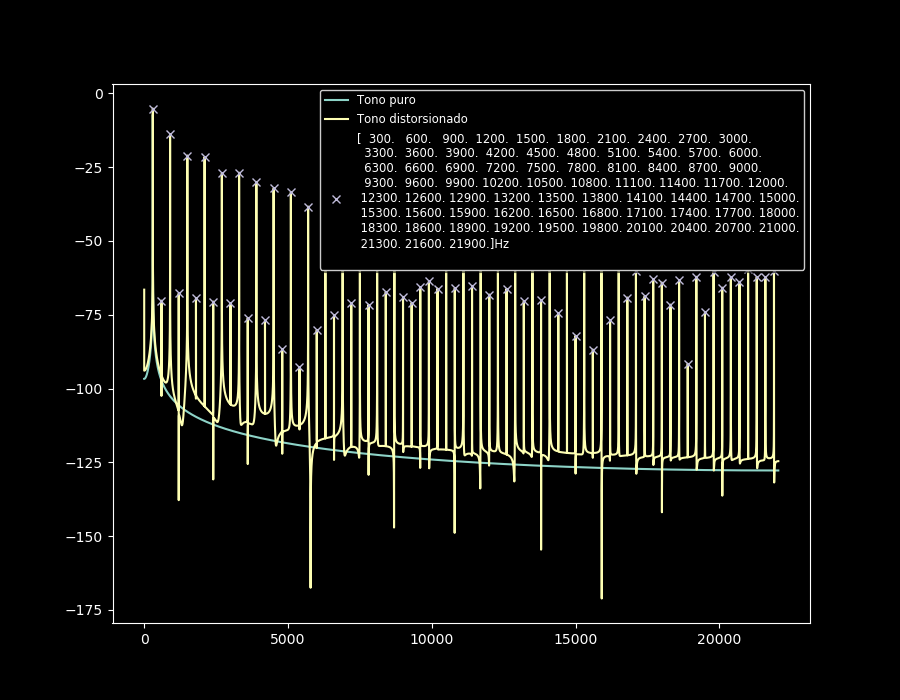

In [79]:
esp_sin = np.fft.fft(data_sine)*(1/data.shape[0])
esp_sat = np.fft.fft(data_sat)*(1/data_sat.shape[0])
freqz = np.fft.fftfreq(data.shape[0], d=1/fs)

esp_sin = esp_sin[:esp_sin.shape[0]//2]
esp_sat = esp_sat[:esp_sat.shape[0]//2]
freqz  = freqz[:freqz.shape[0]//2]

frame , _ = sg.find_peaks(10*np.log10(np.abs(esp_sat)**2), height=-100)

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(freqz, 10*np.log10(np.abs(esp_sin)**2), label="Tono puro")
plt.plot(freqz, 10*np.log10(np.abs(esp_sat)**2), label="Tono distorsionado")
plt.plot(freqz[frame], 10*np.log10(np.abs(esp_sat)**2)[frame], ls="none", marker="x", label=f"{np.round(freqz[frame])}Hz\n")
plt.legend(loc='upper right', shadow=True, fontsize='small')

Los efectos de distorsión los hemos entendido por aplicación de funciones no lineales en el dominio temporal; sin embargo, las características del sonido son resultados de los efectos que genera la función no lineal en el dominio frecuencial. Los efectos lineales tienen la propiedad de realizar cambios de magnitud y fase relativos a determinadas componentes de frecuencia de una señal, sin añadir nuevas componentes de frecuencia que no existan en la señal original. Por otro lado, las funciones no lineales usadas en efectos de distorsión producen nuevas componentes de frecuencia en la salida de acuerdo a dos procesos: *[distorsión armónica](https://es.wikipedia.org/wiki/Distorsión_armónica)* y *[distorsión de intermodulación](https://es.wikipedia.org/wiki/Distorsión_por_intermodulación_de_transistores)*. Tal como podemos ver en el *plot* anterior, el efecto de distorsión aplicado al tono puro de 300 Hz ha añadido una serie de frecuencias armónicas a la señal original. También podemos ver que a partir de una señal sinusoidal pudimos obtener una señal cuasi-cuadrada, ya que las esquinas de esta señal dependerán de cuan fuerte sea la distorsión aplicada.

****

<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Vocoder de fase <a name="34"></a>
</h2>

El término de *vocoder de fase* es usado para describir un grupo de técnicas de análisis y síntesis de sonido, donde el procesamiento de la señal es realizada en el dominio frecuencial. Los efectos de vocoder de fase utilizan información de frecuencia y fase calculadas por la *Transformada de Fourier* para implementar una variedad de efectos de audio, tales como *Estiramiento temporal*, *Cambio de tono*, *Robotización* y *Efecto de Susurro* o *Whisperizacion*, los cuales veremos en breve. 

Las operaciones básicas de los vocoderes de fase consisten en segmentar la señal de entrada en bloques discretos, con la ayuda de la utilización de una ventana, y convertir cada bloque temporal al dominio frecuencial, esto puede conseguirse fácilmente mediante la STFT (Short-Time Fourier Transform), para posteriormente efectuar las modificaciones de amplitud y fase de componentes de frecuencia específicos y mediante la ISTFT retornar cada bloque frecuencial a su dominio temporal apropiadamente alineados para obtener la salida final. Este proceso es también conocido como *[Overlap-add](https://en.wikipedia.org/wiki/Overlap–add_method)*.

<div align="center"><img src="img_note/vocoder/process.png"/></div>

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Robotizacion <a name="35"></a>
</h3>

El efecto de *robotización* es comúnmente usado en señales de voz. Esto es porque aplica un tono constante a la señal mientras preserva los *[formantes](https://es.wikipedia.org/wiki/Formante)* vocales que determinan los sonidos de vocales y consonantes, resultando en una voz monótona como la de un robot que es muy inteligible. Como ya vimos en el proceso de *overlap-add* utilizamos la STFT para descomponer una señal de entrada en una serie de frames a los cuales aplicamos la FFT, para realizar este efecto a la fase de cada bin de frecuencia debemos setearla a cero, mientras la magnitud debemos mantenerla sin cambios. El seteo a cero de la fase de cada bin de frecuencia es equivalente a convertir a cada bin de frecuencia a un número real. Supongamos que cada bin de frecuencia $k$ es descrita por $a_k + jb_k$. Entonces el valor de salida de este efecto será:

\begin{equation}
\sqrt{{a_k}^2 + {b_k}^2}
\end{equation}

Este proceso debe repetirse para cada bin de frecuencia de cada frame. Al regularizar la información de fase, cada componente de frecuencia se reiniciará efectivamente desde la fase cero en cada salto en lugar de conectarse sin problemas de un salto al siguiente. Esto provoca un tono audible constante que depende del tamaño del salto. En general, el tono de la voz del robot se puede determinar por:

\begin{equation}
f_{robot} = \frac{f_s}{H}
\end{equation}

Siendo H el ancho del hop en muestras. Cabe destacar que el sonido de robotización también depende del ancho de la ventana utilizada. Veamos como implementarlo, pero antes usemos una señal vocal:

In [ ]:
fs , data = wavfile.read("veritasium.wav")
Audio(data, rate=fs)

Tiempo de computo del tremolo: 0.16995453834533691 segundos


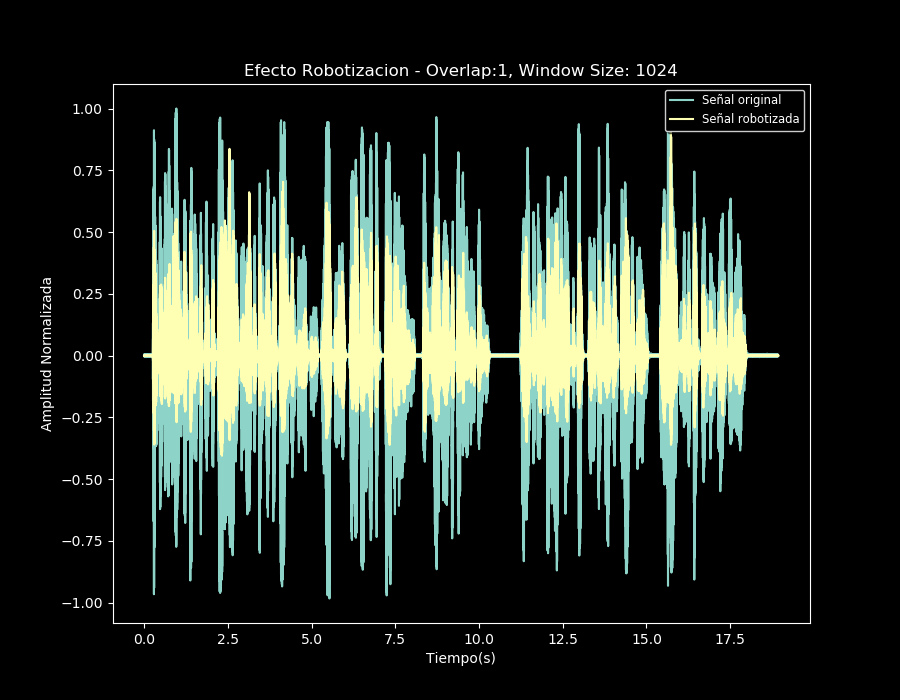

In [81]:
inicio = time.time()
################Robotizacion############
mod_rate = 1
overlap = 1

window_size = int(1024*mod_rate)    
hop = window_size//4
w_ = np.hanning(window_size)

data_pd = np.pad(data, [(hop, 0)])
data_stft = sg.stft(x=data_pd, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)

data_voc = np.abs(data_stft[2])

t, data_rbt = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_rbt[:data.shape[0]]/np.max(np.abs(data_rbt)), label="Señal robotizada")
plt.title(f"Efecto Robotizacion - Overlap:{overlap}, Window Size: {window_size}")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_rbt, rate=fs))

Veamos que pasa con el efecto cuando variamos el ancho de la ventana:

Tiempo de computo del tremolo: 0.18848729133605957 segundos


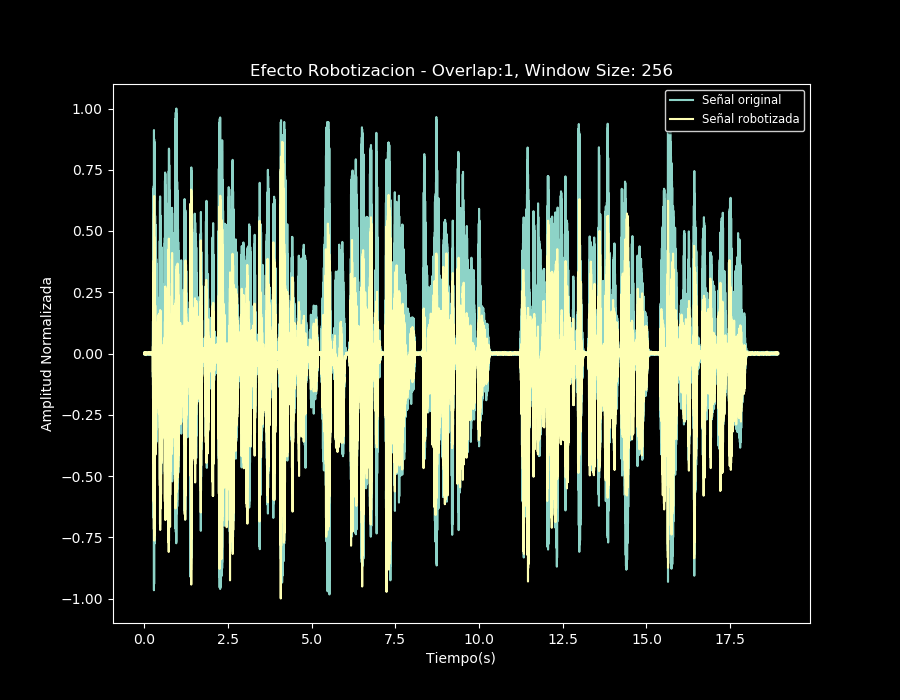

In [82]:
inicio = time.time()
################Robotizacion############
mod_rate = 0.25
overlap = 1

window_size = int(1024*mod_rate)
hop = window_size//4
w_ = np.hanning(window_size)

data_stft = sg.stft(x=data, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)

data_voc = np.abs(data_stft[2])

t, data_rbt = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_rbt[:data.shape[0]]/np.max(np.abs(data_rbt)), label="Señal robotizada")
plt.title(f"Efecto Robotizacion - Overlap:{overlap}, Window Size: {window_size}")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_rbt, rate=fs))

Tiempo de computo del tremolo: 0.058820247650146484 segundos


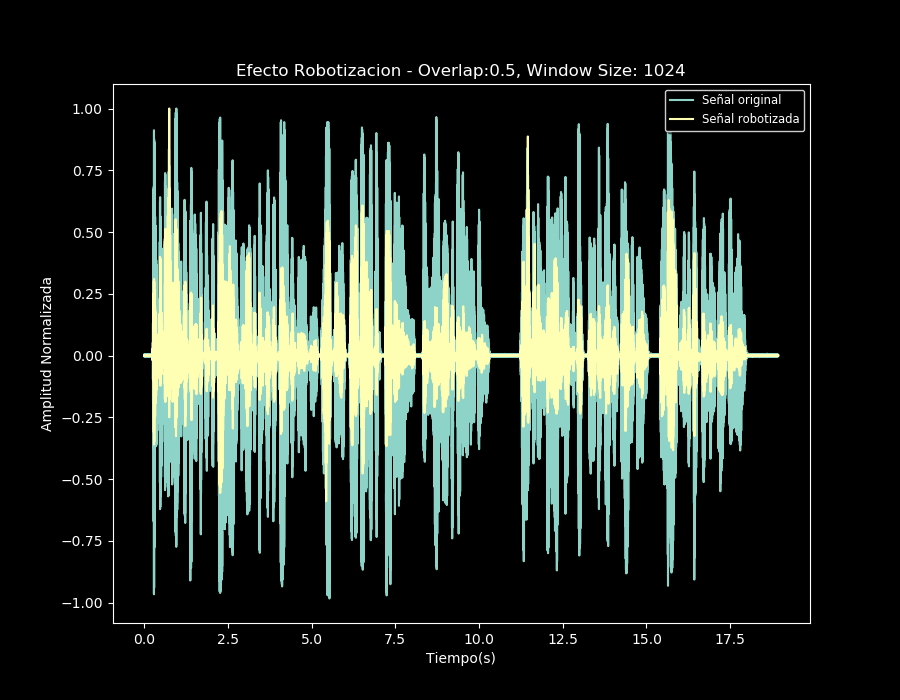

In [83]:
inicio = time.time()
################Robotizacion############
mod_rate = 1
overlap = 0.5

window_size = int(1024*mod_rate)
hop = window_size//4
w_ = np.hanning(window_size)

data_stft = sg.stft(x=data, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)

data_voc = np.abs(data_stft[2])

t, data_rbt = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_rbt[:data.shape[0]]/np.max(np.abs(data_rbt)), label="Señal robotizada")
plt.title(f"Efecto Robotizacion - Overlap:{overlap}, Window Size: {window_size}")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_rbt, rate=fs))

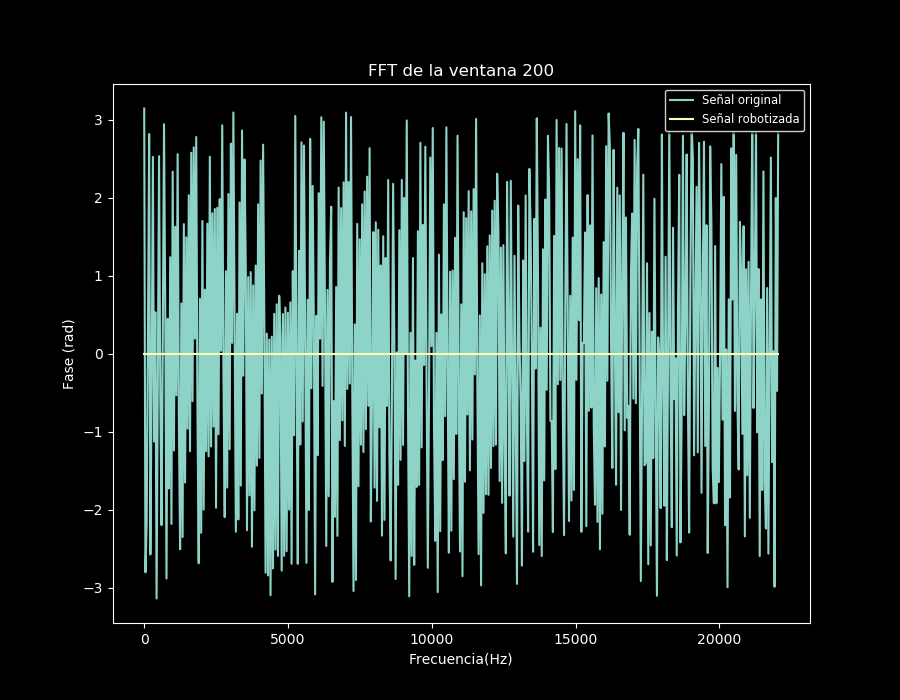

In [84]:
w_200 = np.angle(data_stft[2][:, 200])
wrbt_200 = np.angle(data_voc[:, 200])

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(data_stft[0], w_200, label="Señal original")
plt.plot(data_stft[0], wrbt_200, label="Señal robotizada")
plt.title("FFT de la ventana 200")
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Fase (rad)")
plt.legend(loc='upper right', shadow=True, fontsize='small')

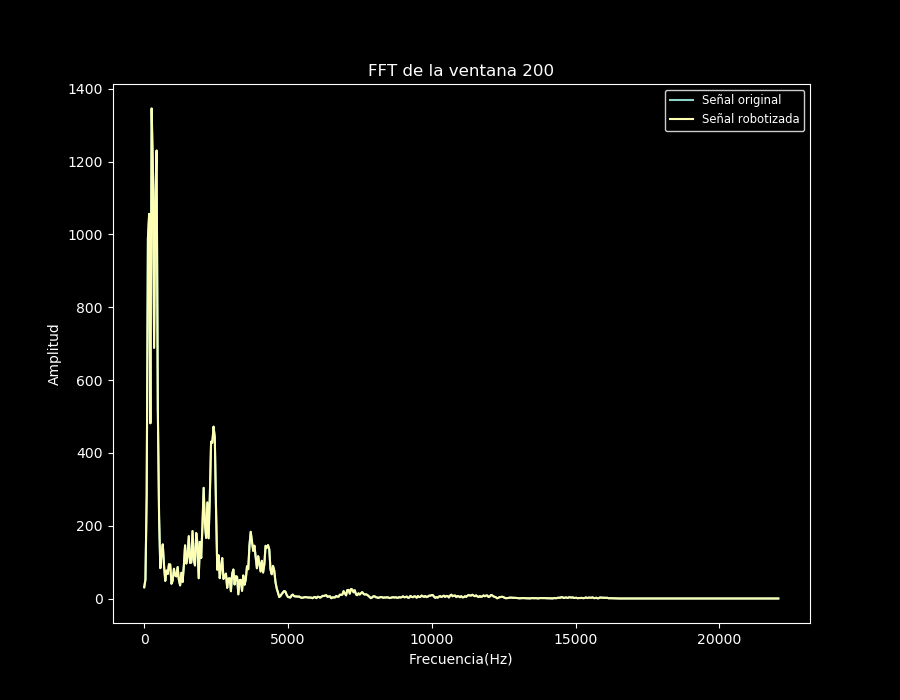

In [85]:
w_200 = np.abs(data_stft[2][:, 200])
wrbt_200 = data_voc[:, 200]

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(data_stft[0], w_200, label="Señal original")
plt.plot(data_stft[0], wrbt_200, label="Señal robotizada")
plt.title("FFT de la ventana 200")
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Amplitud")
plt.legend(loc='upper right', shadow=True, fontsize='small')

Podemos ver como la fase del bin de frecuencia 200 fue seteada a cero, pero la magnitud permaneció intacta.

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Efecto susurro o Whisperizacion <a name="36"></a>
</h3>

Este efecto, al igual que el efecto de robotización, es comúnmente usado en señales de voz, ya que preserva los formantes vocales mientras elimina la sensación de tono. El efecto resultante es similar al de una persona susurrando. La implementación de este efecto es muy similar al de robotización, pero en vez de setear la fase por bin a cero, la fase es seteada a un valor aleatorio en el rango de $\phi = [0, 2\pi)$. Supongamos, nuevamente, que cada bin de frecuencia $k$ es descripta por $a_k + jb_k$ y que $\phi_k$ es un valor aleatorio de fase para cada bin. Entonces el valor de salida de este efecto será:

\begin{equation}
\sqrt{{a_k}^2 + {b_k}^2}(cos(\phi_k) + jsin(\phi_k))
\end{equation}

Al igual que en robotización, la magnitud de cada bin será preservada. En este efecto es aún más importante el ancho de la ventana, alrededor de 64 a 256 muestras son valores típicos para conseguir un buen efecto.

Tiempo de computo del tremolo: 0.295210599899292 segundos


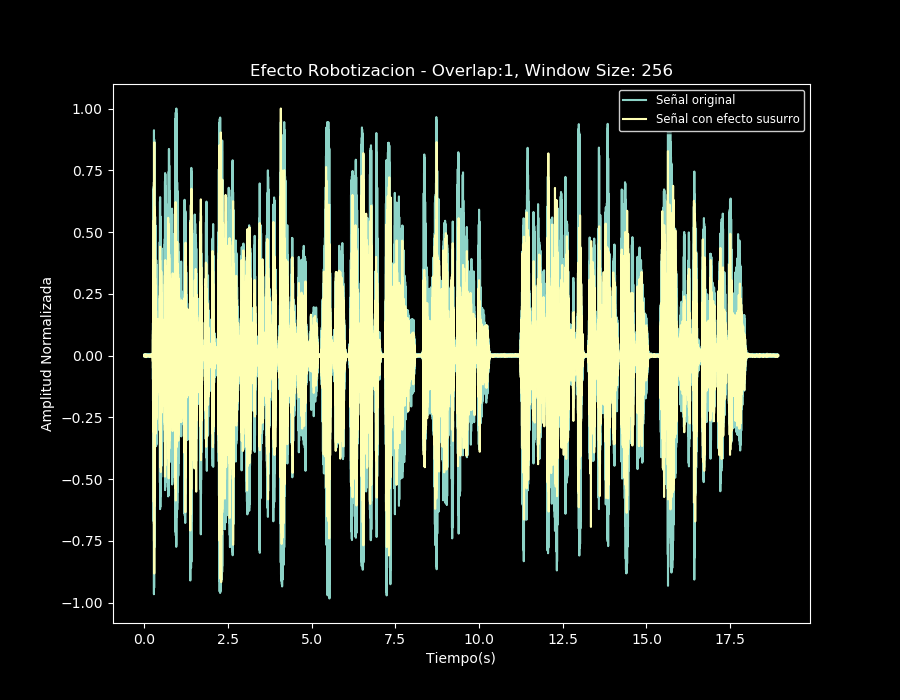

In [86]:
inicio = time.time()
################Whisperization############
mod_rate = 0.25
overlap = 1

window_size = int(1024*mod_rate)
hop = window_size//4
w_ = np.hanning(window_size)

data_stft = sg.stft(x=data, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)

data_voc = np.abs(data_stft[2])
phase = 2*np.pi * (np.random.rand(data_voc.shape[0], data_voc.shape[1]))
data_voc = data_voc*(np.cos(phase) + 1j*np.sin(phase))

t, data_wh = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop)*overlap)
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_wh[:data.shape[0]]/np.max(np.abs(data_wh)), label="Señal con efecto susurro")
plt.title(f"Efecto Robotizacion - Overlap:{overlap}, Window Size: {window_size}")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_wh, rate=fs))

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Estiramiento temporal <a name="37"></a>
</h3>

El vocoder de fase permite a la señal entrante ser reescalada en tiempo sin sufrir modificaciones en su tono. Realizar un *estiramiento temporal* es posible y la idea básica consiste en tomar ventaja de la relación entre el tiempo, la frecuencia y la fase:

\begin{equation}
\phi = \omega t
\end{equation}

Donde nosotros podemos conservar la frecuencia pero variar el tiempo, a costo de perder la fase original de la señal. Para lograr el *estiramiento*, la técnica consiste en que el hop de síntesis y de análisis no son iguales. Si R es la relación de estiramiento aplicada a la señal, el hop de síntesis $h_s$ entonces será:

\begin{equation}
h_s = Rh_a
\end{equation}

Donde $h_a$ es el hop de análisis. Si $R < 1$ entonces $h_s < h_a$ provocando una compresión temporal, por lo contrario, si $R > 1$ entonces $h_s > h_a$ provocando una expansión temporal.

<div align="center"><img src="img_note/vocoder/stretch.png"/></div>

Tiempo de computo del tremolo: 0.13563752174377441 segundos


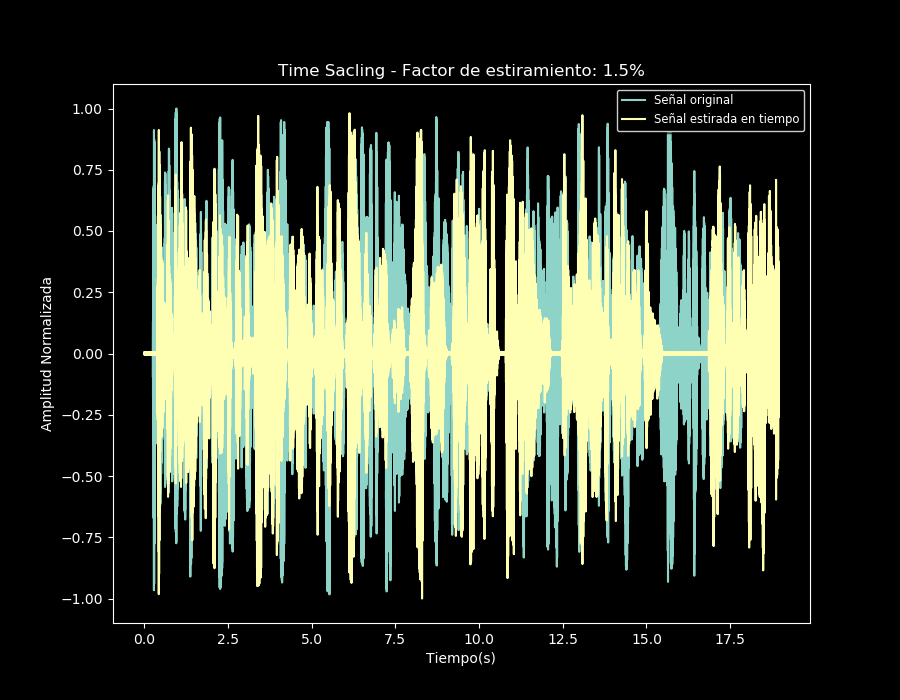

In [87]:
inicio = time.time()
################Time Scaling############
mod_rate = 1
overlap = 1

window_size = int(1024*mod_rate)
R=1.5
hop_a = window_size//4
hop_s = hop_a*R
w_ = np.hanning(window_size)

data_stft = sg.stft(x=data, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop_a)*overlap)

data_voc = data_stft[2]

t, data_ts = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop_s)*overlap)
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_ts[:data.shape[0]]/np.max(np.abs(data_ts)), label="Señal estirada en tiempo")
plt.title(f"Time Sacling - Factor de estiramiento: {R}%")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_ts, rate=fs))

Bien, conseguimos una expansión temporal de la señal. Una de las ventajas de la utilización de ventanas se ve aquí, cuando nosotros espaciamos los frames de forma diferente, creamos discontinuidades:

<div align="center"><img src="img_note/vocoder/space.png"/></div>

Esto producirá pequeños glitches que pueden ser percibidos por el oído humano. Para mitigar uno de estos problemas es que hemos utilizado ventanas. Y esto puede verse más claramente por la utilización de ventanas rectangulares donde los extremos no serán atenuados:

In [88]:
################Time Scaling############
mod_rate = 1
overlap = 1

window_size = int(1024*mod_rate)
R=1.5
hop_a = window_size//4
hop_s = hop_a*R
w_ = sg.windows.boxcar(window_size)

data_stft = sg.stft(x=data, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop_a)*overlap)

data_voc = data_stft[2]

t, data_ts = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop_s)*overlap)
####################################################

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_ts, rate=fs))

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Cambio de tono o Pitch Shifting <a name="38"></a>
</h3>

Hay varias formas de cambiar el tono de una señal, ya hemos visto el *modulador de timbre*, pero también existe un método que consiste en eliminar o agregar muestras a una señal provocando que la señal en tiempo se estire o se expanda conocida como *[resampling](https://en.wikipedia.org/wiki/Sample-rate_conversion)*, el efecto resultante es como si hubiéramos modificado la frecuencia de muestreo, y es tan simple de implementar que nos tomaremos el tiempo de verla.

<div align="center"><img src="img_note/vocoder/resampling.png"/></div>

In [ ]:
data_resampling = data[0::2]

display(Audio(data, rate=fs))
display(Audio(data_resampling, rate=fs))

Pero el gran problema de este método es que no es aplicable para procesamiento en tiempo real, ya que la duración de la señal resulta modificada:

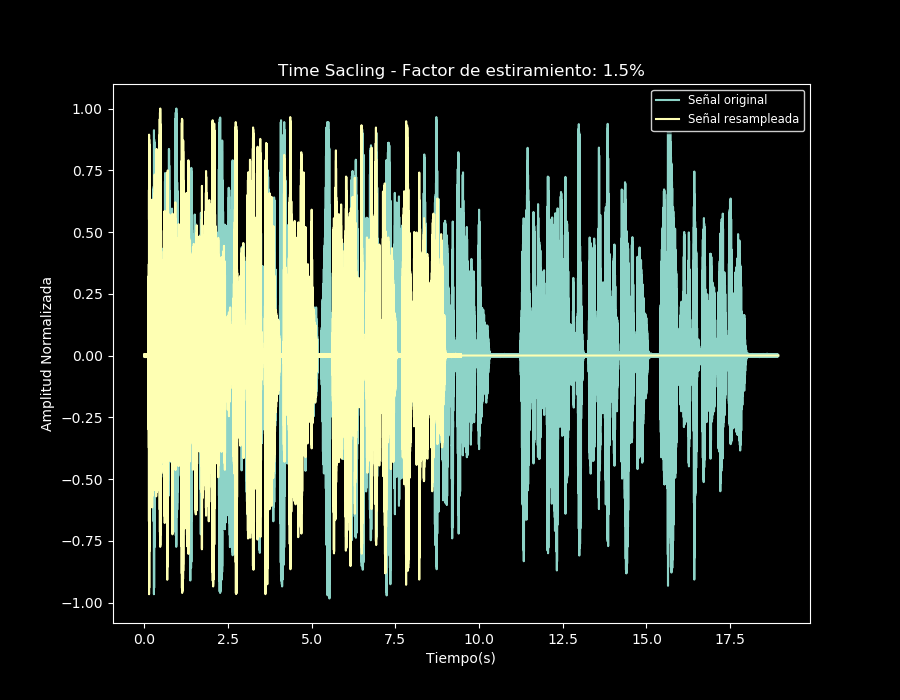

In [90]:
duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, np.concatenate((data_resampling, np.zeros(len(data) - len(data_resampling))))/np.max(np.abs(data_resampling)), label="Señal resampleada")
plt.title(f"Time Sacling - Factor de estiramiento: {R}%")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

Algunas de las formas de cambiar el tono de una señal sin modificar su duración temporal consiste en usar vocoderes de fase. Y uno de las principales columnas del *cambio de tono* consiste en utilizar el *estiramiento temporal* que hemos visto anteriormente, donde ya hemos visto un método para provocar expansiones y compresiones de tiempo. Sin embargo, hay algunos aspectos que ver antes de pasar a la implementación.

Supongamos que tenemos una señal con una frecuencia que cae entre dos bins de frecuencia, la frecuencia exacta de esta señal será ignorada, ya que la energía de esta frecuencia se vera distribuida entra los bins más cercanos. La fase nos puede brindar información para mejorar la precisión de la estimación de frecuencia de cada bin. Tomando la señal divida en frames, pero sin aplicar ningún tipo de superposición, obtendremos lo siguiente:

<div align="center"><img src="img_note/vocoder/phase_shift.png"/></div>

El primer frame tiene una señal con una frecuencia que cae exactamente en un bin de frecuencia, pero la segunda señal tiene un frame que tiene una señal con una frecuencia ligeramente mayor. La información de fase entre 2 frames sucesivos entonces será de interés. Para la primera señal, no existe una diferencia de fase entre los dos frames. Sin embargo, para la segunda señal, la fase del primer frame es mayor que cero. Esto implica que la frecuencia de la señal en este frame es mayor que el bin de frecuencia. Esta diferencia de fase es conocida como *cambio de fase* $\vartriangle\phi_a$, y puede ser usada para determinar la verdadera frecuencia asociada con un bin tal que:

\begin{equation}
(\omega_{true}[k])_i = \frac{(\vartriangle\phi_a[k])_i}{\vartriangle t_a}
\end{equation}

Donde $k$ es el índice del bin, $i$ es el índice del frame y $\vartriangle t_a = \frac{hop_a}{fs}$ es el tiempo entre 2 frames contiguos. Pero si consideramos que la información de fase obtenida por una FFT esta reescalada, lo que implica que $\vartriangle\phi_a$ se encuentre entre $-\pi$ y $\pi$, el problema se vuelve más complejo. En este caso la desviación de frecuencia del bin primero debe ser calculada y luego ser reescalada. Esta cantidad es añadida al bin de frecuencia para obtener la verdadera frecuencia dentro del frame, de manera que: 

\begin{equation}
(\vartriangle\omega[k])_i = \frac{(\phi_a[k])_i - (\phi_a[k])_{i-1}}{\vartriangle t_a} - \omega_{bin}[k]
\end{equation}

\begin{equation}
(\vartriangle\omega_{wrapped}[k])_i = mod((\vartriangle\omega[k])_i + \pi, 2\pi) - \pi
\end{equation}

\begin{equation}
(\omega_{true}[k])_i = \omega_{bin}[k] + (\vartriangle\omega_{wrapped}[k])_i 
\end{equation}

Donde $\omega_{bin}[k]$ es el bin de frecuencia, $(\vartriangle\omega[k])_i$ es la desviación de frecuencia y $(\vartriangle\omega_{wrapped}[k])_i$ es la desviación de frecuencia envuelta.

La nueva fase de cada bin puede ser calculada agregando el cambio de fase requerido para evitar discontinuidades. Esto se hace multiplicando la frecuencia real por el intervalo de tiempo de la etapa de síntesis:

\begin{equation}
(\phi_s[k])_i = (\phi_s[k])_{i-1} + \vartriangle t_a(\omega_{true}[k])_i
\end{equation}

Y finalmente para obtener el nuevo espectro de frecuencia:

\begin{equation}
(X_s[k])_i = |(X_a[k])_i|e^{j(\phi_s[k])_i}
\end{equation}

Bien, hasta ahora solo hemos expandido o comprimido la señal en tiempo y realizamos una corrección de fase para que el tono no se vea afectado; sin embargo, la señal sigue estirada en tiempo y esto no nos sirve, bien para esto es que nos puede servir el *resampling*. Con ayuda del resampling podemos restaurar la duración de nuestra señal a la duración original y provocar el cambio de tono deseado. Para obtener el tono deseado $R = 2^{(-\frac{n}{12})}$ donde $n=0, 1, 2...$ esta relación nos da el salto en semitonos.

Tiempo de computo del tremolo: 0.4776923656463623 segundos


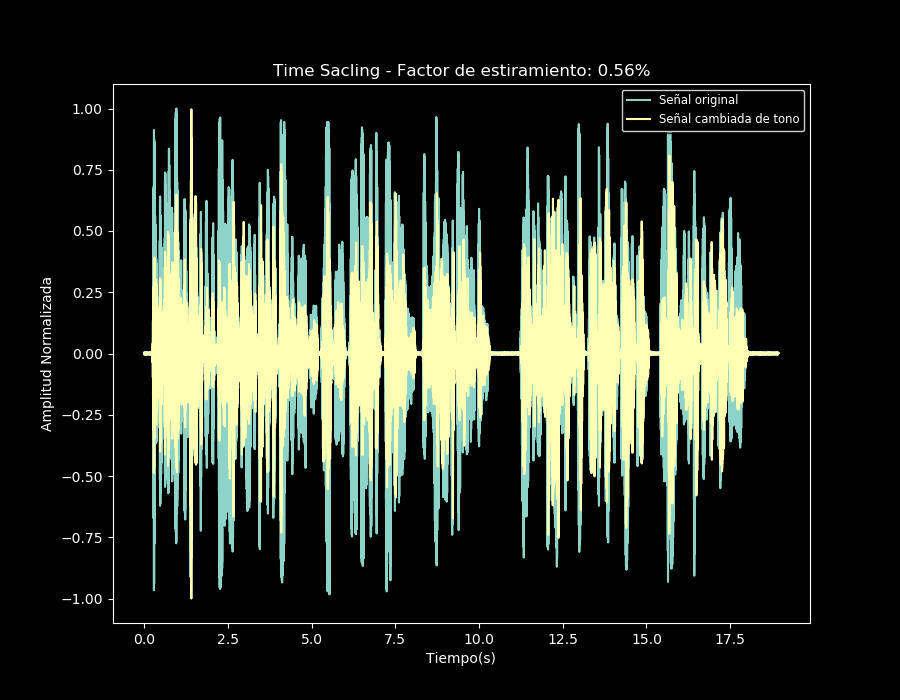

In [91]:
inicio = time.time()
################Pitch Shifter############
mod_rate = 3
overlap = 1

window_size = int(1024*mod_rate)
hop_a = window_size//4
w_ = np.hanning(window_size)

data_stft = sg.stft(x=data, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop_a)*overlap)

# PHASE CORRECTION AND TIME SCALING
n=-10
R = 2**(1.0 * n / 12.0)
hop_s = hop_a*R

bins = data_stft[2]
bins_ = np.vstack([bins, np.zeros(bins.shape[1])])[1:bins.shape[0]+1, :]

amp = np.abs(data_stft[2])

w_bin = np.tile(data_stft[0].shape[0], [data_stft[1].shape[0], 1]).transpose() * (2*np.pi)
w_delta = (np.angle(bins) - np.angle(bins_))/(hop_a/fs)
w_wrap = np.mod(w_delta - w_bin + np.pi, 2*np.pi) - np.pi
w_true = w_bin + w_wrap

phase_syn = np.angle(bins) + (hop_s/fs) * w_true

data_voc = np.abs(amp)*np.exp(1j*phase_syn)

t, data_time = sg.istft(data_voc, fs=fs, window=w_, nperseg=window_size, noverlap=(window_size - hop_s)*overlap)

# RESAMPLING
indices = np.round(np.arange(0, len(data_time), R))
indices = indices[indices < len(data_time)].astype(int)
data_ps = data_time[indices.astype(int)]
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_ps[:data.shape[0]]/np.max(np.abs(data_ps)), label="Señal cambiada de tono")
plt.title(f"Time Sacling - Factor de estiramiento: {round(R,2)}%")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_ps, rate=fs))

****
<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Reverberación <a name="39"></a>
</h2>

En un ambiente acústico, las ondas de sonido que atraviesan el espacio para llegar al oyente, producen 'copias' por reflexión en determinadas superficies, alargando su recorrido por el espacio, provocando un retardo temporal y una atenuación en su camino al oyente, esto provoca la percepción espacial en el sonido y da lugar a la reverberación. Como dato de color, sin la reverberación muchos de los instrumentos que escuchamos no sonarían igual, ya que algunos instrumentos no irradian todas las frecuencias de igual manera en todas las direcciones, la reverberación ayuda a difundir la energía de una onda de forma más uniforme para un oyente. Podríamos interpretar a la reverberación como muchísimos ecos que llegan retardados con diferencias de tiempo casi despreciables, tal que la reflexiones no son percibidas como provenientes de distintas fuentes de sonido.

<div align="center"><img src="img_note/reverb/bounces.png"/></div>

Las primeras reflexiones están relacionadas con la posición de la fuente y el oyente en la sala, así como con la forma, el tamaño y el material por el que está compuesto la sala. Los últimos reflejos llegan con mucha más frecuencia, aparecen de manera más aleatoria, suelen decaer exponencialmente y son difíciles de relacionar directamente con las características físicas de la habitación. Estas últimas reflexiones atribuyen la difusión de la reverberación.

<div align="center"><img src="img_note/reverb/reflexiones.png"/></div>

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Reverberador de Schroeder Extra <a name="40"></a>
</h3>

Schroeder nos brinda un marco para emplear un reverb con características básicas, el cual consiste de 3 principales componentes: Filtros comb, filtros pasa todo y una matriz de mezcla, este último elemento con el tiempo ha sido reemplazado por métodos más sofisticados. Los filtros comb son un caso especial de un filtro digital IIR porque hay retroalimentación de la salida retardada a la entrada, gracias a esto se logra representar el sonido reflectándose entre dos paredes paralelas que produce una serie de ecos. Los ecos decaen exponencialmente y están espaciados uniformemente en el tiempo. Los filtros pasa todo proveen ecos de alta densidad 'incoloros'. Esencialmente, estos filtros transforman cada muestra de entrada de la etapa anterior en una respuesta de impulso infinita completa, lo que da como resultado una mayor densidad de eco. Este bloque de filtro se conocen como difusores de impulso.

<div align="center"><img src="img_note/reverb/schroeder.png"/></div>

Los filtros Comb pueden ser implementados a partir de:

\begin{equation}
y[n] = x[k - d] + gy[n - d]
\end{equation}

\begin{equation}
H_{Comb}(Z) = \frac{Z^d}{1-gZ^-d}
\end{equation}

Para construir los filtros pasa todo podemos seguir las siguientes expresiones:

\begin{equation}
y[n] = -gx[k] + x[k - d] + gy[n - d]
\end{equation}

\begin{equation}
H_{Comb}(Z) = \frac{Z^d - g}{1-gZ^-d}
\end{equation}

Donde $d$ es el retardo medido en muestras y $g$ el coeficiente de ganancia de retroalimentación del filtro. Schroeder nos brinda este reverb básico, el cual es muy útil, pero no es el que implementaremos.

<h3 style="font-style:italic; padding:10px; box-shadow: 0px 0px 2px black;">
Reverb convolucional Extra <a name="41"></a>
</h3>

De la convolución entre la señal de entrada y una respuesta al impulso finita, como pueden ser los filtros comb que nosotros emplearemos, podemos generar la señal reverberada, pero en términos de trabajo computacional la convolución resulta muy costosa de realizar, para solucionar esto recurrimos al teorema de convolución que nos dice que la multiplicación en el dominio de Fourier es equivalente a convolucionar en el dominio temporal y viceversa, esta multiplicación requiere menos trabajo computacional por lo que resulta un proceso más veloz.

\begin{equation}
r = s*h \Leftrightarrow R=S \cdot H
r = F^{-1}\{F(s) \cdot F(h)\}
\end{equation}

Para simular un filtro comb nosotros utilizaremos un tren de deltas separados uniformemente en el tiempo, donde cada delta será atenuado por un valor aleatorio, lo que dará la sensación natural de un reverb. Se añadió un filtro pasa bajos que ayuda a simular la absorción de ese sonido metálico, característico de la reverberancia en altas frecuencias, que naturalmente es absorbido por el aire y las paredes.

Tiempo de computo del tremolo: 2.472414970397949 segundos


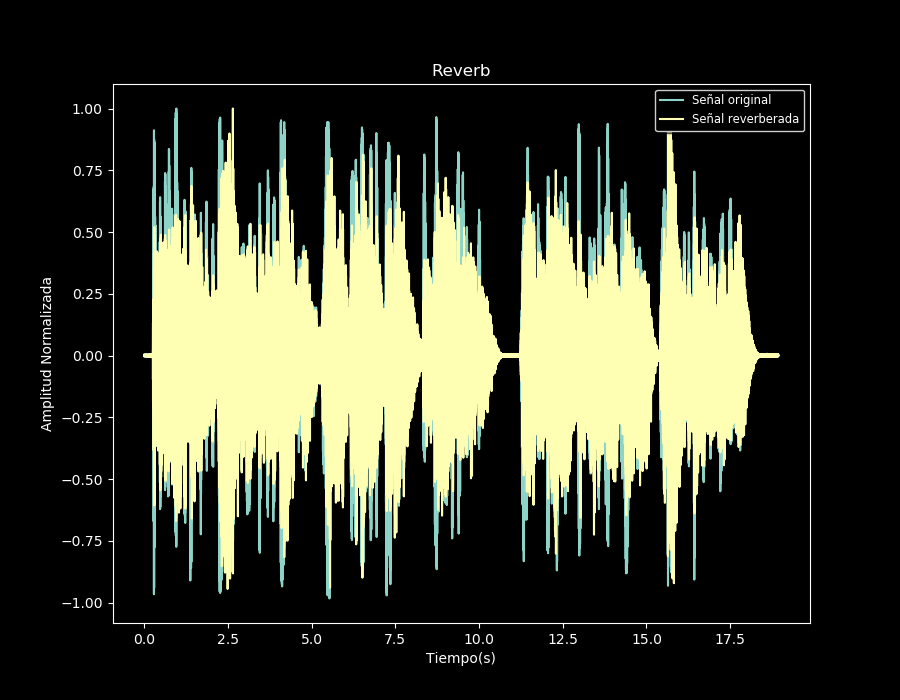

In [92]:
def ms2smp(ms, Fs):
    return int(float(Fs) * float(ms) / 1000.0)

def lp(fs, fc, att, g, coef=101):
    nyq = fs/2
    frec = np.array([0.0, fc, fc, nyq])
    gain = np.array([g, g, -att, -200])
    gain = 10**(gain/20)
    return sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)

inicio = time.time()
################Reverberator###############
room_size=50
colorless=75
g_colorless=0.7
dry = 1
wet = 0.5
diffusion=8

datas = np.concatenate((data, np.zeros(data.shape[0])))

#Reverb Convolucional
S = np.fft.fft(datas)
R = np.array(np.zeros_like(S))

delay = np.arange(30, room_size, 10)

for d in delay:
    h = sg.unit_impulse(datas.shape[0])
    for i in range(10):
        h[ms2smp(d, fs)*(1+i)] = np.random.uniform(0.1, (11-i)/10)
    h[0] = 0
    H = np.fft.fft(h)
    R += (H*S)*wet

data_rev = np.fft.ifft(R).real

#Filtrado
fl_lp = lp(fs, 10000, 30, 0)
data_rev = sg.filtfilt(fl_lp, 1, data_rev, axis=0)
data_rev = datas*dry + data_rev
data_rev = data_rev[:(datas.shape[0]//2) + ms2smp(d, fs)*(1+i)]

#Difusores
d = colorless
g = g_colorless

b = np.zeros(d)
b[-1] = 1
b[0] = -g

a = np.zeros(d)
a[-1] = -g
a[0] = 1
for i in range(diffusion):
    data_rev = sg.lfilter(b, a, data_rev)
####################################################
fin = time.time()
print(f"Tiempo de computo del tremolo: {fin-inicio} segundos")

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(t, data_rev[:data.shape[0]]/np.max(np.abs(data_rev)), label="Señal reverberada")
plt.title(f"Reverb")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio(data_rev, rate=fs))

****
<h1 style="font-style:italic; padding:10px; box-shadow: 0px 0px 8px black;">
Extra <a name="42"></a>
</h1>

<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Transcripción de tonos <a name="43"></a>
</h2>

En mi búsqueda para implementar todo lo visto hasta ahora, me tope con algo muy interesante, sabemos segmentar una señal y determinar que frecuencias la gobiernan. Sin embargo, tenemos un problema cuando queremos encontrar el momento exacto en el que una nota termina y una nueva nota comienza. Y esto se debe a que si bien podemos extraer información del dominio frecuencial, muy pocas veces nos preocupamos en como se distribuyen temporalmente esas frecuencias. Si pudiéramos saber el momento exacto en el que una frecuencia aparece y el momento exacto en que esta desaparece para dar lugar a una nueva frecuencia, podríamos saber la duración de una nota y su posición temporal, y por ende podríamos reconstruir una melodía basándonos en su descomposición espectral. Pues, intentemos realizar esta tarea.

### Detección de comienzos o onset <a name="44"></a>
Podemos definirlo de varias formas, pero básicamente diremos que un *onset* es el momento en que ocurre un evento acústico. Supongamos el caso ideal de una nota musical:

<div align="center"><img src="img_note/transcription/onset.png"/></div>

Visto de esta forma, el onset de una nota parece algo muy fácil de determinar, pero cuando comienzan a aparecer *polifonías*, es decir, acordes de notas reproducidas *sincrónicamente*, o cuando los instrumentos que interpretan esas notas tienen tiempos largos de ataque que producen transitorios prolongados, o cuando tenemos técnicas de interpretación como glissando, trémolo o vibrato sobre las notas, el onset de la nota comienza a dispersarse unas décimas de milisegundos y comienzan a presentarse ambigüedades en la definición precisa del onset.

Podemos distinguir 4 tipos de onset:

+ Percusión sin tonalidad (NPP)
+ Percusión con tonalidad (PP)
+ Tonalidad no-percusiva (PNP)
+ Mezclas Complejas (Mix)

El tipo *Mix* puede entenderse por aquellos onset presentes en música polifónica, donde varios instrumentos son tocados al mismo tiempo. Los NPP onset son producidos típicamente por instrumentos de percusión como tambores o platillos. Los PP onset son aquellos que mantienen características percusivas pero tienen una tonalidad marcada, tal como cuando se toca un piano. Finalmente, los PNP onset son aquellos que no tienen características percusivas, pero tiene una tonalidad marcada, esta categoría contiene aquellos instrumentos de viento o algunos instrumentos de cuerdas, como violines.

#### Método de detección de onset <a name="45"></a>

Existen algunos métodos que pueden ser utilizados, y muchas veces el método elegido depende de los instrumentos musicales que se encuentren involucrados o incluso si hay voz humana presente. Pero todos coinciden en estos 3 simples pasos:

1) Preprocesamiento de la señal de entrada para mejorar posteriores etapas

2) Computación de una función de detección.

3) Aplicación de algoritmo de detección de picos.

<div align="center"><img src="img_note/transcription/method.png"/></div>

##### Preprocesamiento <a name="46"></a>
El método de preprocesamiento más común consiste en segmentar la señal en múltiples bloques y detectar las frecuencias contenidas en cada bloque, básicamente el proceso que realiza una STFT.

##### Función de detección <a name="47"></a>
Una función de detección es diseñada para detectar cambios en las propiedades de la señal de audio, para simplificarlo y mantener la información más importante. Estas funciones de detección son el resultado de un proceso, algunas veces llamado *Reducción*. Durante años, ha habido muchas propuestas para estas funciones de detección, pero aquí solo veremos una de estas propuestas llamada *Reducción del dominio espectral*. Para esta función de detección tendremos dos enfoques, para PP onset y para PNP onset.

+ ##### Diferencia espectral <a name="48"></a>
Enfocado en PP onset, este método representa la *distancia* entre las sucesivas STFT tratándolas como puntos en un espacio N-dimensional. Esta función mide el cambio en la magnitud en cada bin de frecuencia y se calcula computando la diferencia entre dos FFT consecutivos bin a bin.
\begin{equation}
SF(n) = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1}\{ H(|X_k(n)| - |X_k(n-1)|)\}^2
\end{equation}
Donde $H(x) = \frac{x+|x|}{2}$ es conocido como rectificador de media onda para eliminar diferencias negativas, es decir, sirve para ignorar compensaciones y se limita a los onset. $X_k(n)$ representa la magnitud de cada bin.

In [ ]:
fs , data = wavfile.read("eiffel65blue.wav")
Audio(data, rate=fs)

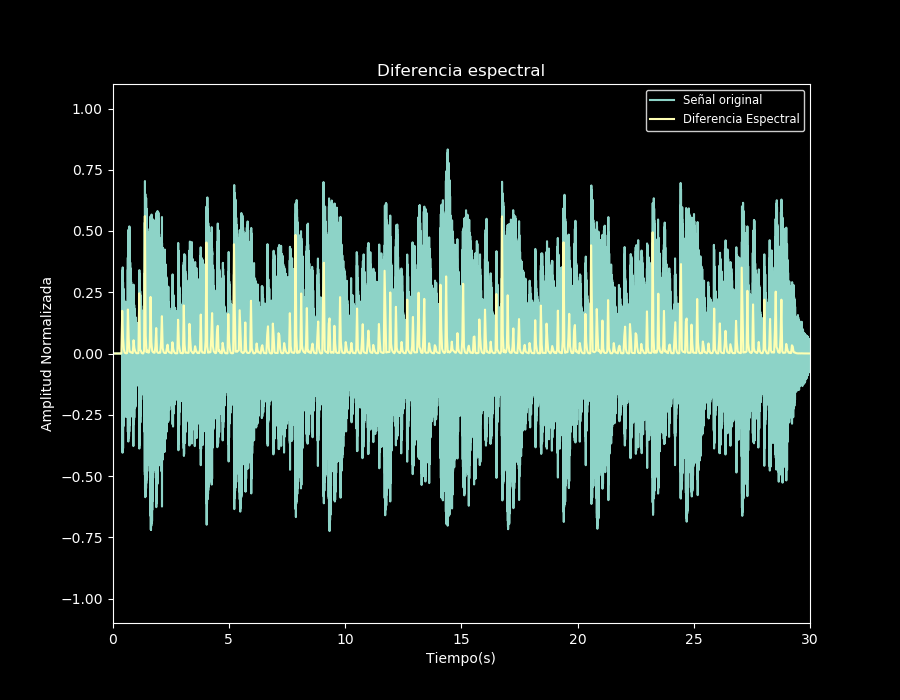

In [94]:
def spectral_difference(data, hop_length, window, fs):    
    #Preprocesamiento
    data_pd = np.pad(data, [(hop_length, 0)])
    data_stft = sg.stft(x=data_pd, fs=fs, window=window, nperseg=2*hop_length)
    
    #Funcion de deteccion
    data_stft_matrix = np.abs(data_stft[2])
    Xk = np.diff(np.abs(data_stft_matrix), axis=1)
    H = (Xk + 5*np.abs(Xk))/2    # Al incrementar el factor que multiplica al valor absolute se logro mejorar la deteccion de Onset
    H = H**2
    sf = np.sum(H, axis=0)
    return sf, data_stft

############Diferencia espectral##################
window_size = 1024*3
hop = window_size//2
w_ = sg.cosine(window_size)

sf, data_stft = spectral_difference(data, hop_length=hop, window=w_, fs=fs)
##################################################

duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)), label="Señal original")
plt.plot(data_stft[1][0:-1], sf/np.max(np.abs(sf)), label="Diferencia Espectral")
plt.title(f"Diferencia espectral")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.xlim(0, 30)
plt.legend(loc='upper right', shadow=True, fontsize='small')

H:\Program Files\Spyder\Python\lib\site-packages\matplotlib\axes\_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


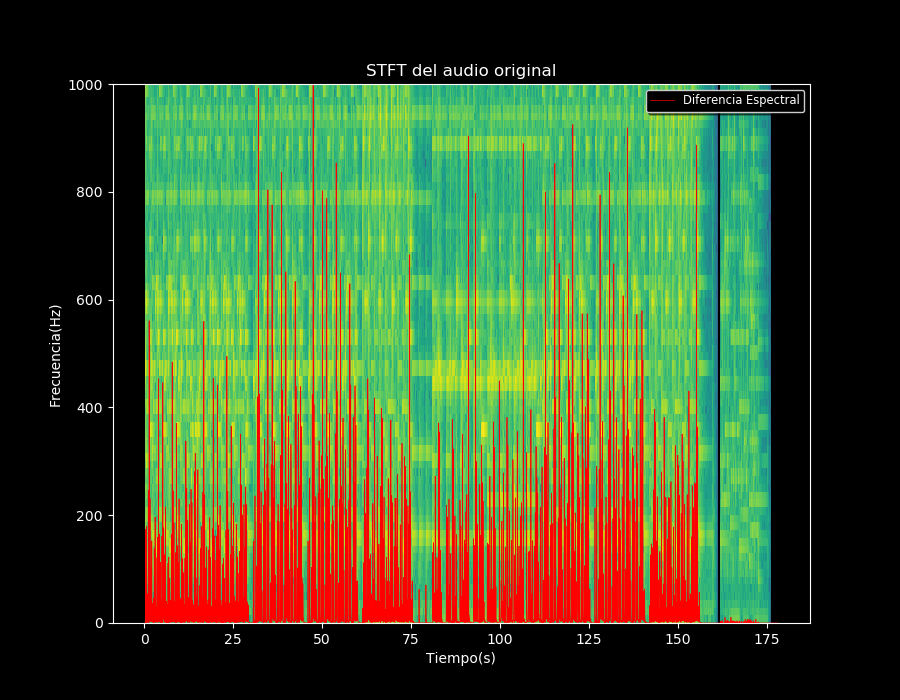

In [95]:
plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.specgram(data, NFFT=window_size, Fs=fs, window=w_)
plt.plot(data_stft[1][0:-1], sf*1000/np.max(np.abs(sf)), color="red", lw=0.5, label="Diferencia Espectral")
plt.title("STFT del audio original")
plt.xlabel("Tiempo(s)")
plt.ylabel("Frecuencia(Hz)")
plt.ylim(0, 1000)
plt.legend(loc='upper right', shadow=True, fontsize='small')

+ ##### Desviación de fase <a name="49"></a>
Enfocado en la detección de PNP onset, los cuales son más fáciles de detectar si miramos la fase del dominio espectral de la señal, ya que gran parte de la estructura temporal de la señal está contenida en el espectro de fase. Tal la función de detección queda determinar por la siguiente expresión:
\begin{equation}
WPD(n) = \frac{1}{N}\sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1}|X_k(n)\phi''_k(n)|
\end{equation}
Donde $\phi''_k$ representa la segunda diferencia de la fase $\phi_k$.

In [96]:
def w_phase_deviation(data, hop_length, window, fs):
    data_pd = np.pad(data, [(hop_length, 0)])
    data_stft = sg.stft(x=data_pd, fs=fs, window=window, nperseg=2*hop_length)
    data_stft_matrix = data_stft[2]
    mod_Xk = np.abs(data_stft_matrix)
    ph2_Xk = np.diff(np.diff(np.angle(data_stft_matrix), axis=1))
    pd = np.sum(np.abs(mod_Xk[:, :-2]*ph2_Xk), axis=0)*(1/(hop_length*2))
    # pd = np.diff(pd)
    data_stft = list(data_stft)
    data_stft[1] = data_stft[1][:-1]
    return pd, tuple(data_stft)

##### Detección de picos <a name="50"></a>
Una función de detección normalmente muestra máximos bien localizados, generalmente con cierta variabilidad debido al ruido. Los picos más prominentes pueden ser entendidos como la posición temporal de los onset de cada nota. Existen múltiples métodos propuestos, pero aquí utilizaremos una herramienta brindada por *Scipy* y aplicaremos un filtro LP para eliminar variaciones de alta frecuencia en el trazado de la *Diferencia Espectral*

Text(0, 0.5, 'Amplitud Normalizada')

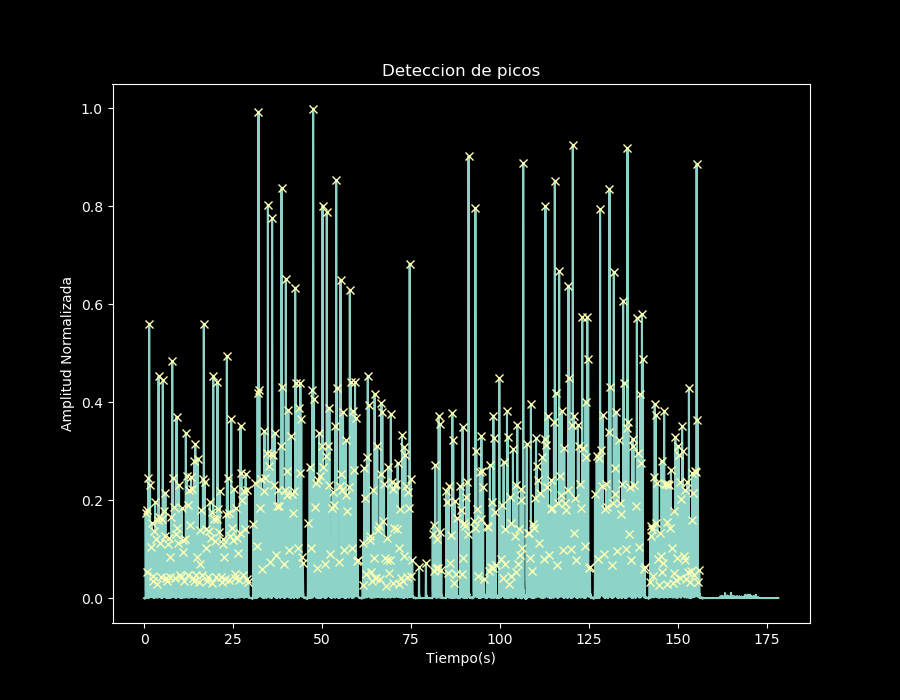

In [97]:
def time_to_samples(peak_frames, hop):
    return (peak_frames*hop).astype(int)

def lp(fs, fc, att, g, coef=101):
    nyq = fs/2
    frec = np.array([0.0, fc, fc, nyq])
    gain = np.array([g, g, -att, -200])
    gain = 10**(gain/20)
    return sg.firls(numtaps=coef, bands=frec, desired=gain, fs=fs)

def onset_detection(fd, fs):
    filterLP = lp(fs, 22040, 50, 0)
    fd = sg.filtfilt(filterLP, 1, x=fd, axis=0, method='gust')
    fd = fd/np.max(fd)
    # Para detectar en caso de que exista un pico al inicio
    fd_pd = np.pad(fd, [(1, 1)])
    peak_frames, _ = sg.find_peaks(
        fd_pd, height=0.02, prominence=0.02, width=1)
    peak_frames = peak_frames-1
    return peak_frames, fd_pd[1:-1]

############Deteccion de Picos##################
peak_frames, sf = onset_detection(sf, fs)
peak_samples = time_to_samples(peak_frames, hop)
peak_times = peak_samples/fs
################################################

time = data_stft[1][0:-1]
sf_norm = sf/np.max(np.abs(sf))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(time, sf_norm)
plt.plot(peak_times, sf_norm[peak_frames], marker="x", ls="none")
plt.title(f"Deteccion de picos")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")

Una vez obtenidos los onset de cada nota musical podemos obtener la duración y posición temporal de cada nota de acuerdo a la posición de los picos, así como también obtener las frecuencias que componen a cada nota musical, para este proceso he creado una función que crea la melodía basándonos en esta información.

#### Reconstrucción de melodías <a name="52"></a>

Para comenzar a crear la melodía primero debemos saber que frecuencias corresponden a cada nota musical, si bien el oído humano es capaz de percibir frecuencias que van desde los 20 Hz a los 20 kHz no todas estas frecuencias son utilizadas para hacer música, dentro de este rango de frecuencias existe un grupo de 12 sonidos que se repiten de manera armónica indefinidamente con diferentes alturas, este grupo de 12 sonidos se los conoce como *Octavas*, el nombre no hace alusión a la cantidad de sonidos del grupo, sino que este grupo de 12 sonido se subdivide en 2 grupos: *Notas naturales* y *Notas alteradas*, donde por ejemplo para pasar de C1 a C2, es decir, del Do de la primera octava al Do de la segunda octava, debemos pasar por 7 *notas naturales* y donde C2 sería la octava nota, de ahí el nombre de *Octavas*. ¿Pero por qué Do o por qué C? Esto se debe a que existen dos tipos de cifrados, donde *Do, Re, Mi, Fa, Sol, La y Si* es la representación de las notas en el cifrado español y donde *C, D, E, F, G, A, B* pertenecen al cifrado americano, pero ambos cifrados son equivalentes.

<table border="none">
  <tbody>
    <tr>
      <th>Notas naturales</th>
      <th>Notas alteradas</th>
    </tr>
    <tr>
      <td>Do/C</td>
      <td>Do#/C#</td>  
    </tr>
    <tr>
      <td>Re/D</td>
      <td>Re#/D#</td>
    </tr>
    <tr>
      <td>Mi/E</td>
      <td></td>
    </tr>
    <tr>
      <td>Fa/F</td>
      <td>Fa#/F#</td>
    </tr>
    <tr>
      <td>Sol/G</td>
      <td>Sol#/G#</td>
    </tr>
    <tr>
      <td>La/A</td>
      <td>La#/A#</td>
    </tr>
    <tr>
      <td>Si/B</td>
      <td></td>
    </tr>
  </tbody>
</table>

Bien, pero seguimos sin saber que frecuencias corresponden a cada nota, bueno para establecer las frecuencias pertenecientes a cada nota se debe utilizar una frecuencia de referencia con la cual podremos establecer el resto de notas, a lo largo de los años hubo varias propuestas, pero hubo dos propuestas que generaron un gran debate entre músicos. El primero de ellos tomaba como referencia $A4 = 432 Hz$ basada sobre la *[afinación pitagórica](https://es.wikipedia.org/wiki/Afinaci%C3%B3n_pitag%C3%B3rica)* y la segunda propuesta, que prevalece hasta el día de hoy, es que $A4 = 440 Hz$, ya que en los años 50, la Organización Internacional de Normalización reconoció oficialmente $A4 = 440 Hz$ como "tono de concierto". Existe una relación matemática para determinar las frecuencias de las notas musicales, esta es la siguiente:

\begin{equation}
F_{tono} = 2^{\frac{tono-69}{12}}440
\end{equation}

Y podemos calcularlas:

In [98]:
def nota_musical(pitch, frec_ref):
    nota = (2**((pitch - 69)/12))*frec_ref
    return nota
notas = []
for i in range(12, 120):
    notas.append(round(nota_musical(i, 440), 4))
print(notas)

[16.3516, 17.3239, 18.354, 19.4454, 20.6017, 21.8268, 23.1247, 24.4997, 25.9565, 27.5, 29.1352, 30.8677, 32.7032, 34.6478, 36.7081, 38.8909, 41.2034, 43.6535, 46.2493, 48.9994, 51.9131, 55.0, 58.2705, 61.7354, 65.4064, 69.2957, 73.4162, 77.7817, 82.4069, 87.3071, 92.4986, 97.9989, 103.8262, 110.0, 116.5409, 123.4708, 130.8128, 138.5913, 146.8324, 155.5635, 164.8138, 174.6141, 184.9972, 195.9977, 207.6523, 220.0, 233.0819, 246.9417, 261.6256, 277.1826, 293.6648, 311.127, 329.6276, 349.2282, 369.9944, 391.9954, 415.3047, 440.0, 466.1638, 493.8833, 523.2511, 554.3653, 587.3295, 622.254, 659.2551, 698.4565, 739.9888, 783.9909, 830.6094, 880.0, 932.3275, 987.7666, 1046.5023, 1108.7305, 1174.6591, 1244.5079, 1318.5102, 1396.9129, 1479.9777, 1567.9817, 1661.2188, 1760.0, 1864.655, 1975.5332, 2093.0045, 2217.461, 2349.3181, 2489.0159, 2637.0205, 2793.8259, 2959.9554, 3135.9635, 3322.4376, 3520.0, 3729.3101, 3951.0664, 4186.009, 4434.9221, 4698.6363, 4978.0317, 5274.0409, 5587.6517, 5919.9108, 

<div align="center"><img src="img_note/transcription/frecuencias.jpg"/></div>

Bien ya sabemos la frecuencia que le corresponde a cada nota musical, debemos aclarar que en realidad la definicion de una nota musical a la hora de su deteccion tiene una pequeña incertidumbre, ya que por ejemplo, una frecuencia 17 Hz si bien no es la frecuencia perteneciente a C# (17.3239 Hz) la consideraremos como C# por su cercania, dicho esto realize una funcion que determina el tono, la octava y el cifrado apartir de una frecuencia.

In [99]:
def detect_key(nota):
    frec_ref = 440
    pitch_init = 12
    nota_list = ["C", "C#", "D", "D#", "E",
                 "F", "F#", "G", "G#", "A", "A#", "B"]
    i_nota = 0
    i_octava = 0
    for pitch in range(pitch_init, 12*8):
        p_central = nota_musical(pitch, frec_ref)
        p_prev = nota_musical(pitch - 1, frec_ref)
        p_next = nota_musical(pitch + 1, frec_ref)
        f_i = p_central - (p_central - p_prev)/2
        f_f = p_central + (p_next - p_central)/2
        if nota > f_i and nota < f_f:
            break
        i_nota += 1
        i_nota %= 12
        if i_nota == 0:
            i_octava += 1
    return pitch, nota_list[i_nota], i_octava

print(detect_key(440))
print(detect_key(17))
print(detect_key(16.8))

(69, 'A', 4)
(13, 'C#', 0)
(12, 'C', 0)


Entonces, ya podemos basándonos en una frecuencia de entrada, clasificarla por la nota musical a la que pertenece y obtener la frecuencia exacta a la cual debería pertenecer, basándonos en esta frecuencia, podemos construir tonos puros, sumarlos y concatenarlos para obtener la melodía completa. Como ya tenemos los onset de las notas musicales podemos fragmentar la señal de acuerdo a cada onset y mediante la FFT obtener la frecuencia que contiene cada frame.

Text(0, 0.5, 'Amplitud Normalizada')

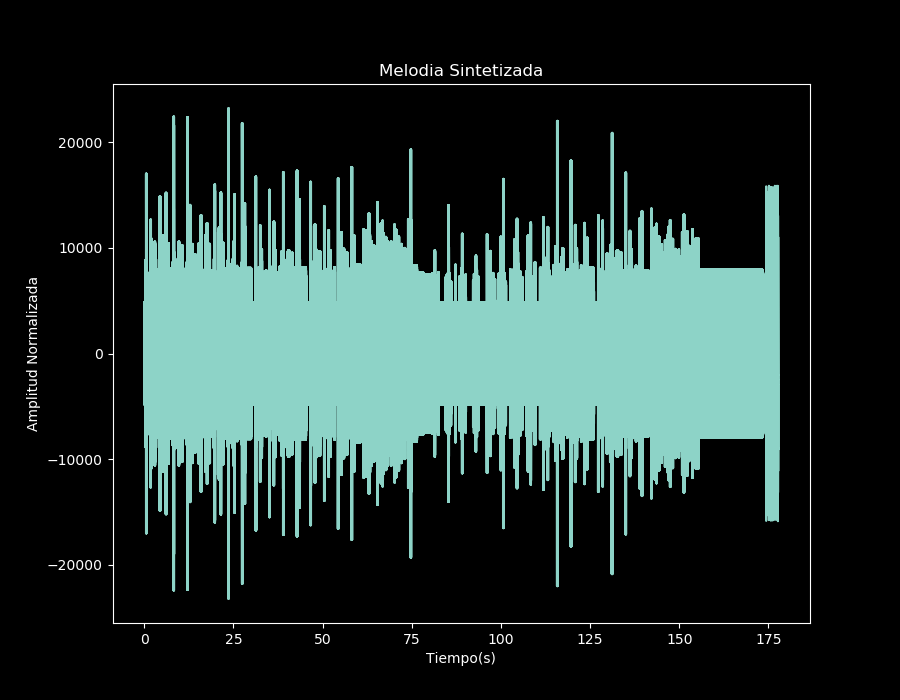

In [100]:
def create_key(frec, length_sample, fs, waveform="sine", shiftOct=1, fadeOut=0.8, amp=1):
    n = np.arange(length_sample)
    fade = int(np.floor(n.shape[0]*fadeOut))
    aux = np.arange(fade)**2
    fade_out = np.concatenate((np.ones(n.shape[0]-fade), 1 - aux/np.max(aux)))
    arg = 2 * np.pi * (frec/fs) * shiftOct * n

    if waveform == "sawtooth":
        wave = sg.sawtooth(arg)
    elif waveform == "square":
        wave = sg.square(arg)
    else:
        wave = np.sin(arg)
    return amp*wave*fade_out

def normalize(data, g_db=0, volumen=32767):
    g = np.power(10, g_db / 20)
    normal_one = (data/np.max(np.abs(data)))*g
    out = normal_one*volumen
    return out

def create_mel(data, peaks, fs, waveform="sine", shiftOct=1, fadeOut=0.7):
    song_samples = np.array([])
    list_tones = []
    list_pitch = []
    peaks_ = np.hstack((peaks, data.shape[0]))
    for i in range(len(peaks_)-1):
        key_sample = data[peaks_[i]:peaks_[i+1]]
        mg_key_fft = np.abs(
            (np.fft.fft(key_sample, n=fs)/key_sample.shape[0])[0:fs//2])
        mg_key_fft = mg_key_fft/np.max(mg_key_fft)
        frecn, _ = sg.find_peaks(mg_key_fft, height=0.1, prominence=0.4)
        key_sine = np.zeros(key_sample.shape[0])
        tones = {}
        pitchs = []
        for frec in frecn:
            pitch, nota, octava = detect_key(frec)
            pitchs.append(pitch)
            tones[nota+str(octava)] = frec
            frec_nota = nota_musical(pitch, 440)
            key_sine += create_key(frec_nota, key_sample.shape[0], fs, waveform=waveform,
                                   shiftOct=shiftOct, fadeOut=fadeOut, amp=mg_key_fft[frec])
        song_samples = np.hstack((song_samples, key_sine))
        list_tones.append(tones)
        list_pitch.append(pitchs)
    song_samples = normalize(song_samples, -3)
    return song_samples, list_tones, list_pitch

##################Reconstruccion de la melodia################################
song, list_tones, list_pitch = create_mel(data, peak_samples, fs, waveform="square", shiftOct=1, fadeOut=0.2)

duracion = len(song)/fs
t = np.linspace(0, duracion, len(song))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, song)
plt.title(f"Melodia Sintetizada")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")

Antes de escuchar la melodía sintetizada, veamos que notas detecto en cada onset.

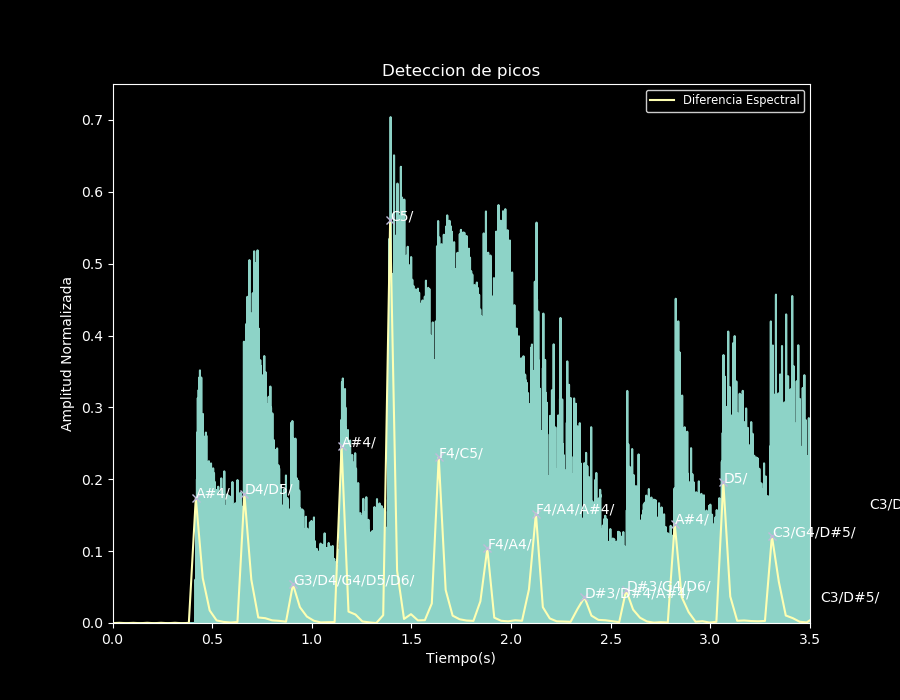

In [101]:
duracion = len(data)/fs
t = np.linspace(0, duracion, len(data))

plt.close('all')
plt.figure(figsize=(9, 7), dpi=100)
plt.plot(t, data/np.max(np.abs(data)))
plt.plot(time, sf_norm, label="Diferencia Espectral")
plt.plot(peak_times, sf_norm[peak_frames], marker="x", ls="none")
for x, y, note in zip(peak_times, sf_norm[peak_frames], list_tones):
    tones = list(note.keys())
    text = ""
    for i in tones:
        text += i+"/"
    plt.text(x, y, text)
plt.title(f"Deteccion de picos")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud Normalizada")
plt.xlim(0, 3.5)
plt.ylim(0, 0.75)
plt.legend(loc='upper right', shadow=True, fontsize='small')

In [ ]:
display(Audio(data, rate=fs))
display(Audio((song/np.max(np.abs(song)))*0.5, rate=fs, normalize=False))

Cabe aclarar que este método de reconstrucción de melodías no es extremadamente exacto, por lo que cada nota musical puede presentar un desfase temporal con respecto a la original, puede también presentar un acortamiento o alargamiento temporal o algunas notas directamente pueden no ser detectadas, algunos de estos defectos pueden estar provocados por el ancho de la ventana utilizada, o por el hecho de que la detección de picos no sea muy buena o simplemente las múltiples polifonías presentes en el audio. Actualmente, muchos de estos métodos incluyen técnicas más sofisticadas, como la utilización de *machine learning* para el reconocimiento de onset.

<h2 style="font-style:italic; padding:10px; box-shadow: 0px 0px 6px black;">
Referencias <a name="51"></a>
</h2>

<div style="background:#999; color:#FFF; font-style:italic; border-radius:10px; padding:20px; margin-top:10px">

Bibliografía de referencia:
+ Joshua D. Reiss, Andrew McPherson. [Audio Effects: Theory, Implementation and Application, 2014](https://www.amazon.es/Audio-Effects-Theory-Implementation-Application/dp/1466560282)
+ Meinard Müller. [Fundamentals of Music Processing: Using Python and Jupyter Notebooks 2nd ed. 2021 Edición](https://www.amazon.com/-/es/Meinard-Müller/dp/3030698076)

Papers de referencia:
+  Carlos Rosão, Ricardo Ribeiro, David Martins de Matos. [Comparing onset detection methods based on spectral features.](https://dl.acm.org/doi/10.1145/2316936.2316949)
+ J.P. Bello, L. Daudet, S. Abdallah, C. Duxbury, M. Davies, M.B. Sandler. [A Tutorial on Onset Detection in Music Signals.](https://ieeexplore.ieee.org/document/1495485)

Webs de referencia:
+ http://www.guitarpitchshifter.com
</div>

<div align="center" style="background: rgb(0,34,144);background: linear-gradient(90deg, rgba(0,34,144,1) 0%, rgba(0,173,255,1) 25%, rgba(68,255,194,0.5) 54%);">
<h3 style="font-weight:200;">Contacto</h3>
<a href="https://github.com/aletbm" style="display:inline-block"><img src="img_note/contact/github2.png" width=40/></a>
<a href="https://www.linkedin.com/in/alexander-daniel-rios/" style="display:inline-block"><img src="img_note/contact/linkedin.png" width=40></a>
<a href="https://www.instagram.com/alexander.rios.75470/" style="display:inline-block"><img src="img_note/contact/instagram2.png" width=40/></a></div>